# Keras 101: Underfitting and Overfitting

The following notebook will begin to explore the concepts of underfitting and overfitting in relation to machine learning and outline some useful metrics that enable us to spot signs of both underfitting and overfitting.

To begin we are going use the same basic classification dataset outlined in the first tutorial. Here the aim of our neural network is to determine a reasonable classification boundary that seperates two classes of data (1 and 0) descirbed by two features (x1 and x2).

But first we must import the necessary packages.

In [1]:
import keras
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

G:\Apps\envs\cil35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Using the sklearn makes_circles() function we can generate the classifcation data and seperate it into two arrays features and Labels.

We also apply some normalisation to the data.
We can plot our data set and begin to get an idea of the how the two classes are distributed in relation to the features x1 and x2.

In [2]:
dataset = make_circles(n_samples=300,noise=0.20,factor=0.0, random_state=1)

features = dataset[0]
labels = dataset[1]

features[:,0] = (features[:,0]+(np.abs(np.amax(features[:,0]))))/(np.abs(np.amax(features[:,0]))*2)
features[:,1] = (features[:,1]+(np.abs(np.amax(features[:,1]))))/(np.abs(np.amax(features[:,1]))*2)


We next need to generate some variables that describe some infromation about our dataset. Specifically the length of our data set and the max and min values for both x1 and x2 features.

We also need to seperate our data into training and testing data for cross validation of our model, this will aid us in checking for overfitting and underfitting. We are going to split this dataset 70% training 30% testing.

In [3]:
data_len = features.shape[0]

x1_min = np.amin(features[:,0])
x1_max = np.amax(features[:,0])
x2_min = np.amin(features[:,1])
x2_max = np.amax(features[:,1])

splitRatio = 0.7

X_train = features[:int(data_len*splitRatio)]
X_test = features[int(data_len*splitRatio):]
y_train = labels[:int(data_len*splitRatio)]
y_test = labels[int(data_len*splitRatio):]

Finally as we have a feature set that is 2 dimensional, therefor we can plot the x1 and x2 features and get an idea of how the two classes are distributed. Here the training portion of the data is highlighted green. The classification 1 is coloured yellow and the classification 0 is coloured purple.

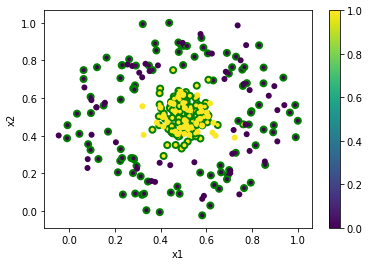

In [4]:
plt.scatter(X_train[:,0],X_train[:,1],edgecolor="green",linewidth=2,c=y_train)
plt.scatter(X_test[:,0],X_test[:,1],linewidth=0,c=y_test)
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar()
plt.show()

We can now begin to build our neural network model. To start we will build an extremly simple model, here we will input the two features x1 and x2 into a single hidden layer of just two neurons that the feed into the a single output neuron, all neurons will utilise the sigmoid activation function.

In [5]:
layers = []
layers.append(keras.layers.Dense(2,input_dim = 2, activation="sigmoid"))
layers.append(keras.layers.Dense(1, activation="sigmoid"))
model = keras.Sequential(layers)

We will use the Adam optimiser with a learning rate of 0.1 and the binary crossentropy loss function to train our model. We will also use a cross validation data set to monitor how the training fits this test dataset throughout the training process.

In [6]:
model.compile(optimizer=keras.optimizers.Adam(lr=1), loss='binary_crossentropy', metrics=['binary_accuracy', 'categorical_accuracy'])
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size=X_train.shape[0],epochs=1000, verbose=1)

Train on 210 samples, validate on 90 samples
Epoch 1/1000
210/210 [==============================] - 6s 31ms/step - loss: 0.7028 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.8911 - val_binary_accuracy: 0.5444 - val_categorical_accuracy: 1.0000
Epoch 2/1000
210/210 [==============================] - 0s 24us/step - loss: 0.9886 - binary_accuracy: 0.4810 - categorical_accuracy: 1.0000 - val_loss: 0.6956 - val_binary_accuracy: 0.5444 - val_categorical_accuracy: 1.0000
Epoch 3/1000
210/210 [==============================] - 0s 24us/step - loss: 0.7208 - binary_accuracy: 0.4810 - categorical_accuracy: 1.0000 - val_loss: 0.7965 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 4/1000
210/210 [==============================] - 0s 29us/step - loss: 0.7501 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.8243 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 5/1000
210/210 [==============================] -

Epoch 38/1000
210/210 [==============================] - 0s 26us/step - loss: 0.6923 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.7014 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 39/1000
210/210 [==============================] - 0s 31us/step - loss: 0.6927 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.7037 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 40/1000
210/210 [==============================] - 0s 69us/step - loss: 0.6932 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.7036 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 41/1000
210/210 [==============================] - 0s 36us/step - loss: 0.6932 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.7013 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 42/1000
210/210 [==============================] - 0s 24us/step - loss: 0.6927 - binary_ac

Epoch 75/1000
210/210 [==============================] - 0s 67us/step - loss: 0.6907 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6949 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 76/1000
210/210 [==============================] - 0s 24us/step - loss: 0.6903 - binary_accuracy: 0.5238 - categorical_accuracy: 1.0000 - val_loss: 0.6949 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 77/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6897 - binary_accuracy: 0.5333 - categorical_accuracy: 1.0000 - val_loss: 0.6949 - val_binary_accuracy: 0.4667 - val_categorical_accuracy: 1.0000
Epoch 78/1000
210/210 [==============================] - 0s 26us/step - loss: 0.6889 - binary_accuracy: 0.5429 - categorical_accuracy: 1.0000 - val_loss: 0.6944 - val_binary_accuracy: 0.4778 - val_categorical_accuracy: 1.0000
Epoch 79/1000
210/210 [==============================] - 0s 36us/step - loss: 0.6875 - binary_ac

Epoch 112/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5518 - binary_accuracy: 0.6952 - categorical_accuracy: 1.0000 - val_loss: 0.5886 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 113/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5515 - binary_accuracy: 0.6952 - categorical_accuracy: 1.0000 - val_loss: 0.5888 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 114/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5513 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5905 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 115/1000
210/210 [==============================] - 0s 57us/step - loss: 0.5513 - binary_accuracy: 0.7048 - categorical_accuracy: 1.0000 - val_loss: 0.5924 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 116/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5513 - bina

Epoch 149/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5498 - binary_accuracy: 0.7048 - categorical_accuracy: 1.0000 - val_loss: 0.5909 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 150/1000
210/210 [==============================] - 0s 29us/step - loss: 0.5498 - binary_accuracy: 0.7048 - categorical_accuracy: 1.0000 - val_loss: 0.5906 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 151/1000
210/210 [==============================] - 0s 53us/step - loss: 0.5498 - binary_accuracy: 0.7048 - categorical_accuracy: 1.0000 - val_loss: 0.5902 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 152/1000
210/210 [==============================] - 0s 48us/step - loss: 0.5498 - binary_accuracy: 0.7048 - categorical_accuracy: 1.0000 - val_loss: 0.5900 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 153/1000
210/210 [==============================] - 0s 62us/step - loss: 0.5498 - bina

Epoch 186/1000
210/210 [==============================] - 0s 43us/step - loss: 0.5496 - binary_accuracy: 0.7048 - categorical_accuracy: 1.0000 - val_loss: 0.5902 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 187/1000
210/210 [==============================] - 0s 53us/step - loss: 0.5496 - binary_accuracy: 0.7048 - categorical_accuracy: 1.0000 - val_loss: 0.5902 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 188/1000
210/210 [==============================] - 0s 36us/step - loss: 0.5496 - binary_accuracy: 0.7048 - categorical_accuracy: 1.0000 - val_loss: 0.5902 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 189/1000
210/210 [==============================] - 0s 53us/step - loss: 0.5496 - binary_accuracy: 0.7048 - categorical_accuracy: 1.0000 - val_loss: 0.5902 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 190/1000
210/210 [==============================] - 0s 57us/step - loss: 0.5496 - bina

Epoch 223/1000
210/210 [==============================] - 0s 53us/step - loss: 0.5495 - binary_accuracy: 0.7048 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 224/1000
210/210 [==============================] - 0s 53us/step - loss: 0.5495 - binary_accuracy: 0.7048 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 225/1000
210/210 [==============================] - 0s 50us/step - loss: 0.5495 - binary_accuracy: 0.7048 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 226/1000
210/210 [==============================] - 0s 33us/step - loss: 0.5495 - binary_accuracy: 0.7048 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 227/1000
210/210 [==============================] - 0s 88us/step - loss: 0.5495 - bina

Epoch 260/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5494 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 261/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5494 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 262/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5494 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 263/1000
210/210 [==============================] - 0s 26us/step - loss: 0.5494 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 264/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5494 - bina

Epoch 297/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5494 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5900 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 298/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5494 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5900 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 299/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5494 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5900 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 300/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5494 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5900 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 301/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5494 - bina

Epoch 334/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5494 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 335/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5494 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 336/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5494 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 337/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 338/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5493 - bina

Epoch 371/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 372/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 373/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 374/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 375/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - bina

Epoch 408/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 409/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 410/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 411/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 412/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - bina

Epoch 445/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 446/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 447/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 448/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 449/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5493 - bina

Epoch 482/1000
210/210 [==============================] - 0s 29us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 483/1000
210/210 [==============================] - 0s 29us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 484/1000
210/210 [==============================] - 0s 26us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 485/1000
210/210 [==============================] - 0s 29us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 486/1000
210/210 [==============================] - 0s 26us/step - loss: 0.5493 - bina

Epoch 519/1000
210/210 [==============================] - 0s 38us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 520/1000
210/210 [==============================] - 0s 31us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 521/1000
210/210 [==============================] - 0s 26us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 522/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 523/1000
210/210 [==============================] - 0s 26us/step - loss: 0.5493 - bina

Epoch 556/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 557/1000
210/210 [==============================] - 0s 31us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 558/1000
210/210 [==============================] - 0s 26us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 559/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 560/1000
210/210 [==============================] - 0s 29us/step - loss: 0.5493 - bina

Epoch 593/1000
210/210 [==============================] - 0s 31us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 594/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 595/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 596/1000
210/210 [==============================] - 0s 29us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 597/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5493 - bina

Epoch 630/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 631/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 632/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 633/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 634/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5493 - bina

Epoch 667/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 668/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 669/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 670/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 671/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5493 - bina

Epoch 704/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 705/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 706/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 707/1000
210/210 [==============================] - 0s 33us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 708/1000
210/210 [==============================] - 0s 26us/step - loss: 0.5493 - bina

Epoch 741/1000
210/210 [==============================] - 0s 29us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 742/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 743/1000
210/210 [==============================] - 0s 31us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 744/1000
210/210 [==============================] - 0s 36us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 745/1000
210/210 [==============================] - 0s 33us/step - loss: 0.5493 - bina

Epoch 778/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 779/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 780/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 781/1000
210/210 [==============================] - 0s 17us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 782/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5493 - bina

Epoch 815/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 816/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 817/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 818/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 819/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5493 - bina

Epoch 852/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 853/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 854/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 855/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 856/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5493 - bina

Epoch 889/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 890/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 891/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 892/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 893/1000
210/210 [==============================] - 0s 24us/step - loss: 0.5493 - bina

Epoch 926/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 927/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 928/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 929/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 930/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - bina

Epoch 963/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 964/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 965/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 966/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 967/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - bina

Epoch 1000/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5493 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.5901 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000


After training we can plot the recored loss at each epoch of the training process for both the training and test data.

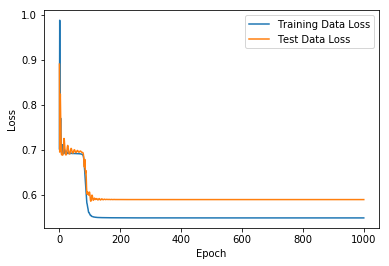

In [8]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = np.arange(0, len(loss))

plt.plot(epoch,loss, label='Training Data Loss')
plt.plot(epoch,val_loss,label='Test Data Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


The backpropagation algorithm used to train this model aims to minimise the loss function, moving this value closer to zero at each step in the training (epoch). The training is said to have converged when the loss no longer changes no matter the number of epochs trained over.

The most basic form of loss function is a least mean squared difference between our label (or ground truths) and the output of our network for each item in our training data. As such the loss value is useful metric for determing how well our model fits the data.

From the curves above we already have our first sign that the model has not performed well, our loss curves appear to have converged at a value close to 0.5, this value is far from our target of 0 and is an obvious sign that we need to tweak our model. 

As you will see we infact have an underfitting model, a high convergence loss is the primary indicator of underfitting in neural networks.

Let us have a look at the decision boundary for our trained model.

The area assosiated with a classifiaction of 1 (Yellow) encompasses a large portion of 0 class (Purple) data points, a clear example of an underfitting model.

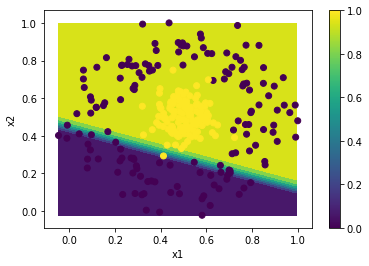

In [9]:
xx, yy = np.meshgrid(np.arange(x1_min,x1_max,0.01),np.arange(x2_min,x2_max,0.01))

z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z)
plt.scatter(features[:,0],features[:,1],c=labels)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.show()

As stated previously our model was purposly made to be as simple as possible inorder to demonstrate underfitting.

Let us now increase the complexity of our model, speciffcally increassing both the number of hidden layers to 2 and the number of nuerons in each layer.

In [10]:
layers = []
layers.append(keras.layers.Dense(8,input_dim = 2, activation="sigmoid"))
layers.append(keras.layers.Dense(6, activation="sigmoid"))
layers.append(keras.layers.Dense(1, activation="sigmoid"))

model = keras.Sequential(layers)

In [11]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.03), loss='binary_crossentropy', metrics=['binary_accuracy', 'categorical_accuracy'])

history = model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size=X_train.shape[0],epochs=3000, verbose=0)

Train on 210 samples, validate on 90 samples
Epoch 1/3000
 - 0s - loss: 0.7045 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.7087 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 2/3000
 - 0s - loss: 0.6951 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6952 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 3/3000
 - 0s - loss: 0.6928 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6902 - val_binary_accuracy: 0.5444 - val_categorical_accuracy: 1.0000
Epoch 4/3000
 - 0s - loss: 0.6960 - binary_accuracy: 0.4810 - categorical_accuracy: 1.0000 - val_loss: 0.6895 - val_binary_accuracy: 0.5444 - val_categorical_accuracy: 1.0000
Epoch 5/3000
 - 0s - loss: 0.6980 - binary_accuracy: 0.4810 - categorical_accuracy: 1.0000 - val_loss: 0.6897 - val_binary_accuracy: 0.5444 - val_categorical_accuracy: 1.0000
Epoch 6/3000
 - 0s - loss: 0.6970 - binary_accuracy: 0.4810 - categorical_accura

Epoch 48/3000
 - 0s - loss: 0.6915 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6960 - val_binary_accuracy: 0.4667 - val_categorical_accuracy: 1.0000
Epoch 49/3000
 - 0s - loss: 0.6914 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6963 - val_binary_accuracy: 0.4667 - val_categorical_accuracy: 1.0000
Epoch 50/3000
 - 0s - loss: 0.6913 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6968 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 51/3000
 - 0s - loss: 0.6912 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6973 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 52/3000
 - 0s - loss: 0.6911 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6977 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 53/3000
 - 0s - loss: 0.6910 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6979 - val_bin

Epoch 95/3000
 - 0s - loss: 0.6609 - binary_accuracy: 0.7095 - categorical_accuracy: 1.0000 - val_loss: 0.6815 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 96/3000
 - 0s - loss: 0.6589 - binary_accuracy: 0.7143 - categorical_accuracy: 1.0000 - val_loss: 0.6804 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 97/3000
 - 0s - loss: 0.6568 - binary_accuracy: 0.7095 - categorical_accuracy: 1.0000 - val_loss: 0.6791 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 98/3000
 - 0s - loss: 0.6546 - binary_accuracy: 0.7095 - categorical_accuracy: 1.0000 - val_loss: 0.6778 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 99/3000
 - 0s - loss: 0.6523 - binary_accuracy: 0.7095 - categorical_accuracy: 1.0000 - val_loss: 0.6765 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 100/3000
 - 0s - loss: 0.6500 - binary_accuracy: 0.7095 - categorical_accuracy: 1.0000 - val_loss: 0.6752 - val_bi

Epoch 142/3000
 - 0s - loss: 0.5371 - binary_accuracy: 0.7381 - categorical_accuracy: 1.0000 - val_loss: 0.5967 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 143/3000
 - 0s - loss: 0.5343 - binary_accuracy: 0.7381 - categorical_accuracy: 1.0000 - val_loss: 0.5953 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 144/3000
 - 0s - loss: 0.5315 - binary_accuracy: 0.7429 - categorical_accuracy: 1.0000 - val_loss: 0.5938 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 145/3000
 - 0s - loss: 0.5285 - binary_accuracy: 0.7524 - categorical_accuracy: 1.0000 - val_loss: 0.5919 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 146/3000
 - 0s - loss: 0.5254 - binary_accuracy: 0.7524 - categorical_accuracy: 1.0000 - val_loss: 0.5893 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 147/3000
 - 0s - loss: 0.5221 - binary_accuracy: 0.7524 - categorical_accuracy: 1.0000 - val_loss: 0.5861 - v

Epoch 189/3000
 - 0s - loss: 0.1716 - binary_accuracy: 0.9714 - categorical_accuracy: 1.0000 - val_loss: 0.2182 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 190/3000
 - 0s - loss: 0.1636 - binary_accuracy: 0.9714 - categorical_accuracy: 1.0000 - val_loss: 0.2093 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 191/3000
 - 0s - loss: 0.1559 - binary_accuracy: 0.9714 - categorical_accuracy: 1.0000 - val_loss: 0.2003 - val_binary_accuracy: 0.9444 - val_categorical_accuracy: 1.0000
Epoch 192/3000
 - 0s - loss: 0.1486 - binary_accuracy: 0.9762 - categorical_accuracy: 1.0000 - val_loss: 0.1916 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 193/3000
 - 0s - loss: 0.1416 - binary_accuracy: 0.9810 - categorical_accuracy: 1.0000 - val_loss: 0.1832 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 194/3000
 - 0s - loss: 0.1351 - binary_accuracy: 0.9810 - categorical_accuracy: 1.0000 - val_loss: 0.1754 - v

Epoch 236/3000
 - 0s - loss: 0.0434 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0639 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 237/3000
 - 0s - loss: 0.0428 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0631 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 238/3000
 - 0s - loss: 0.0422 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0624 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 239/3000
 - 0s - loss: 0.0416 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0616 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 240/3000
 - 0s - loss: 0.0411 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 241/3000
 - 0s - loss: 0.0405 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0603 - v

Epoch 283/3000
 - 0s - loss: 0.0280 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0490 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 284/3000
 - 0s - loss: 0.0278 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0489 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 285/3000
 - 0s - loss: 0.0276 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0488 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 286/3000
 - 0s - loss: 0.0275 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0488 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 287/3000
 - 0s - loss: 0.0273 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0487 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 288/3000
 - 0s - loss: 0.0272 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0487 - v

Epoch 330/3000
 - 0s - loss: 0.0226 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0474 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 331/3000
 - 0s - loss: 0.0225 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0474 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 332/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0474 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 333/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 334/3000
 - 0s - loss: 0.0223 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 335/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - v

Epoch 377/3000
 - 0s - loss: 0.0200 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 378/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 379/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 380/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 381/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 382/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - v

Epoch 424/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0463 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 425/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 426/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0459 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 427/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0464 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 428/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0459 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 429/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - v

Epoch 471/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0458 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 472/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0458 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 473/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0458 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 474/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0457 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 475/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0458 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 476/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0457 - v

Epoch 518/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0455 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 519/3000
 - 0s - loss: 0.0167 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0455 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 520/3000
 - 0s - loss: 0.0167 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0455 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 521/3000
 - 0s - loss: 0.0167 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0455 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 522/3000
 - 0s - loss: 0.0167 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0455 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 523/3000
 - 0s - loss: 0.0167 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0455 - v

Epoch 565/3000
 - 0s - loss: 0.0161 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0450 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 566/3000
 - 0s - loss: 0.0161 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0456 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 567/3000
 - 0s - loss: 0.0161 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0451 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 568/3000
 - 0s - loss: 0.0161 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0453 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 569/3000
 - 0s - loss: 0.0161 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0454 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 570/3000
 - 0s - loss: 0.0161 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0450 - v

Epoch 612/3000
 - 0s - loss: 0.0156 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0449 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 613/3000
 - 0s - loss: 0.0156 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0449 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 614/3000
 - 0s - loss: 0.0156 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0448 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 615/3000
 - 0s - loss: 0.0155 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0449 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 616/3000
 - 0s - loss: 0.0155 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0448 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 617/3000
 - 0s - loss: 0.0155 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0448 - v

Epoch 659/3000
 - 0s - loss: 0.0150 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0443 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 660/3000
 - 0s - loss: 0.0150 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0444 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 661/3000
 - 0s - loss: 0.0150 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0443 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 662/3000
 - 0s - loss: 0.0150 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0443 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 663/3000
 - 0s - loss: 0.0150 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0442 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 664/3000
 - 0s - loss: 0.0150 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0444 - v

Epoch 706/3000
 - 0s - loss: 0.0146 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0438 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 707/3000
 - 0s - loss: 0.0145 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0436 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 708/3000
 - 0s - loss: 0.0145 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0440 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 709/3000
 - 0s - loss: 0.0145 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0435 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 710/3000
 - 0s - loss: 0.0145 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0438 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 711/3000
 - 0s - loss: 0.0145 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0437 - v

Epoch 753/3000
 - 0s - loss: 0.0141 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0431 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 754/3000
 - 0s - loss: 0.0141 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0431 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 755/3000
 - 0s - loss: 0.0141 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0431 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 756/3000
 - 0s - loss: 0.0141 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0431 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 757/3000
 - 0s - loss: 0.0141 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0431 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 758/3000
 - 0s - loss: 0.0140 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0431 - v

Epoch 800/3000
 - 0s - loss: 0.0136 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0425 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 801/3000
 - 0s - loss: 0.0136 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0424 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 802/3000
 - 0s - loss: 0.0136 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0425 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 803/3000
 - 0s - loss: 0.0136 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0424 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 804/3000
 - 0s - loss: 0.0136 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0425 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 805/3000
 - 0s - loss: 0.0136 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0423 - v

Epoch 847/3000
 - 0s - loss: 0.0132 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0420 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 848/3000
 - 0s - loss: 0.0132 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0417 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 849/3000
 - 0s - loss: 0.0132 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0417 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 850/3000
 - 0s - loss: 0.0132 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0419 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 851/3000
 - 0s - loss: 0.0132 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0416 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 852/3000
 - 0s - loss: 0.0132 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0419 - v

Epoch 894/3000
 - 0s - loss: 0.0128 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0411 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 895/3000
 - 0s - loss: 0.0128 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0411 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 896/3000
 - 0s - loss: 0.0128 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0411 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 897/3000
 - 0s - loss: 0.0128 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0411 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 898/3000
 - 0s - loss: 0.0128 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0411 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 899/3000
 - 0s - loss: 0.0128 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0411 - v

Epoch 941/3000
 - 0s - loss: 0.0125 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0405 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 942/3000
 - 0s - loss: 0.0124 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0405 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 943/3000
 - 0s - loss: 0.0124 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0405 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 944/3000
 - 0s - loss: 0.0124 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0404 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 945/3000
 - 0s - loss: 0.0124 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0404 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 946/3000
 - 0s - loss: 0.0124 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0404 - v

Epoch 988/3000
 - 0s - loss: 0.0121 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0402 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 989/3000
 - 0s - loss: 0.0121 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0397 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 990/3000
 - 0s - loss: 0.0121 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0395 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 991/3000
 - 0s - loss: 0.0121 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0403 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 992/3000
 - 0s - loss: 0.0121 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0392 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 993/3000
 - 0s - loss: 0.0121 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0402 - v

Epoch 1035/3000
 - 0s - loss: 0.0118 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0392 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1036/3000
 - 0s - loss: 0.0118 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0391 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1037/3000
 - 0s - loss: 0.0118 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0391 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1038/3000
 - 0s - loss: 0.0117 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0392 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1039/3000
 - 0s - loss: 0.0117 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0391 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1040/3000
 - 0s - loss: 0.0117 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.03

 - 0s - loss: 0.0115 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0385 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1082/3000
 - 0s - loss: 0.0115 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0385 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1083/3000
 - 0s - loss: 0.0114 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0385 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1084/3000
 - 0s - loss: 0.0114 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0385 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1085/3000
 - 0s - loss: 0.0114 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0385 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1086/3000
 - 0s - loss: 0.0114 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0385 - val_binary_

Epoch 1128/3000
 - 0s - loss: 0.0112 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0379 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1129/3000
 - 0s - loss: 0.0111 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0379 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1130/3000
 - 0s - loss: 0.0111 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0379 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1131/3000
 - 0s - loss: 0.0111 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0379 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1132/3000
 - 0s - loss: 0.0111 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0379 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1133/3000
 - 0s - loss: 0.0111 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.03

 - 0s - loss: 0.0109 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0374 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1175/3000
 - 0s - loss: 0.0109 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0374 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1176/3000
 - 0s - loss: 0.0109 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0374 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1177/3000
 - 0s - loss: 0.0109 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0373 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1178/3000
 - 0s - loss: 0.0108 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0373 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1179/3000
 - 0s - loss: 0.0108 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0373 - val_binary_

Epoch 1221/3000
 - 0s - loss: 0.0107 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0364 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1222/3000
 - 0s - loss: 0.0106 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0371 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1223/3000
 - 0s - loss: 0.0106 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0370 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1224/3000
 - 0s - loss: 0.0106 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0365 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1225/3000
 - 0s - loss: 0.0106 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0374 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1226/3000
 - 0s - loss: 0.0106 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.03

Epoch 1268/3000
 - 0s - loss: 0.0103 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0365 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1269/3000
 - 0s - loss: 0.0103 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0366 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1270/3000
 - 0s - loss: 0.0103 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0365 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1271/3000
 - 0s - loss: 0.0103 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0365 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1272/3000
 - 0s - loss: 0.0103 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0365 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1273/3000
 - 0s - loss: 0.0103 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.03

Epoch 1315/3000
 - 0s - loss: 0.0101 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0363 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1316/3000
 - 0s - loss: 0.0101 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0363 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1317/3000
 - 0s - loss: 0.0101 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0363 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1318/3000
 - 0s - loss: 0.0101 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0363 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1319/3000
 - 0s - loss: 0.0101 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0363 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1320/3000
 - 0s - loss: 0.0100 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.03

Epoch 1362/3000
 - 0s - loss: 0.0098 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0363 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1363/3000
 - 0s - loss: 0.0098 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0363 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1364/3000
 - 0s - loss: 0.0098 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0363 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1365/3000
 - 0s - loss: 0.0098 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0363 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1366/3000
 - 0s - loss: 0.0098 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0363 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1367/3000
 - 0s - loss: 0.0098 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.03

Epoch 1409/3000
 - 0s - loss: 0.0096 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0365 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1410/3000
 - 0s - loss: 0.0096 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0366 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1411/3000
 - 0s - loss: 0.0096 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0366 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1412/3000
 - 0s - loss: 0.0095 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0366 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1413/3000
 - 0s - loss: 0.0095 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0366 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1414/3000
 - 0s - loss: 0.0095 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.03

Epoch 1456/3000
 - 0s - loss: 0.0093 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0372 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1457/3000
 - 0s - loss: 0.0093 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0372 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1458/3000
 - 0s - loss: 0.0093 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0372 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1459/3000
 - 0s - loss: 0.0093 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0372 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1460/3000
 - 0s - loss: 0.0093 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0372 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1461/3000
 - 0s - loss: 0.0093 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.03

Epoch 1503/3000
 - 0s - loss: 0.0090 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0383 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1504/3000
 - 0s - loss: 0.0090 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0383 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1505/3000
 - 0s - loss: 0.0090 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0384 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1506/3000
 - 0s - loss: 0.0090 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0384 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1507/3000
 - 0s - loss: 0.0090 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0384 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1508/3000
 - 0s - loss: 0.0090 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.03

Epoch 1550/3000
 - 0s - loss: 0.0087 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0402 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1551/3000
 - 0s - loss: 0.0087 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0402 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1552/3000
 - 0s - loss: 0.0086 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0404 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1553/3000
 - 0s - loss: 0.0086 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0403 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1554/3000
 - 0s - loss: 0.0086 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0405 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1555/3000
 - 0s - loss: 0.0086 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1597/3000
 - 0s - loss: 0.0082 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0431 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1598/3000
 - 0s - loss: 0.0082 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0434 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1599/3000
 - 0s - loss: 0.0082 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0432 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1600/3000
 - 0s - loss: 0.0082 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0435 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1601/3000
 - 0s - loss: 0.0082 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0434 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1602/3000
 - 0s - loss: 0.0082 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1644/3000
 - 0s - loss: 0.0077 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1645/3000
 - 0s - loss: 0.0077 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1646/3000
 - 0s - loss: 0.0077 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0474 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1647/3000
 - 0s - loss: 0.0076 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0475 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1648/3000
 - 0s - loss: 0.0076 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0475 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1649/3000
 - 0s - loss: 0.0076 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1691/3000
 - 0s - loss: 0.0070 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0518 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1692/3000
 - 0s - loss: 0.0070 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0512 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1693/3000
 - 0s - loss: 0.0070 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0518 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1694/3000
 - 0s - loss: 0.0069 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0518 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1695/3000
 - 0s - loss: 0.0069 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0516 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1696/3000
 - 0s - loss: 0.0069 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.05

Epoch 1738/3000
 - 0s - loss: 0.0062 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0548 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1739/3000
 - 0s - loss: 0.0062 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0548 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1740/3000
 - 0s - loss: 0.0062 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0549 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1741/3000
 - 0s - loss: 0.0061 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0549 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1742/3000
 - 0s - loss: 0.0061 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0550 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1743/3000
 - 0s - loss: 0.0061 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.05

Epoch 1785/3000
 - 0s - loss: 0.0056 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0574 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1786/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0568 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1787/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0570 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1788/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0575 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1789/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0569 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1790/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.05

Epoch 1832/3000
 - 0s - loss: 0.0049 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0588 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1833/3000
 - 0s - loss: 0.0049 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0590 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1834/3000
 - 0s - loss: 0.0049 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0589 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1835/3000
 - 0s - loss: 0.0049 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0590 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1836/3000
 - 0s - loss: 0.0049 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0590 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1837/3000
 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.05

Epoch 1879/3000
 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0605 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1880/3000
 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0605 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1881/3000
 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0605 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1882/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0606 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1883/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0606 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1884/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 1926/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0621 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1927/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0627 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1928/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0621 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1929/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0627 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1930/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0625 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1931/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 1973/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0647 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1974/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0646 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1975/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0648 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1976/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0647 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1977/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0648 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1978/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 2020/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0670 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2021/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0670 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2022/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0671 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2023/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0671 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2024/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0672 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2025/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 2067/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0690 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2068/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0691 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2069/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0691 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2070/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0691 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2071/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0692 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2072/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 2114/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0706 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2115/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0707 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2116/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0707 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2117/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0707 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2118/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0707 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2119/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2161/3000
 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0719 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2162/3000
 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0720 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2163/3000
 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0720 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2164/3000
 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0720 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2165/3000
 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0720 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2166/3000
 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2208/3000
 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0730 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2209/3000
 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0731 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2210/3000
 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0731 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2211/3000
 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0731 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2212/3000
 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0731 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2213/3000
 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2255/3000
 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0741 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2256/3000
 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0741 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2257/3000
 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0741 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2258/3000
 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0741 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2259/3000
 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0742 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2260/3000
 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2302/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0751 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2303/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0751 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2304/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0751 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2305/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0751 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2306/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0751 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2307/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2349/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0760 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2350/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0760 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2351/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0761 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2352/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0761 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2353/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0761 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2354/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2396/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0770 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2397/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0770 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2398/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0770 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2399/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0770 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2400/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0770 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2401/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2443/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0779 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2444/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0779 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2445/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0780 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2446/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0780 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2447/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0780 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2448/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.07

 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0788 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2490/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0788 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2491/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0789 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2492/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0789 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2493/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0789 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2494/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0789 - val_binary_

Epoch 2536/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0797 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2537/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0798 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2538/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0798 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2539/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0798 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2540/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0798 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2541/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2583/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0806 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2584/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0807 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2585/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0807 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2586/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0807 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2587/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0807 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2588/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 2629/3000
 - 0s - loss: 9.9031e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0815 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2630/3000
 - 0s - loss: 9.8881e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0815 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2631/3000
 - 0s - loss: 9.8731e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0815 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2632/3000
 - 0s - loss: 9.8582e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0815 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2633/3000
 - 0s - loss: 9.8432e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0816 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2634/3000
 - 0s - loss: 9.8284e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2675/3000
 - 0s - loss: 9.2449e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0823 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2676/3000
 - 0s - loss: 9.2313e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0823 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2677/3000
 - 0s - loss: 9.2178e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0823 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2678/3000
 - 0s - loss: 9.2042e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0824 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2679/3000
 - 0s - loss: 9.1907e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0824 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2680/3000
 - 0s - loss: 9.1771e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 8.6600e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0831 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2721/3000
 - 0s - loss: 8.6476e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0831 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2722/3000
 - 0s - loss: 8.6352e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0831 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2723/3000
 - 0s - loss: 8.6229e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0831 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2724/3000
 - 0s - loss: 8.6106e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0831 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2725/3000
 - 0s - loss: 8.5983e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2766/3000
 - 0s - loss: 8.1153e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0838 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2767/3000
 - 0s - loss: 8.1040e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0838 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2768/3000
 - 0s - loss: 8.0927e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0839 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2769/3000
 - 0s - loss: 8.0815e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0839 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2770/3000
 - 0s - loss: 8.0703e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0839 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2771/3000
 - 0s - loss: 8.0590e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2812/3000
 - 0s - loss: 7.6182e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0846 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2813/3000
 - 0s - loss: 7.6079e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0846 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2814/3000
 - 0s - loss: 7.5976e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0846 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2815/3000
 - 0s - loss: 7.5873e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0846 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2816/3000
 - 0s - loss: 7.5771e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0846 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2817/3000
 - 0s - loss: 7.5668e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2858/3000
 - 0s - loss: 7.1635e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0852 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2859/3000
 - 0s - loss: 7.1541e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0853 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2860/3000
 - 0s - loss: 7.1446e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0853 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2861/3000
 - 0s - loss: 7.1352e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0853 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2862/3000
 - 0s - loss: 7.1258e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0853 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2863/3000
 - 0s - loss: 7.1164e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2904/3000
 - 0s - loss: 6.7464e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0859 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2905/3000
 - 0s - loss: 6.7377e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0859 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2906/3000
 - 0s - loss: 6.7291e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0859 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2907/3000
 - 0s - loss: 6.7204e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0859 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2908/3000
 - 0s - loss: 6.7118e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0860 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2909/3000
 - 0s - loss: 6.7032e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2950/3000
 - 0s - loss: 6.3629e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0865 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2951/3000
 - 0s - loss: 6.3549e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0866 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2952/3000
 - 0s - loss: 6.3470e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0866 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2953/3000
 - 0s - loss: 6.3390e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0866 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2954/3000
 - 0s - loss: 6.3311e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0866 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2955/3000
 - 0s - loss: 6.3231e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 6.0170e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0871 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2996/3000
 - 0s - loss: 6.0096e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0871 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2997/3000
 - 0s - loss: 6.0023e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0872 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2998/3000
 - 0s - loss: 5.9949e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0872 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2999/3000
 - 0s - loss: 5.9876e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0872 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 3000/3000
 - 0s - loss: 5.9802e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Let us again plot both the loss curevs of our training and the resulting decision boundary of our model.

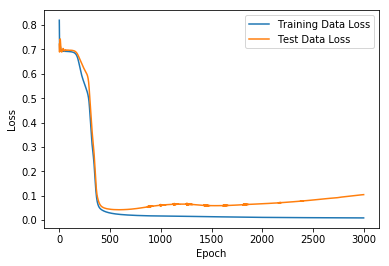

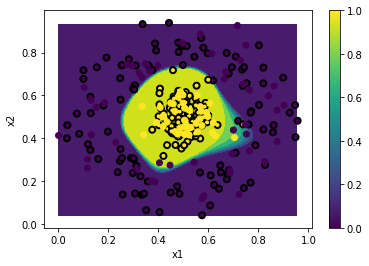

In [230]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = np.arange(0, len(loss))

plt.plot(epoch,(loss), label='Training Data Loss')
plt.plot(epoch,(val_loss),label='Test Data Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

xx, yy = np.meshgrid(np.arange(x1_min,x1_max,0.01),np.arange(x2_min,x2_max,0.01))

z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z)
plt.scatter(X_train[:,0],X_train[:,1],edgecolor="black",linewidth=2,c=y_train)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.show()

From looking at the loss curves we can see something quite different to the first model. Here we see that the loss of both the training and test data falls much closer to 0 as the training come to an end. However unlike the first example as the training reaches its end the two loss curves begin to diverge. We see the test loss begin to rapidly increase. 

This divergence is a excellent indicator of an overfitting model. In this example the increased complexity of the neural network (or increased nonlinearity) has allowed the model to fit every point with a classification of 1 and thereby producing a decicion boundary that is not general enough to prodice a reasonable fit of the test data. In practice increasing the amount of test data would help to reduce this over fitting slightly however for practicle purposes this is not always possible.

To comensate this overfitting of the test data we must reduce the scale of our model and therby reduce the complexity of the decision boundary that the model can produce.

In [17]:
layers = []
layers.append(keras.layers.Dense(6,input_dim = 2, activation="sigmoid"))
layers.append(keras.layers.Dense(1, activation="sigmoid"))

model = keras.Sequential(layers)

In [18]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.03), loss='binary_crossentropy', metrics=['binary_accuracy', 'categorical_accuracy'])

history = model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size=X_train.shape[0],epochs=3000, verbose=0)

Again we can plot both the loss curves and the decision boundary.

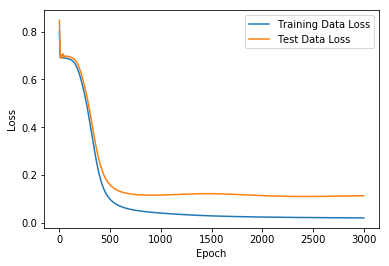

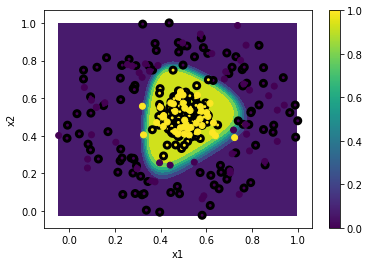

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = np.arange(0, len(loss))

plt.plot(epoch,(loss), label='Training Data Loss')
plt.plot(epoch,(val_loss),label='Test Data Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

xx, yy = np.meshgrid(np.arange(x1_min,x1_max,0.01),np.arange(x2_min,x2_max,0.01))

z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z)
plt.scatter(X_train[:,0],X_train[:,1],edgecolor="black",linewidth=3,c=y_train)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.show()

Here we can see that the loss curves are much more comparable for both the training and test data, both of which converge much closer to zero.

As mentioned previously the amount of test data can be another way a model can overfit.

In [249]:
testLoss = []
trainLoss = []
ratio = []

for splitRatio in np.arange(0.1,0.9,0.1):

    X_train = features[:int(data_len*splitRatio)]
    X_test = features[int(data_len*splitRatio):]
    y_train = labels[:int(data_len*splitRatio)]
    y_test = labels[int(data_len*splitRatio):]


    layers = []
    layers.append(keras.layers.Dense(3,input_dim = 2, activation="sigmoid"))
    layers.append(keras.layers.Dense(1, activation="sigmoid"))
    model = keras.Sequential(layers)

    model.compile(optimizer=keras.optimizers.Adam(lr=0.1), loss='binary_crossentropy', metrics=['binary_accuracy', 'categorical_accuracy'])
    history = model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size=int(X_train.shape[0]),epochs=3000, verbose=2)
   
    testLoss.append(history.history['loss'][-1])
    trainLoss.append(history.history['val_loss'][-1])
    ratio.append(splitRatio)



Train on 30 samples, validate on 270 samples
Epoch 1/3000
 - 2s - loss: 0.6964 - binary_accuracy: 0.4667 - categorical_accuracy: 1.0000 - val_loss: 0.6995 - val_binary_accuracy: 0.4963 - val_categorical_accuracy: 1.0000
Epoch 2/3000
 - 0s - loss: 0.6926 - binary_accuracy: 0.5333 - categorical_accuracy: 1.0000 - val_loss: 0.7053 - val_binary_accuracy: 0.4963 - val_categorical_accuracy: 1.0000
Epoch 3/3000
 - 0s - loss: 0.6949 - binary_accuracy: 0.5333 - categorical_accuracy: 1.0000 - val_loss: 0.7021 - val_binary_accuracy: 0.4963 - val_categorical_accuracy: 1.0000
Epoch 4/3000
 - 0s - loss: 0.6930 - binary_accuracy: 0.5333 - categorical_accuracy: 1.0000 - val_loss: 0.6971 - val_binary_accuracy: 0.4963 - val_categorical_accuracy: 1.0000
Epoch 5/3000
 - 0s - loss: 0.6909 - binary_accuracy: 0.5333 - categorical_accuracy: 1.0000 - val_loss: 0.6944 - val_binary_accuracy: 0.4963 - val_categorical_accuracy: 1.0000
Epoch 6/3000
 - 0s - loss: 0.6910 - binary_accuracy: 0.5333 - categorical_accura

Epoch 48/3000
 - 0s - loss: 0.6160 - binary_accuracy: 0.6667 - categorical_accuracy: 1.0000 - val_loss: 0.6604 - val_binary_accuracy: 0.5630 - val_categorical_accuracy: 1.0000
Epoch 49/3000
 - 0s - loss: 0.6126 - binary_accuracy: 0.6667 - categorical_accuracy: 1.0000 - val_loss: 0.6575 - val_binary_accuracy: 0.5667 - val_categorical_accuracy: 1.0000
Epoch 50/3000
 - 0s - loss: 0.6092 - binary_accuracy: 0.6667 - categorical_accuracy: 1.0000 - val_loss: 0.6544 - val_binary_accuracy: 0.5667 - val_categorical_accuracy: 1.0000
Epoch 51/3000
 - 0s - loss: 0.6056 - binary_accuracy: 0.6667 - categorical_accuracy: 1.0000 - val_loss: 0.6508 - val_binary_accuracy: 0.5704 - val_categorical_accuracy: 1.0000
Epoch 52/3000
 - 0s - loss: 0.6018 - binary_accuracy: 0.6667 - categorical_accuracy: 1.0000 - val_loss: 0.6468 - val_binary_accuracy: 0.5963 - val_categorical_accuracy: 1.0000
Epoch 53/3000
 - 0s - loss: 0.5978 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.6428 - val_bin

Epoch 95/3000
 - 0s - loss: 0.2992 - binary_accuracy: 0.9333 - categorical_accuracy: 1.0000 - val_loss: 0.2849 - val_binary_accuracy: 0.9370 - val_categorical_accuracy: 1.0000
Epoch 96/3000
 - 0s - loss: 0.2908 - binary_accuracy: 0.9333 - categorical_accuracy: 1.0000 - val_loss: 0.2757 - val_binary_accuracy: 0.9370 - val_categorical_accuracy: 1.0000
Epoch 97/3000
 - 0s - loss: 0.2823 - binary_accuracy: 0.9333 - categorical_accuracy: 1.0000 - val_loss: 0.2667 - val_binary_accuracy: 0.9481 - val_categorical_accuracy: 1.0000
Epoch 98/3000
 - 0s - loss: 0.2737 - binary_accuracy: 0.9333 - categorical_accuracy: 1.0000 - val_loss: 0.2578 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 99/3000
 - 0s - loss: 0.2650 - binary_accuracy: 0.9333 - categorical_accuracy: 1.0000 - val_loss: 0.2491 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 100/3000
 - 0s - loss: 0.2562 - binary_accuracy: 0.9333 - categorical_accuracy: 1.0000 - val_loss: 0.2405 - val_bi

Epoch 142/3000
 - 0s - loss: 0.0538 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1003 - val_binary_accuracy: 0.9704 - val_categorical_accuracy: 1.0000
Epoch 143/3000
 - 0s - loss: 0.0523 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0998 - val_binary_accuracy: 0.9704 - val_categorical_accuracy: 1.0000
Epoch 144/3000
 - 0s - loss: 0.0509 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0994 - val_binary_accuracy: 0.9704 - val_categorical_accuracy: 1.0000
Epoch 145/3000
 - 0s - loss: 0.0496 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0990 - val_binary_accuracy: 0.9704 - val_categorical_accuracy: 1.0000
Epoch 146/3000
 - 0s - loss: 0.0484 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0986 - val_binary_accuracy: 0.9704 - val_categorical_accuracy: 1.0000
Epoch 147/3000
 - 0s - loss: 0.0472 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0983 - v

Epoch 189/3000
 - 0s - loss: 0.0226 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0943 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 190/3000
 - 0s - loss: 0.0223 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0943 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 191/3000
 - 0s - loss: 0.0220 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0944 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 192/3000
 - 0s - loss: 0.0217 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0944 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 193/3000
 - 0s - loss: 0.0215 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0944 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 194/3000
 - 0s - loss: 0.0212 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0945 - v

Epoch 236/3000
 - 0s - loss: 0.0139 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0975 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 237/3000
 - 0s - loss: 0.0138 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0976 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 238/3000
 - 0s - loss: 0.0137 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0977 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 239/3000
 - 0s - loss: 0.0135 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0978 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 240/3000
 - 0s - loss: 0.0134 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0979 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 241/3000
 - 0s - loss: 0.0133 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0980 - v

Epoch 283/3000
 - 0s - loss: 0.0098 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1023 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 284/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1024 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 285/3000
 - 0s - loss: 0.0096 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1025 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 286/3000
 - 0s - loss: 0.0096 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1026 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 287/3000
 - 0s - loss: 0.0095 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1027 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 288/3000
 - 0s - loss: 0.0095 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1028 - v

Epoch 330/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1072 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 331/3000
 - 0s - loss: 0.0073 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1073 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 332/3000
 - 0s - loss: 0.0073 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1074 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 333/3000
 - 0s - loss: 0.0073 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1075 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 334/3000
 - 0s - loss: 0.0072 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1076 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 335/3000
 - 0s - loss: 0.0072 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1077 - v

Epoch 377/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1119 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 378/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1120 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 379/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1121 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 380/3000
 - 0s - loss: 0.0057 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1122 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 381/3000
 - 0s - loss: 0.0057 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1123 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 382/3000
 - 0s - loss: 0.0057 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1124 - v

Epoch 424/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1164 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 425/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1165 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 426/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1166 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 427/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1167 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 428/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1168 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 429/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1169 - v

Epoch 471/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1207 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 472/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1208 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 473/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1209 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 474/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1210 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 475/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1211 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 476/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1211 - v

Epoch 518/3000
 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1247 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 519/3000
 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1248 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 520/3000
 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1249 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 521/3000
 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1250 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 522/3000
 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1251 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 523/3000
 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1252 - v

Epoch 565/3000
 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1286 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 566/3000
 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1286 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 567/3000
 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1287 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 568/3000
 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1288 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 569/3000
 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1289 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 570/3000
 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1290 - v

Epoch 612/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1322 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 613/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1323 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 614/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1323 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 615/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1324 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 616/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1325 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 617/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1326 - v

Epoch 659/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1357 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 660/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1357 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 661/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1358 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 662/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1359 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 663/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1359 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 664/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1360 - v

Epoch 706/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1390 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 707/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1390 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 708/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1391 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 709/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1392 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 710/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1392 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 711/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1393 - v

Epoch 753/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1421 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 754/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1422 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 755/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1423 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 756/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1423 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 757/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1424 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 758/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1425 - v

Epoch 800/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1452 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 801/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1452 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 802/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1453 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 803/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1454 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 804/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1454 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 805/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1455 - v

Epoch 847/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1481 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 848/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1482 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 849/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1482 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 850/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1483 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 851/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1483 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 852/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1484 - v

Epoch 894/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1509 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 895/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1510 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 896/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1510 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 897/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1511 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 898/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1512 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 899/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1512 - v

Epoch 941/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1536 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 942/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1537 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 943/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1538 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 944/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1538 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 945/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1539 - val_binary_accuracy: 0.9593 - val_categorical_accuracy: 1.0000
Epoch 946/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1539 - v

Epoch 988/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1563 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 989/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1563 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 990/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1564 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 991/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1564 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 992/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1565 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 993/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1565 - v

Epoch 1035/3000
 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1588 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1036/3000
 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1589 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1037/3000
 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1589 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1038/3000
 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1590 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1039/3000
 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1590 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1040/3000
 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.15

Epoch 1081/3000
 - 0s - loss: 9.4751e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1612 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1082/3000
 - 0s - loss: 9.4597e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1613 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1083/3000
 - 0s - loss: 9.4443e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1613 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1084/3000
 - 0s - loss: 9.4290e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1614 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1085/3000
 - 0s - loss: 9.4137e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1614 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1086/3000
 - 0s - loss: 9.3985e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 8.8176e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1635 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1127/3000
 - 0s - loss: 8.8039e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1636 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1128/3000
 - 0s - loss: 8.7901e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1636 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1129/3000
 - 0s - loss: 8.7763e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1637 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1130/3000
 - 0s - loss: 8.7626e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1637 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1131/3000
 - 0s - loss: 8.7489e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 1172/3000
 - 0s - loss: 8.2141e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1658 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1173/3000
 - 0s - loss: 8.2016e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1659 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1174/3000
 - 0s - loss: 8.1893e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1659 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1175/3000
 - 0s - loss: 8.1768e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1660 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1176/3000
 - 0s - loss: 8.1646e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1660 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1177/3000
 - 0s - loss: 8.1523e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 7.6815e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1680 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1218/3000
 - 0s - loss: 7.6702e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1681 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1219/3000
 - 0s - loss: 7.6589e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1681 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1220/3000
 - 0s - loss: 7.6477e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1682 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1221/3000
 - 0s - loss: 7.6366e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1682 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1222/3000
 - 0s - loss: 7.6254e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 1263/3000
 - 0s - loss: 7.1883e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1702 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1264/3000
 - 0s - loss: 7.1782e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1702 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1265/3000
 - 0s - loss: 7.1680e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1703 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1266/3000
 - 0s - loss: 7.1579e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1703 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1267/3000
 - 0s - loss: 7.1477e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1704 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1268/3000
 - 0s - loss: 7.1377e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 6.7501e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1723 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1309/3000
 - 0s - loss: 6.7408e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1723 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1310/3000
 - 0s - loss: 6.7315e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1724 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1311/3000
 - 0s - loss: 6.7223e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1724 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1312/3000
 - 0s - loss: 6.7131e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1725 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1313/3000
 - 0s - loss: 6.7039e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 1354/3000
 - 0s - loss: 6.3416e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1744 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1355/3000
 - 0s - loss: 6.3332e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1744 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1356/3000
 - 0s - loss: 6.3247e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1744 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1357/3000
 - 0s - loss: 6.3163e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1745 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1358/3000
 - 0s - loss: 6.3078e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1745 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1359/3000
 - 0s - loss: 6.2995e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 5.9763e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1763 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1400/3000
 - 0s - loss: 5.9685e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1764 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1401/3000
 - 0s - loss: 5.9607e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1764 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1402/3000
 - 0s - loss: 5.9529e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1765 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1403/3000
 - 0s - loss: 5.9453e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1765 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1404/3000
 - 0s - loss: 5.9375e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 1445/3000
 - 0s - loss: 5.6337e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1783 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1446/3000
 - 0s - loss: 5.6265e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1784 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1447/3000
 - 0s - loss: 5.6195e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1784 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1448/3000
 - 0s - loss: 5.6123e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1785 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1449/3000
 - 0s - loss: 5.6052e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1785 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1450/3000
 - 0s - loss: 5.5982e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 5.3255e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1802 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1491/3000
 - 0s - loss: 5.3189e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1803 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1492/3000
 - 0s - loss: 5.3124e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1803 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1493/3000
 - 0s - loss: 5.3059e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1804 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1494/3000
 - 0s - loss: 5.2993e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1804 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1495/3000
 - 0s - loss: 5.2928e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 1536/3000
 - 0s - loss: 5.0352e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1822 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1537/3000
 - 0s - loss: 5.0291e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1822 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1538/3000
 - 0s - loss: 5.0231e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1822 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1539/3000
 - 0s - loss: 5.0170e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1823 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1540/3000
 - 0s - loss: 5.0109e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1823 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1541/3000
 - 0s - loss: 5.0050e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 4.7727e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1840 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1582/3000
 - 0s - loss: 4.7672e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1840 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1583/3000
 - 0s - loss: 4.7615e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1841 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1584/3000
 - 0s - loss: 4.7559e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1841 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1585/3000
 - 0s - loss: 4.7503e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1842 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1586/3000
 - 0s - loss: 4.7447e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 1627/3000
 - 0s - loss: 4.5242e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1858 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1628/3000
 - 0s - loss: 4.5191e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1859 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1629/3000
 - 0s - loss: 4.5138e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1859 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1630/3000
 - 0s - loss: 4.5087e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1860 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1631/3000
 - 0s - loss: 4.5035e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1860 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1632/3000
 - 0s - loss: 4.4983e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 4.2987e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1876 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1673/3000
 - 0s - loss: 4.2938e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1876 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1674/3000
 - 0s - loss: 4.2891e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1877 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1675/3000
 - 0s - loss: 4.2843e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1877 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1676/3000
 - 0s - loss: 4.2795e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1878 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1677/3000
 - 0s - loss: 4.2746e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 1718/3000
 - 0s - loss: 4.0844e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1894 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1719/3000
 - 0s - loss: 4.0799e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1894 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1720/3000
 - 0s - loss: 4.0754e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1895 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1721/3000
 - 0s - loss: 4.0709e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1895 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1722/3000
 - 0s - loss: 4.0664e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1895 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1723/3000
 - 0s - loss: 4.0619e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 3.8890e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1911 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1764/3000
 - 0s - loss: 3.8848e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1911 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1765/3000
 - 0s - loss: 3.8807e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1912 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1766/3000
 - 0s - loss: 3.8764e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1912 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1767/3000
 - 0s - loss: 3.8723e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1913 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1768/3000
 - 0s - loss: 3.8681e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 1809/3000
 - 0s - loss: 3.7027e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1928 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1810/3000
 - 0s - loss: 3.6988e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1929 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1811/3000
 - 0s - loss: 3.6950e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1929 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1812/3000
 - 0s - loss: 3.6910e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1929 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1813/3000
 - 0s - loss: 3.6871e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1930 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1814/3000
 - 0s - loss: 3.6832e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 3.5323e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1945 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1855/3000
 - 0s - loss: 3.5288e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1945 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1856/3000
 - 0s - loss: 3.5251e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1946 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1857/3000
 - 0s - loss: 3.5215e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1946 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1858/3000
 - 0s - loss: 3.5178e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1946 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1859/3000
 - 0s - loss: 3.5141e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 1900/3000
 - 0s - loss: 3.3694e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1962 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1901/3000
 - 0s - loss: 3.3660e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1962 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1902/3000
 - 0s - loss: 3.3626e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1962 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1903/3000
 - 0s - loss: 3.3592e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1963 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1904/3000
 - 0s - loss: 3.3556e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1963 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1905/3000
 - 0s - loss: 3.3523e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 3.2198e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1978 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1946/3000
 - 0s - loss: 3.2166e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1978 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1947/3000
 - 0s - loss: 3.2134e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1979 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1948/3000
 - 0s - loss: 3.2102e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1979 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1949/3000
 - 0s - loss: 3.2070e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1979 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1950/3000
 - 0s - loss: 3.2038e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 1991/3000
 - 0s - loss: 3.0763e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1994 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1992/3000
 - 0s - loss: 3.0734e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1995 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1993/3000
 - 0s - loss: 3.0704e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1995 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1994/3000
 - 0s - loss: 3.0672e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1995 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1995/3000
 - 0s - loss: 3.0642e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1996 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1996/3000
 - 0s - loss: 3.0613e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 2.9444e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2010 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2037/3000
 - 0s - loss: 2.9416e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2010 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2038/3000
 - 0s - loss: 2.9388e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2011 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2039/3000
 - 0s - loss: 2.9359e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2011 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2040/3000
 - 0s - loss: 2.9330e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2011 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2041/3000
 - 0s - loss: 2.9303e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2082/3000
 - 0s - loss: 2.8175e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2026 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2083/3000
 - 0s - loss: 2.8148e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2026 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2084/3000
 - 0s - loss: 2.8121e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2026 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2085/3000
 - 0s - loss: 2.8094e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2027 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2086/3000
 - 0s - loss: 2.8067e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2027 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2087/3000
 - 0s - loss: 2.8040e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 2.7002e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2041 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2128/3000
 - 0s - loss: 2.6977e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2041 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2129/3000
 - 0s - loss: 2.6953e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2042 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2130/3000
 - 0s - loss: 2.6928e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2042 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2131/3000
 - 0s - loss: 2.6903e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2042 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2132/3000
 - 0s - loss: 2.6878e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2173/3000
 - 0s - loss: 2.5874e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2057 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2174/3000
 - 0s - loss: 2.5851e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2057 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2175/3000
 - 0s - loss: 2.5826e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2057 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2176/3000
 - 0s - loss: 2.5803e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2058 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2177/3000
 - 0s - loss: 2.5780e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2058 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2178/3000
 - 0s - loss: 2.5755e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 2.4830e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2072 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2219/3000
 - 0s - loss: 2.4809e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2072 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2220/3000
 - 0s - loss: 2.4786e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2072 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2221/3000
 - 0s - loss: 2.4764e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2073 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2222/3000
 - 0s - loss: 2.4741e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2073 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2223/3000
 - 0s - loss: 2.4718e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2264/3000
 - 0s - loss: 2.3822e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2087 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2265/3000
 - 0s - loss: 2.3801e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2087 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2266/3000
 - 0s - loss: 2.3780e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2087 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2267/3000
 - 0s - loss: 2.3758e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2088 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2268/3000
 - 0s - loss: 2.3737e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2088 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2269/3000
 - 0s - loss: 2.3715e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 2.2887e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2101 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2310/3000
 - 0s - loss: 2.2867e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2102 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2311/3000
 - 0s - loss: 2.2847e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2102 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2312/3000
 - 0s - loss: 2.2827e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2102 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2313/3000
 - 0s - loss: 2.2807e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2103 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2314/3000
 - 0s - loss: 2.2787e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2355/3000
 - 0s - loss: 2.1982e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2116 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2356/3000
 - 0s - loss: 2.1964e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2117 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2357/3000
 - 0s - loss: 2.1945e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2117 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2358/3000
 - 0s - loss: 2.1925e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2117 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2359/3000
 - 0s - loss: 2.1906e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2118 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2360/3000
 - 0s - loss: 2.1887e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 2.1143e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2131 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2401/3000
 - 0s - loss: 2.1125e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2131 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2402/3000
 - 0s - loss: 2.1106e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2131 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2403/3000
 - 0s - loss: 2.1089e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2132 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2404/3000
 - 0s - loss: 2.1070e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2132 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2405/3000
 - 0s - loss: 2.1052e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2446/3000
 - 0s - loss: 2.0328e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2145 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2447/3000
 - 0s - loss: 2.0311e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2146 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2448/3000
 - 0s - loss: 2.0294e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2146 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2449/3000
 - 0s - loss: 2.0277e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2146 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2450/3000
 - 0s - loss: 2.0259e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2146 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2451/3000
 - 0s - loss: 2.0241e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 1.9571e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2159 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2492/3000
 - 0s - loss: 1.9554e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2160 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2493/3000
 - 0s - loss: 1.9538e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2160 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2494/3000
 - 0s - loss: 1.9522e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2160 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2495/3000
 - 0s - loss: 1.9505e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2161 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2496/3000
 - 0s - loss: 1.9489e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2537/3000
 - 0s - loss: 1.8835e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2174 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2538/3000
 - 0s - loss: 1.8819e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2174 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2539/3000
 - 0s - loss: 1.8803e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2174 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2540/3000
 - 0s - loss: 1.8787e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2175 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2541/3000
 - 0s - loss: 1.8772e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2175 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2542/3000
 - 0s - loss: 1.8756e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 1.8149e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2187 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2583/3000
 - 0s - loss: 1.8134e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2188 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2584/3000
 - 0s - loss: 1.8119e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2188 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2585/3000
 - 0s - loss: 1.8104e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2188 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2586/3000
 - 0s - loss: 1.8090e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2189 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2587/3000
 - 0s - loss: 1.8075e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2628/3000
 - 0s - loss: 1.7483e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2201 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2629/3000
 - 0s - loss: 1.7468e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2202 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2630/3000
 - 0s - loss: 1.7453e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2202 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2631/3000
 - 0s - loss: 1.7439e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2202 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2632/3000
 - 0s - loss: 1.7425e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2203 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2633/3000
 - 0s - loss: 1.7411e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 1.6860e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2215 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2674/3000
 - 0s - loss: 1.6845e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2215 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2675/3000
 - 0s - loss: 1.6832e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2216 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2676/3000
 - 0s - loss: 1.6819e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2216 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2677/3000
 - 0s - loss: 1.6806e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2216 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2678/3000
 - 0s - loss: 1.6792e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2719/3000
 - 0s - loss: 1.6252e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2229 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2720/3000
 - 0s - loss: 1.6240e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2229 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2721/3000
 - 0s - loss: 1.6227e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2229 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2722/3000
 - 0s - loss: 1.6214e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2230 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2723/3000
 - 0s - loss: 1.6201e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2230 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2724/3000
 - 0s - loss: 1.6188e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 1.5686e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2242 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2765/3000
 - 0s - loss: 1.5674e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2243 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2766/3000
 - 0s - loss: 1.5662e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2243 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2767/3000
 - 0s - loss: 1.5649e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2243 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2768/3000
 - 0s - loss: 1.5637e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2243 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2769/3000
 - 0s - loss: 1.5626e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2810/3000
 - 0s - loss: 1.5133e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2256 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2811/3000
 - 0s - loss: 1.5121e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2256 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2812/3000
 - 0s - loss: 1.5110e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2256 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2813/3000
 - 0s - loss: 1.5098e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2257 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2814/3000
 - 0s - loss: 1.5087e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2257 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2815/3000
 - 0s - loss: 1.5074e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 1.4616e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2269 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2856/3000
 - 0s - loss: 1.4605e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2269 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2857/3000
 - 0s - loss: 1.4594e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2270 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2858/3000
 - 0s - loss: 1.4582e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2270 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2859/3000
 - 0s - loss: 1.4571e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2270 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2860/3000
 - 0s - loss: 1.4559e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2901/3000
 - 0s - loss: 1.4111e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2282 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2902/3000
 - 0s - loss: 1.4100e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2283 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2903/3000
 - 0s - loss: 1.4089e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2283 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2904/3000
 - 0s - loss: 1.4079e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2283 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2905/3000
 - 0s - loss: 1.4067e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2284 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2906/3000
 - 0s - loss: 1.4057e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 1.3637e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2295 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2947/3000
 - 0s - loss: 1.3627e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2296 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2948/3000
 - 0s - loss: 1.3617e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2296 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2949/3000
 - 0s - loss: 1.3607e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2296 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2950/3000
 - 0s - loss: 1.3597e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2297 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2951/3000
 - 0s - loss: 1.3586e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2992/3000
 - 0s - loss: 1.3175e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2309 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2993/3000
 - 0s - loss: 1.3164e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2309 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2994/3000
 - 0s - loss: 1.3155e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2309 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2995/3000
 - 0s - loss: 1.3145e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2310 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2996/3000
 - 0s - loss: 1.3134e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2310 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2997/3000
 - 0s - loss: 1.3125e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 39/3000
 - 0s - loss: 0.6672 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.6873 - val_binary_accuracy: 0.6500 - val_categorical_accuracy: 1.0000
Epoch 40/3000
 - 0s - loss: 0.6652 - binary_accuracy: 0.7167 - categorical_accuracy: 1.0000 - val_loss: 0.6856 - val_binary_accuracy: 0.6583 - val_categorical_accuracy: 1.0000
Epoch 41/3000
 - 0s - loss: 0.6631 - binary_accuracy: 0.7167 - categorical_accuracy: 1.0000 - val_loss: 0.6842 - val_binary_accuracy: 0.6708 - val_categorical_accuracy: 1.0000
Epoch 42/3000
 - 0s - loss: 0.6610 - binary_accuracy: 0.7167 - categorical_accuracy: 1.0000 - val_loss: 0.6831 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 43/3000
 - 0s - loss: 0.6587 - binary_accuracy: 0.7167 - categorical_accuracy: 1.0000 - val_loss: 0.6823 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 44/3000
 - 0s - loss: 0.6562 - binary_accuracy: 0.7167 - categorical_accuracy: 1.0000 - val_loss: 0.6817 - val_bin

Epoch 86/3000
 - 0s - loss: 0.5510 - binary_accuracy: 0.7333 - categorical_accuracy: 1.0000 - val_loss: 0.6199 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 87/3000
 - 0s - loss: 0.5497 - binary_accuracy: 0.7333 - categorical_accuracy: 1.0000 - val_loss: 0.6188 - val_binary_accuracy: 0.6708 - val_categorical_accuracy: 1.0000
Epoch 88/3000
 - 0s - loss: 0.5483 - binary_accuracy: 0.7333 - categorical_accuracy: 1.0000 - val_loss: 0.6175 - val_binary_accuracy: 0.6708 - val_categorical_accuracy: 1.0000
Epoch 89/3000
 - 0s - loss: 0.5470 - binary_accuracy: 0.7333 - categorical_accuracy: 1.0000 - val_loss: 0.6163 - val_binary_accuracy: 0.6708 - val_categorical_accuracy: 1.0000
Epoch 90/3000
 - 0s - loss: 0.5458 - binary_accuracy: 0.7333 - categorical_accuracy: 1.0000 - val_loss: 0.6151 - val_binary_accuracy: 0.6708 - val_categorical_accuracy: 1.0000
Epoch 91/3000
 - 0s - loss: 0.5445 - binary_accuracy: 0.7333 - categorical_accuracy: 1.0000 - val_loss: 0.6139 - val_bin

Epoch 133/3000
 - 0s - loss: 0.4762 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.5548 - val_binary_accuracy: 0.7292 - val_categorical_accuracy: 1.0000
Epoch 134/3000
 - 0s - loss: 0.4739 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.5522 - val_binary_accuracy: 0.7292 - val_categorical_accuracy: 1.0000
Epoch 135/3000
 - 0s - loss: 0.4716 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.5497 - val_binary_accuracy: 0.7292 - val_categorical_accuracy: 1.0000
Epoch 136/3000
 - 0s - loss: 0.4694 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.5472 - val_binary_accuracy: 0.7292 - val_categorical_accuracy: 1.0000
Epoch 137/3000
 - 0s - loss: 0.4672 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.5447 - val_binary_accuracy: 0.7292 - val_categorical_accuracy: 1.0000
Epoch 138/3000
 - 0s - loss: 0.4650 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.5423 - v

Epoch 180/3000
 - 0s - loss: 0.4161 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.4685 - val_binary_accuracy: 0.7958 - val_categorical_accuracy: 1.0000
Epoch 181/3000
 - 0s - loss: 0.4156 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.4675 - val_binary_accuracy: 0.7958 - val_categorical_accuracy: 1.0000
Epoch 182/3000
 - 0s - loss: 0.4152 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.4666 - val_binary_accuracy: 0.7958 - val_categorical_accuracy: 1.0000
Epoch 183/3000
 - 0s - loss: 0.4147 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.4657 - val_binary_accuracy: 0.7958 - val_categorical_accuracy: 1.0000
Epoch 184/3000
 - 0s - loss: 0.4142 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.4648 - val_binary_accuracy: 0.7958 - val_categorical_accuracy: 1.0000
Epoch 185/3000
 - 0s - loss: 0.4138 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.4640 - v

Epoch 227/3000
 - 0s - loss: 0.3989 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.4382 - val_binary_accuracy: 0.8042 - val_categorical_accuracy: 1.0000
Epoch 228/3000
 - 0s - loss: 0.3984 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.4378 - val_binary_accuracy: 0.8042 - val_categorical_accuracy: 1.0000
Epoch 229/3000
 - 0s - loss: 0.3978 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.4373 - val_binary_accuracy: 0.8000 - val_categorical_accuracy: 1.0000
Epoch 230/3000
 - 0s - loss: 0.3973 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.4369 - val_binary_accuracy: 0.8042 - val_categorical_accuracy: 1.0000
Epoch 231/3000
 - 0s - loss: 0.3966 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.4365 - val_binary_accuracy: 0.8042 - val_categorical_accuracy: 1.0000
Epoch 232/3000
 - 0s - loss: 0.3960 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.4360 - v

Epoch 274/3000
 - 0s - loss: 0.3587 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.3815 - val_binary_accuracy: 0.8333 - val_categorical_accuracy: 1.0000
Epoch 275/3000
 - 0s - loss: 0.3577 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.3799 - val_binary_accuracy: 0.8333 - val_categorical_accuracy: 1.0000
Epoch 276/3000
 - 0s - loss: 0.3567 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.3781 - val_binary_accuracy: 0.8333 - val_categorical_accuracy: 1.0000
Epoch 277/3000
 - 0s - loss: 0.3557 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.3764 - val_binary_accuracy: 0.8375 - val_categorical_accuracy: 1.0000
Epoch 278/3000
 - 0s - loss: 0.3546 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.3746 - val_binary_accuracy: 0.8375 - val_categorical_accuracy: 1.0000
Epoch 279/3000
 - 0s - loss: 0.3535 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.3728 - v

Epoch 321/3000
 - 0s - loss: 0.2924 - binary_accuracy: 0.9000 - categorical_accuracy: 1.0000 - val_loss: 0.3008 - val_binary_accuracy: 0.8875 - val_categorical_accuracy: 1.0000
Epoch 322/3000
 - 0s - loss: 0.2905 - binary_accuracy: 0.9000 - categorical_accuracy: 1.0000 - val_loss: 0.2996 - val_binary_accuracy: 0.8917 - val_categorical_accuracy: 1.0000
Epoch 323/3000
 - 0s - loss: 0.2885 - binary_accuracy: 0.9000 - categorical_accuracy: 1.0000 - val_loss: 0.2984 - val_binary_accuracy: 0.8917 - val_categorical_accuracy: 1.0000
Epoch 324/3000
 - 0s - loss: 0.2864 - binary_accuracy: 0.9167 - categorical_accuracy: 1.0000 - val_loss: 0.2971 - val_binary_accuracy: 0.8917 - val_categorical_accuracy: 1.0000
Epoch 325/3000
 - 0s - loss: 0.2841 - binary_accuracy: 0.9167 - categorical_accuracy: 1.0000 - val_loss: 0.2958 - val_binary_accuracy: 0.8958 - val_categorical_accuracy: 1.0000
Epoch 326/3000
 - 0s - loss: 0.2817 - binary_accuracy: 0.9167 - categorical_accuracy: 1.0000 - val_loss: 0.2945 - v

Epoch 368/3000
 - 0s - loss: 0.0859 - binary_accuracy: 0.9667 - categorical_accuracy: 1.0000 - val_loss: 0.1194 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 369/3000
 - 0s - loss: 0.0829 - binary_accuracy: 0.9667 - categorical_accuracy: 1.0000 - val_loss: 0.1175 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 370/3000
 - 0s - loss: 0.0799 - binary_accuracy: 0.9667 - categorical_accuracy: 1.0000 - val_loss: 0.1156 - val_binary_accuracy: 0.9625 - val_categorical_accuracy: 1.0000
Epoch 371/3000
 - 0s - loss: 0.0771 - binary_accuracy: 0.9667 - categorical_accuracy: 1.0000 - val_loss: 0.1137 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 372/3000
 - 0s - loss: 0.0745 - binary_accuracy: 0.9667 - categorical_accuracy: 1.0000 - val_loss: 0.1120 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 373/3000
 - 0s - loss: 0.0720 - binary_accuracy: 0.9667 - categorical_accuracy: 1.0000 - val_loss: 0.1105 - v

Epoch 415/3000
 - 0s - loss: 0.0254 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0924 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 416/3000
 - 0s - loss: 0.0249 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0924 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 417/3000
 - 0s - loss: 0.0245 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0925 - val_binary_accuracy: 0.9625 - val_categorical_accuracy: 1.0000
Epoch 418/3000
 - 0s - loss: 0.0240 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0926 - val_binary_accuracy: 0.9625 - val_categorical_accuracy: 1.0000
Epoch 419/3000
 - 0s - loss: 0.0236 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0926 - val_binary_accuracy: 0.9625 - val_categorical_accuracy: 1.0000
Epoch 420/3000
 - 0s - loss: 0.0232 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0927 - v

Epoch 462/3000
 - 0s - loss: 0.0135 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0988 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 463/3000
 - 0s - loss: 0.0134 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0990 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 464/3000
 - 0s - loss: 0.0133 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0991 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 465/3000
 - 0s - loss: 0.0131 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0993 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 466/3000
 - 0s - loss: 0.0130 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0995 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 467/3000
 - 0s - loss: 0.0129 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0996 - v

Epoch 509/3000
 - 0s - loss: 0.0092 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1068 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 510/3000
 - 0s - loss: 0.0091 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1069 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 511/3000
 - 0s - loss: 0.0090 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1071 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 512/3000
 - 0s - loss: 0.0090 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1073 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 513/3000
 - 0s - loss: 0.0089 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1075 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 514/3000
 - 0s - loss: 0.0089 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1076 - v

Epoch 556/3000
 - 0s - loss: 0.0069 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1147 - val_binary_accuracy: 0.9625 - val_categorical_accuracy: 1.0000
Epoch 557/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1149 - val_binary_accuracy: 0.9625 - val_categorical_accuracy: 1.0000
Epoch 558/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1151 - val_binary_accuracy: 0.9625 - val_categorical_accuracy: 1.0000
Epoch 559/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1152 - val_binary_accuracy: 0.9625 - val_categorical_accuracy: 1.0000
Epoch 560/3000
 - 0s - loss: 0.0067 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1154 - val_binary_accuracy: 0.9625 - val_categorical_accuracy: 1.0000
Epoch 561/3000
 - 0s - loss: 0.0067 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1155 - v

Epoch 603/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1221 - val_binary_accuracy: 0.9625 - val_categorical_accuracy: 1.0000
Epoch 604/3000
 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1223 - val_binary_accuracy: 0.9625 - val_categorical_accuracy: 1.0000
Epoch 605/3000
 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1224 - val_binary_accuracy: 0.9625 - val_categorical_accuracy: 1.0000
Epoch 606/3000
 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1225 - val_binary_accuracy: 0.9625 - val_categorical_accuracy: 1.0000
Epoch 607/3000
 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1227 - val_binary_accuracy: 0.9625 - val_categorical_accuracy: 1.0000
Epoch 608/3000
 - 0s - loss: 0.0053 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1228 - v

Epoch 650/3000
 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1287 - val_binary_accuracy: 0.9625 - val_categorical_accuracy: 1.0000
Epoch 651/3000
 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1289 - val_binary_accuracy: 0.9625 - val_categorical_accuracy: 1.0000
Epoch 652/3000
 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1290 - val_binary_accuracy: 0.9625 - val_categorical_accuracy: 1.0000
Epoch 653/3000
 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1291 - val_binary_accuracy: 0.9625 - val_categorical_accuracy: 1.0000
Epoch 654/3000
 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1293 - val_binary_accuracy: 0.9625 - val_categorical_accuracy: 1.0000
Epoch 655/3000
 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1294 - v

Epoch 697/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1346 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 698/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1348 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 699/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1349 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 700/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1350 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 701/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1351 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 702/3000
 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1352 - v

Epoch 744/3000
 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1399 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 745/3000
 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1400 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 746/3000
 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1401 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 747/3000
 - 0s - loss: 0.0032 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1402 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 748/3000
 - 0s - loss: 0.0032 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1403 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 749/3000
 - 0s - loss: 0.0032 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1404 - v

Epoch 791/3000
 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1446 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 792/3000
 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1447 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 793/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1448 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 794/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1449 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 795/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1450 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 796/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1451 - v

Epoch 838/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1489 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 839/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1490 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 840/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1491 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 841/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1492 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 842/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1492 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 843/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1493 - v

Epoch 885/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1528 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 886/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1529 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 887/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1529 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 888/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1530 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 889/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1531 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 890/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1532 - v

Epoch 932/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1564 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 933/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1564 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 934/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1565 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 935/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1566 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 936/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1567 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 937/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1567 - v

Epoch 979/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1597 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 980/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1598 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 981/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1598 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 982/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1599 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 983/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1600 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 984/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1600 - v

Epoch 1026/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1628 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1027/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1629 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1028/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1629 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1029/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1630 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1030/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1631 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1031/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.16

 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1657 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1073/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1657 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1074/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1658 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1075/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1659 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1076/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1659 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1077/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1660 - val_binary_

Epoch 1119/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1684 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1120/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1685 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1121/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1686 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1122/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1686 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1123/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1687 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1124/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.16

 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1710 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1166/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1711 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1167/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1711 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1168/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1712 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1169/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1712 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1170/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1713 - val_binary_

Epoch 1212/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1735 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1213/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1736 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1214/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1736 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1215/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1737 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1216/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1737 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1217/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.17

 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1759 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1259/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1759 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1260/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1760 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1261/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1760 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1262/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1761 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1263/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1761 - val_binary_

Epoch 1305/3000
 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1782 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1306/3000
 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1783 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1307/3000
 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1783 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1308/3000
 - 0s - loss: 9.9897e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1784 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1309/3000
 - 0s - loss: 9.9740e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1784 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1310/3000
 - 0s - loss: 9.9584e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - va

 - 0s - loss: 9.3611e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1803 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1351/3000
 - 0s - loss: 9.3469e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1804 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1352/3000
 - 0s - loss: 9.3326e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1804 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1353/3000
 - 0s - loss: 9.3185e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1805 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1354/3000
 - 0s - loss: 9.3043e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1805 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1355/3000
 - 0s - loss: 9.2901e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 1396/3000
 - 0s - loss: 8.7371e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1825 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1397/3000
 - 0s - loss: 8.7241e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1825 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1398/3000
 - 0s - loss: 8.7113e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1825 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1399/3000
 - 0s - loss: 8.6985e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1826 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1400/3000
 - 0s - loss: 8.6857e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1826 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1401/3000
 - 0s - loss: 8.6729e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 8.1836e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1845 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1442/3000
 - 0s - loss: 8.1720e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1845 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1443/3000
 - 0s - loss: 8.1603e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1845 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1444/3000
 - 0s - loss: 8.1486e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1846 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1445/3000
 - 0s - loss: 8.1369e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1846 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1446/3000
 - 0s - loss: 8.1253e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 1487/3000
 - 0s - loss: 7.6692e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1864 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1488/3000
 - 0s - loss: 7.6584e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1865 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1489/3000
 - 0s - loss: 7.6478e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1865 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1490/3000
 - 0s - loss: 7.6372e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1866 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1491/3000
 - 0s - loss: 7.6266e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1866 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1492/3000
 - 0s - loss: 7.6160e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 7.2098e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1883 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1533/3000
 - 0s - loss: 7.2001e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1884 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1534/3000
 - 0s - loss: 7.1904e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1884 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1535/3000
 - 0s - loss: 7.1806e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1885 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1536/3000
 - 0s - loss: 7.1710e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1885 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1537/3000
 - 0s - loss: 7.1613e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 1578/3000
 - 0s - loss: 6.7802e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1902 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1579/3000
 - 0s - loss: 6.7712e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1903 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1580/3000
 - 0s - loss: 6.7623e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1903 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1581/3000
 - 0s - loss: 6.7535e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1903 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1582/3000
 - 0s - loss: 6.7446e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1904 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 1583/3000
 - 0s - loss: 6.7357e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 6.3945e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1920 - val_binary_accuracy: 0.9542 - val_categorical_accuracy: 1.0000
Epoch 1624/3000
 - 0s - loss: 6.3863e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1921 - val_binary_accuracy: 0.9542 - val_categorical_accuracy: 1.0000
Epoch 1625/3000
 - 0s - loss: 6.3781e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1921 - val_binary_accuracy: 0.9542 - val_categorical_accuracy: 1.0000
Epoch 1626/3000
 - 0s - loss: 6.3699e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1921 - val_binary_accuracy: 0.9542 - val_categorical_accuracy: 1.0000
Epoch 1627/3000
 - 0s - loss: 6.3617e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1922 - val_binary_accuracy: 0.9542 - val_categorical_accuracy: 1.0000
Epoch 1628/3000
 - 0s - loss: 6.3537e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 1669/3000
 - 0s - loss: 6.0318e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1938 - val_binary_accuracy: 0.9542 - val_categorical_accuracy: 1.0000
Epoch 1670/3000
 - 0s - loss: 6.0243e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1939 - val_binary_accuracy: 0.9542 - val_categorical_accuracy: 1.0000
Epoch 1671/3000
 - 0s - loss: 6.0167e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1939 - val_binary_accuracy: 0.9542 - val_categorical_accuracy: 1.0000
Epoch 1672/3000
 - 0s - loss: 6.0093e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1939 - val_binary_accuracy: 0.9542 - val_categorical_accuracy: 1.0000
Epoch 1673/3000
 - 0s - loss: 6.0017e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1940 - val_binary_accuracy: 0.9542 - val_categorical_accuracy: 1.0000
Epoch 1674/3000
 - 0s - loss: 5.9942e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 5.7047e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1955 - val_binary_accuracy: 0.9542 - val_categorical_accuracy: 1.0000
Epoch 1715/3000
 - 0s - loss: 5.6977e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1956 - val_binary_accuracy: 0.9542 - val_categorical_accuracy: 1.0000
Epoch 1716/3000
 - 0s - loss: 5.6907e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1956 - val_binary_accuracy: 0.9542 - val_categorical_accuracy: 1.0000
Epoch 1717/3000
 - 0s - loss: 5.6838e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1956 - val_binary_accuracy: 0.9542 - val_categorical_accuracy: 1.0000
Epoch 1718/3000
 - 0s - loss: 5.6768e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1957 - val_binary_accuracy: 0.9542 - val_categorical_accuracy: 1.0000
Epoch 1719/3000
 - 0s - loss: 5.6699e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 1760/3000
 - 0s - loss: 5.3956e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1973 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1761/3000
 - 0s - loss: 5.3892e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1973 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1762/3000
 - 0s - loss: 5.3827e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1973 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1763/3000
 - 0s - loss: 5.3763e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1974 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1764/3000
 - 0s - loss: 5.3699e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1974 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1765/3000
 - 0s - loss: 5.3634e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 5.1156e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1989 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1806/3000
 - 0s - loss: 5.1096e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1989 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1807/3000
 - 0s - loss: 5.1036e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1990 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1808/3000
 - 0s - loss: 5.0976e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1990 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1809/3000
 - 0s - loss: 5.0916e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1990 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1810/3000
 - 0s - loss: 5.0858e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 1851/3000
 - 0s - loss: 4.8500e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2006 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1852/3000
 - 0s - loss: 4.8444e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2006 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1853/3000
 - 0s - loss: 4.8389e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2006 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1854/3000
 - 0s - loss: 4.8333e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2007 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1855/3000
 - 0s - loss: 4.8278e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2007 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1856/3000
 - 0s - loss: 4.8222e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 4.6084e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2021 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 1897/3000
 - 0s - loss: 4.6033e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2022 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 1898/3000
 - 0s - loss: 4.5981e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2022 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 1899/3000
 - 0s - loss: 4.5928e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2022 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 1900/3000
 - 0s - loss: 4.5877e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2023 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 1901/3000
 - 0s - loss: 4.5826e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 1942/3000
 - 0s - loss: 4.3784e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2037 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 1943/3000
 - 0s - loss: 4.3736e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2038 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 1944/3000
 - 0s - loss: 4.3688e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2038 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 1945/3000
 - 0s - loss: 4.3640e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2038 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 1946/3000
 - 0s - loss: 4.3592e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2039 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 1947/3000
 - 0s - loss: 4.3544e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 4.1685e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2053 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 1988/3000
 - 0s - loss: 4.1640e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2053 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 1989/3000
 - 0s - loss: 4.1595e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2053 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 1990/3000
 - 0s - loss: 4.1550e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2054 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 1991/3000
 - 0s - loss: 4.1505e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2054 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 1992/3000
 - 0s - loss: 4.1461e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2033/3000
 - 0s - loss: 3.9681e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2068 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2034/3000
 - 0s - loss: 3.9639e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2069 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2035/3000
 - 0s - loss: 3.9596e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2069 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2036/3000
 - 0s - loss: 3.9554e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2069 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2037/3000
 - 0s - loss: 3.9512e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2070 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2038/3000
 - 0s - loss: 3.9470e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 3.7845e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2083 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2079/3000
 - 0s - loss: 3.7806e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2083 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2080/3000
 - 0s - loss: 3.7766e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2084 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2081/3000
 - 0s - loss: 3.7727e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2084 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2082/3000
 - 0s - loss: 3.7688e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2084 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2083/3000
 - 0s - loss: 3.7649e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2124/3000
 - 0s - loss: 3.6087e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2098 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2125/3000
 - 0s - loss: 3.6050e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2098 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2126/3000
 - 0s - loss: 3.6013e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2099 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2127/3000
 - 0s - loss: 3.5976e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2099 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2128/3000
 - 0s - loss: 3.5939e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2099 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2129/3000
 - 0s - loss: 3.5903e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 3.4473e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2113 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2170/3000
 - 0s - loss: 3.4439e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2113 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2171/3000
 - 0s - loss: 3.4405e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2113 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2172/3000
 - 0s - loss: 3.4369e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2113 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2173/3000
 - 0s - loss: 3.4334e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2114 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2174/3000
 - 0s - loss: 3.4300e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2215/3000
 - 0s - loss: 3.2923e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2127 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2216/3000
 - 0s - loss: 3.2890e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2127 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2217/3000
 - 0s - loss: 3.2858e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2128 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2218/3000
 - 0s - loss: 3.2825e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2128 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2219/3000
 - 0s - loss: 3.2793e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2128 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2220/3000
 - 0s - loss: 3.2760e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 3.1496e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2141 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2261/3000
 - 0s - loss: 3.1465e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2141 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2262/3000
 - 0s - loss: 3.1435e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2142 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2263/3000
 - 0s - loss: 3.1404e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2142 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2264/3000
 - 0s - loss: 3.1374e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2142 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2265/3000
 - 0s - loss: 3.1342e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2306/3000
 - 0s - loss: 3.0123e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2155 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2307/3000
 - 0s - loss: 3.0094e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2156 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2308/3000
 - 0s - loss: 3.0065e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2156 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2309/3000
 - 0s - loss: 3.0036e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2156 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2310/3000
 - 0s - loss: 3.0007e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2157 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2311/3000
 - 0s - loss: 2.9978e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 2.8856e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2169 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2352/3000
 - 0s - loss: 2.8828e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2169 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2353/3000
 - 0s - loss: 2.8801e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2170 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2354/3000
 - 0s - loss: 2.8774e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2170 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2355/3000
 - 0s - loss: 2.8747e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2170 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2356/3000
 - 0s - loss: 2.8719e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2397/3000
 - 0s - loss: 2.7633e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2183 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2398/3000
 - 0s - loss: 2.7607e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2183 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2399/3000
 - 0s - loss: 2.7581e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2184 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2400/3000
 - 0s - loss: 2.7555e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2184 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2401/3000
 - 0s - loss: 2.7530e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2184 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2402/3000
 - 0s - loss: 2.7504e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 2.6502e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2196 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2443/3000
 - 0s - loss: 2.6478e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2197 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2444/3000
 - 0s - loss: 2.6454e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2197 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2445/3000
 - 0s - loss: 2.6429e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2197 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2446/3000
 - 0s - loss: 2.6405e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2198 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2447/3000
 - 0s - loss: 2.6380e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2488/3000
 - 0s - loss: 2.5409e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2210 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2489/3000
 - 0s - loss: 2.5386e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2210 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2490/3000
 - 0s - loss: 2.5363e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2211 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2491/3000
 - 0s - loss: 2.5340e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2211 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2492/3000
 - 0s - loss: 2.5317e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2211 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2493/3000
 - 0s - loss: 2.5294e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 2.4397e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2223 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2534/3000
 - 0s - loss: 2.4375e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2223 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2535/3000
 - 0s - loss: 2.4353e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2224 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2536/3000
 - 0s - loss: 2.4331e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2224 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2537/3000
 - 0s - loss: 2.4309e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2224 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2538/3000
 - 0s - loss: 2.4288e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2579/3000
 - 0s - loss: 2.3416e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2236 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2580/3000
 - 0s - loss: 2.3396e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2237 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2581/3000
 - 0s - loss: 2.3375e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2237 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2582/3000
 - 0s - loss: 2.3354e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2237 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2583/3000
 - 0s - loss: 2.3333e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2238 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2584/3000
 - 0s - loss: 2.3313e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 2.2506e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2249 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2625/3000
 - 0s - loss: 2.2487e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2249 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2626/3000
 - 0s - loss: 2.2467e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2250 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2627/3000
 - 0s - loss: 2.2447e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2250 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2628/3000
 - 0s - loss: 2.2427e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2250 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2629/3000
 - 0s - loss: 2.2408e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2670/3000
 - 0s - loss: 2.1623e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2262 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2671/3000
 - 0s - loss: 2.1604e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2263 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2672/3000
 - 0s - loss: 2.1586e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2263 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2673/3000
 - 0s - loss: 2.1566e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2263 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2674/3000
 - 0s - loss: 2.1548e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2263 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2675/3000
 - 0s - loss: 2.1530e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 2.0802e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2275 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2716/3000
 - 0s - loss: 2.0784e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2275 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2717/3000
 - 0s - loss: 2.0766e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2275 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2718/3000
 - 0s - loss: 2.0749e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2276 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2719/3000
 - 0s - loss: 2.0731e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2276 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2720/3000
 - 0s - loss: 2.0713e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2761/3000
 - 0s - loss: 2.0004e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2288 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2762/3000
 - 0s - loss: 1.9988e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2288 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2763/3000
 - 0s - loss: 1.9971e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2288 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2764/3000
 - 0s - loss: 1.9953e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2288 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2765/3000
 - 0s - loss: 1.9937e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2289 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2766/3000
 - 0s - loss: 1.9920e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 1.9261e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2300 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2807/3000
 - 0s - loss: 1.9245e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2300 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2808/3000
 - 0s - loss: 1.9229e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2301 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2809/3000
 - 0s - loss: 1.9213e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2301 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2810/3000
 - 0s - loss: 1.9197e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2301 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2811/3000
 - 0s - loss: 1.9181e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2852/3000
 - 0s - loss: 1.8539e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2313 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2853/3000
 - 0s - loss: 1.8524e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2313 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2854/3000
 - 0s - loss: 1.8508e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2313 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2855/3000
 - 0s - loss: 1.8492e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2313 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2856/3000
 - 0s - loss: 1.8477e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2314 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2857/3000
 - 0s - loss: 1.8462e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 1.7865e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2325 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2898/3000
 - 0s - loss: 1.7850e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2325 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2899/3000
 - 0s - loss: 1.7835e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2325 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2900/3000
 - 0s - loss: 1.7821e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2326 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2901/3000
 - 0s - loss: 1.7806e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2326 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2902/3000
 - 0s - loss: 1.7792e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2943/3000
 - 0s - loss: 1.7208e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2337 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2944/3000
 - 0s - loss: 1.7194e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2337 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2945/3000
 - 0s - loss: 1.7180e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2338 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2946/3000
 - 0s - loss: 1.7166e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2338 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2947/3000
 - 0s - loss: 1.7152e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2338 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2948/3000
 - 0s - loss: 1.7139e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 1.6595e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2349 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2989/3000
 - 0s - loss: 1.6581e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2349 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2990/3000
 - 0s - loss: 1.6568e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2350 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2991/3000
 - 0s - loss: 1.6555e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2350 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2992/3000
 - 0s - loss: 1.6542e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2350 - val_binary_accuracy: 0.9458 - val_categorical_accuracy: 1.0000
Epoch 2993/3000
 - 0s - loss: 1.6529e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 34/3000
 - 0s - loss: 0.6748 - binary_accuracy: 0.7222 - categorical_accuracy: 1.0000 - val_loss: 0.6915 - val_binary_accuracy: 0.6714 - val_categorical_accuracy: 1.0000
Epoch 35/3000
 - 0s - loss: 0.6737 - binary_accuracy: 0.7333 - categorical_accuracy: 1.0000 - val_loss: 0.6908 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 36/3000
 - 0s - loss: 0.6726 - binary_accuracy: 0.7444 - categorical_accuracy: 1.0000 - val_loss: 0.6905 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 37/3000
 - 0s - loss: 0.6714 - binary_accuracy: 0.7444 - categorical_accuracy: 1.0000 - val_loss: 0.6905 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 38/3000
 - 0s - loss: 0.6700 - binary_accuracy: 0.7444 - categorical_accuracy: 1.0000 - val_loss: 0.6908 - val_binary_accuracy: 0.6524 - val_categorical_accuracy: 1.0000
Epoch 39/3000
 - 0s - loss: 0.6686 - binary_accuracy: 0.7333 - categorical_accuracy: 1.0000 - val_loss: 0.6911 - val_bin

Epoch 81/3000
 - 0s - loss: 0.5727 - binary_accuracy: 0.7222 - categorical_accuracy: 1.0000 - val_loss: 0.6332 - val_binary_accuracy: 0.6571 - val_categorical_accuracy: 1.0000
Epoch 82/3000
 - 0s - loss: 0.5712 - binary_accuracy: 0.7222 - categorical_accuracy: 1.0000 - val_loss: 0.6321 - val_binary_accuracy: 0.6571 - val_categorical_accuracy: 1.0000
Epoch 83/3000
 - 0s - loss: 0.5699 - binary_accuracy: 0.7222 - categorical_accuracy: 1.0000 - val_loss: 0.6311 - val_binary_accuracy: 0.6571 - val_categorical_accuracy: 1.0000
Epoch 84/3000
 - 0s - loss: 0.5686 - binary_accuracy: 0.7222 - categorical_accuracy: 1.0000 - val_loss: 0.6301 - val_binary_accuracy: 0.6571 - val_categorical_accuracy: 1.0000
Epoch 85/3000
 - 0s - loss: 0.5673 - binary_accuracy: 0.7222 - categorical_accuracy: 1.0000 - val_loss: 0.6292 - val_binary_accuracy: 0.6571 - val_categorical_accuracy: 1.0000
Epoch 86/3000
 - 0s - loss: 0.5661 - binary_accuracy: 0.7222 - categorical_accuracy: 1.0000 - val_loss: 0.6282 - val_bin

Epoch 128/3000
 - 0s - loss: 0.5365 - binary_accuracy: 0.7222 - categorical_accuracy: 1.0000 - val_loss: 0.6047 - val_binary_accuracy: 0.6429 - val_categorical_accuracy: 1.0000
Epoch 129/3000
 - 0s - loss: 0.5359 - binary_accuracy: 0.7222 - categorical_accuracy: 1.0000 - val_loss: 0.6041 - val_binary_accuracy: 0.6429 - val_categorical_accuracy: 1.0000
Epoch 130/3000
 - 0s - loss: 0.5352 - binary_accuracy: 0.7222 - categorical_accuracy: 1.0000 - val_loss: 0.6036 - val_binary_accuracy: 0.6429 - val_categorical_accuracy: 1.0000
Epoch 131/3000
 - 0s - loss: 0.5346 - binary_accuracy: 0.7222 - categorical_accuracy: 1.0000 - val_loss: 0.6030 - val_binary_accuracy: 0.6429 - val_categorical_accuracy: 1.0000
Epoch 132/3000
 - 0s - loss: 0.5339 - binary_accuracy: 0.7222 - categorical_accuracy: 1.0000 - val_loss: 0.6025 - val_binary_accuracy: 0.6524 - val_categorical_accuracy: 1.0000
Epoch 133/3000
 - 0s - loss: 0.5332 - binary_accuracy: 0.7222 - categorical_accuracy: 1.0000 - val_loss: 0.6018 - v

Epoch 175/3000
 - 0s - loss: 0.4745 - binary_accuracy: 0.7889 - categorical_accuracy: 1.0000 - val_loss: 0.5348 - val_binary_accuracy: 0.7476 - val_categorical_accuracy: 1.0000
Epoch 176/3000
 - 0s - loss: 0.4727 - binary_accuracy: 0.8000 - categorical_accuracy: 1.0000 - val_loss: 0.5323 - val_binary_accuracy: 0.7476 - val_categorical_accuracy: 1.0000
Epoch 177/3000
 - 0s - loss: 0.4710 - binary_accuracy: 0.8000 - categorical_accuracy: 1.0000 - val_loss: 0.5298 - val_binary_accuracy: 0.7476 - val_categorical_accuracy: 1.0000
Epoch 178/3000
 - 0s - loss: 0.4692 - binary_accuracy: 0.8000 - categorical_accuracy: 1.0000 - val_loss: 0.5273 - val_binary_accuracy: 0.7476 - val_categorical_accuracy: 1.0000
Epoch 179/3000
 - 0s - loss: 0.4674 - binary_accuracy: 0.8000 - categorical_accuracy: 1.0000 - val_loss: 0.5248 - val_binary_accuracy: 0.7524 - val_categorical_accuracy: 1.0000
Epoch 180/3000
 - 0s - loss: 0.4657 - binary_accuracy: 0.8000 - categorical_accuracy: 1.0000 - val_loss: 0.5224 - v

Epoch 222/3000
 - 0s - loss: 0.4041 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.4307 - val_binary_accuracy: 0.8190 - val_categorical_accuracy: 1.0000
Epoch 223/3000
 - 0s - loss: 0.4029 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.4288 - val_binary_accuracy: 0.8238 - val_categorical_accuracy: 1.0000
Epoch 224/3000
 - 0s - loss: 0.4016 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.4268 - val_binary_accuracy: 0.8238 - val_categorical_accuracy: 1.0000
Epoch 225/3000
 - 0s - loss: 0.4004 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.4249 - val_binary_accuracy: 0.8238 - val_categorical_accuracy: 1.0000
Epoch 226/3000
 - 0s - loss: 0.3991 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.4230 - val_binary_accuracy: 0.8286 - val_categorical_accuracy: 1.0000
Epoch 227/3000
 - 0s - loss: 0.3978 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.4212 - v

Epoch 269/3000
 - 0s - loss: 0.3409 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.3841 - val_binary_accuracy: 0.8619 - val_categorical_accuracy: 1.0000
Epoch 270/3000
 - 0s - loss: 0.3396 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.3846 - val_binary_accuracy: 0.8571 - val_categorical_accuracy: 1.0000
Epoch 271/3000
 - 0s - loss: 0.3382 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.3853 - val_binary_accuracy: 0.8619 - val_categorical_accuracy: 1.0000
Epoch 272/3000
 - 0s - loss: 0.3369 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.3859 - val_binary_accuracy: 0.8619 - val_categorical_accuracy: 1.0000
Epoch 273/3000
 - 0s - loss: 0.3356 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.3867 - val_binary_accuracy: 0.8571 - val_categorical_accuracy: 1.0000
Epoch 274/3000
 - 0s - loss: 0.3343 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.3875 - v

Epoch 316/3000
 - 0s - loss: 0.3168 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.4048 - val_binary_accuracy: 0.8429 - val_categorical_accuracy: 1.0000
Epoch 317/3000
 - 0s - loss: 0.3166 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.4048 - val_binary_accuracy: 0.8429 - val_categorical_accuracy: 1.0000
Epoch 318/3000
 - 0s - loss: 0.3165 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.4048 - val_binary_accuracy: 0.8429 - val_categorical_accuracy: 1.0000
Epoch 319/3000
 - 0s - loss: 0.3164 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.4048 - val_binary_accuracy: 0.8429 - val_categorical_accuracy: 1.0000
Epoch 320/3000
 - 0s - loss: 0.3163 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.4048 - val_binary_accuracy: 0.8429 - val_categorical_accuracy: 1.0000
Epoch 321/3000
 - 0s - loss: 0.3162 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.4048 - v

Epoch 363/3000
 - 0s - loss: 0.3076 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.4018 - val_binary_accuracy: 0.8476 - val_categorical_accuracy: 1.0000
Epoch 364/3000
 - 0s - loss: 0.3069 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.4010 - val_binary_accuracy: 0.8476 - val_categorical_accuracy: 1.0000
Epoch 365/3000
 - 0s - loss: 0.3062 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.4003 - val_binary_accuracy: 0.8476 - val_categorical_accuracy: 1.0000
Epoch 366/3000
 - 0s - loss: 0.3056 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.3997 - val_binary_accuracy: 0.8524 - val_categorical_accuracy: 1.0000
Epoch 367/3000
 - 0s - loss: 0.3050 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.3992 - val_binary_accuracy: 0.8524 - val_categorical_accuracy: 1.0000
Epoch 368/3000
 - 0s - loss: 0.3045 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.3988 - v

Epoch 410/3000
 - 0s - loss: 0.2162 - binary_accuracy: 0.9444 - categorical_accuracy: 1.0000 - val_loss: 0.2970 - val_binary_accuracy: 0.8952 - val_categorical_accuracy: 1.0000
Epoch 411/3000
 - 0s - loss: 0.2142 - binary_accuracy: 0.9444 - categorical_accuracy: 1.0000 - val_loss: 0.2944 - val_binary_accuracy: 0.8952 - val_categorical_accuracy: 1.0000
Epoch 412/3000
 - 0s - loss: 0.2122 - binary_accuracy: 0.9444 - categorical_accuracy: 1.0000 - val_loss: 0.2919 - val_binary_accuracy: 0.8952 - val_categorical_accuracy: 1.0000
Epoch 413/3000
 - 0s - loss: 0.2103 - binary_accuracy: 0.9444 - categorical_accuracy: 1.0000 - val_loss: 0.2894 - val_binary_accuracy: 0.8952 - val_categorical_accuracy: 1.0000
Epoch 414/3000
 - 0s - loss: 0.2085 - binary_accuracy: 0.9444 - categorical_accuracy: 1.0000 - val_loss: 0.2869 - val_binary_accuracy: 0.9000 - val_categorical_accuracy: 1.0000
Epoch 415/3000
 - 0s - loss: 0.2067 - binary_accuracy: 0.9444 - categorical_accuracy: 1.0000 - val_loss: 0.2844 - v

Epoch 457/3000
 - 0s - loss: 0.1251 - binary_accuracy: 0.9556 - categorical_accuracy: 1.0000 - val_loss: 0.1671 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 458/3000
 - 0s - loss: 0.1174 - binary_accuracy: 0.9556 - categorical_accuracy: 1.0000 - val_loss: 0.1619 - val_binary_accuracy: 0.9429 - val_categorical_accuracy: 1.0000
Epoch 459/3000
 - 0s - loss: 0.1095 - binary_accuracy: 0.9556 - categorical_accuracy: 1.0000 - val_loss: 0.1573 - val_binary_accuracy: 0.9429 - val_categorical_accuracy: 1.0000
Epoch 460/3000
 - 0s - loss: 0.1018 - binary_accuracy: 0.9667 - categorical_accuracy: 1.0000 - val_loss: 0.1525 - val_binary_accuracy: 0.9429 - val_categorical_accuracy: 1.0000
Epoch 461/3000
 - 0s - loss: 0.0946 - binary_accuracy: 0.9667 - categorical_accuracy: 1.0000 - val_loss: 0.1467 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 462/3000
 - 0s - loss: 0.0882 - binary_accuracy: 0.9778 - categorical_accuracy: 1.0000 - val_loss: 0.1411 - v

Epoch 504/3000
 - 0s - loss: 0.0327 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.1002 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 505/3000
 - 0s - loss: 0.0324 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0999 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 506/3000
 - 0s - loss: 0.0322 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0996 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 507/3000
 - 0s - loss: 0.0319 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0993 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 508/3000
 - 0s - loss: 0.0317 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0991 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 509/3000
 - 0s - loss: 0.0315 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0989 - v

Epoch 551/3000
 - 0s - loss: 0.0253 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1025 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 552/3000
 - 0s - loss: 0.0252 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1026 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 553/3000
 - 0s - loss: 0.0251 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1027 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 554/3000
 - 0s - loss: 0.0250 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1027 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 555/3000
 - 0s - loss: 0.0249 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1028 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 556/3000
 - 0s - loss: 0.0248 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1029 - v

Epoch 598/3000
 - 0s - loss: 0.0216 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1066 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 599/3000
 - 0s - loss: 0.0215 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1067 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 600/3000
 - 0s - loss: 0.0214 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1068 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 601/3000
 - 0s - loss: 0.0214 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1068 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 602/3000
 - 0s - loss: 0.0213 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1069 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 603/3000
 - 0s - loss: 0.0212 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1070 - v

Epoch 645/3000
 - 0s - loss: 0.0191 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1110 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 646/3000
 - 0s - loss: 0.0191 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1111 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 647/3000
 - 0s - loss: 0.0190 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1112 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 648/3000
 - 0s - loss: 0.0190 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1113 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 649/3000
 - 0s - loss: 0.0189 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1114 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 650/3000
 - 0s - loss: 0.0189 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1115 - v

Epoch 692/3000
 - 0s - loss: 0.0173 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1153 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 693/3000
 - 0s - loss: 0.0173 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1154 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 694/3000
 - 0s - loss: 0.0173 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1154 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 695/3000
 - 0s - loss: 0.0172 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1155 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 696/3000
 - 0s - loss: 0.0172 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1156 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 697/3000
 - 0s - loss: 0.0172 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1157 - v

Epoch 739/3000
 - 0s - loss: 0.0160 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1193 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 740/3000
 - 0s - loss: 0.0159 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1194 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 741/3000
 - 0s - loss: 0.0159 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1195 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 742/3000
 - 0s - loss: 0.0159 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1196 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 743/3000
 - 0s - loss: 0.0159 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1197 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 744/3000
 - 0s - loss: 0.0158 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1197 - v

Epoch 786/3000
 - 0s - loss: 0.0148 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1232 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 787/3000
 - 0s - loss: 0.0148 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1232 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 788/3000
 - 0s - loss: 0.0148 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1233 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 789/3000
 - 0s - loss: 0.0148 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1234 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 790/3000
 - 0s - loss: 0.0147 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1235 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 791/3000
 - 0s - loss: 0.0147 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1235 - v

Epoch 833/3000
 - 0s - loss: 0.0139 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1268 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 834/3000
 - 0s - loss: 0.0138 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1269 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 835/3000
 - 0s - loss: 0.0138 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1269 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 836/3000
 - 0s - loss: 0.0138 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1271 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 837/3000
 - 0s - loss: 0.0138 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1270 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 838/3000
 - 0s - loss: 0.0138 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1274 - v

Epoch 880/3000
 - 0s - loss: 0.0130 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1302 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 881/3000
 - 0s - loss: 0.0130 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1304 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 882/3000
 - 0s - loss: 0.0130 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1304 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 883/3000
 - 0s - loss: 0.0130 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1305 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 884/3000
 - 0s - loss: 0.0129 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1306 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 885/3000
 - 0s - loss: 0.0129 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1306 - v

Epoch 927/3000
 - 0s - loss: 0.0122 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1337 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 928/3000
 - 0s - loss: 0.0122 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1337 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 929/3000
 - 0s - loss: 0.0122 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1338 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 930/3000
 - 0s - loss: 0.0122 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1339 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 931/3000
 - 0s - loss: 0.0122 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1339 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 932/3000
 - 0s - loss: 0.0122 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1340 - v

Epoch 974/3000
 - 0s - loss: 0.0115 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1370 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 975/3000
 - 0s - loss: 0.0115 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1370 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 976/3000
 - 0s - loss: 0.0115 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1372 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 977/3000
 - 0s - loss: 0.0115 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1371 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 978/3000
 - 0s - loss: 0.0115 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1374 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 979/3000
 - 0s - loss: 0.0115 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1371 - v

Epoch 1021/3000
 - 0s - loss: 0.0109 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1402 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1022/3000
 - 0s - loss: 0.0109 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1402 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1023/3000
 - 0s - loss: 0.0108 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1403 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1024/3000
 - 0s - loss: 0.0108 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1404 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1025/3000
 - 0s - loss: 0.0108 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1404 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1026/3000
 - 0s - loss: 0.0108 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.14

 - 0s - loss: 0.0103 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1432 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1068/3000
 - 0s - loss: 0.0103 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1433 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1069/3000
 - 0s - loss: 0.0103 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1434 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1070/3000
 - 0s - loss: 0.0102 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1434 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1071/3000
 - 0s - loss: 0.0102 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1435 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1072/3000
 - 0s - loss: 0.0102 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1436 - val_binary_

Epoch 1114/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1463 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1115/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1463 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1116/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1467 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1117/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1464 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1118/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1468 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1119/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.14

 - 0s - loss: 0.0092 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1493 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1161/3000
 - 0s - loss: 0.0092 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1494 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1162/3000
 - 0s - loss: 0.0092 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1494 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1163/3000
 - 0s - loss: 0.0092 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1495 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1164/3000
 - 0s - loss: 0.0092 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1495 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1165/3000
 - 0s - loss: 0.0092 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1496 - val_binary_

Epoch 1207/3000
 - 0s - loss: 0.0087 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1523 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1208/3000
 - 0s - loss: 0.0087 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1523 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1209/3000
 - 0s - loss: 0.0087 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1524 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1210/3000
 - 0s - loss: 0.0087 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1525 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1211/3000
 - 0s - loss: 0.0087 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1525 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1212/3000
 - 0s - loss: 0.0087 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.15

 - 0s - loss: 0.0083 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1551 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1254/3000
 - 0s - loss: 0.0083 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1553 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1255/3000
 - 0s - loss: 0.0083 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1552 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1256/3000
 - 0s - loss: 0.0082 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1554 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1257/3000
 - 0s - loss: 0.0082 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1554 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1258/3000
 - 0s - loss: 0.0082 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1555 - val_binary_

Epoch 1300/3000
 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1581 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1301/3000
 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1581 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1302/3000
 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1582 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1303/3000
 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1582 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1304/3000
 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1583 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1305/3000
 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.15

Epoch 1347/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1609 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1348/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1610 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1349/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1611 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1350/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1611 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1351/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1612 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1352/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.16

 - 0s - loss: 0.0071 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1638 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1394/3000
 - 0s - loss: 0.0071 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1637 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1395/3000
 - 0s - loss: 0.0071 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1639 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1396/3000
 - 0s - loss: 0.0070 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1639 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1397/3000
 - 0s - loss: 0.0070 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1639 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1398/3000
 - 0s - loss: 0.0070 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1640 - val_binary_

Epoch 1440/3000
 - 0s - loss: 0.0067 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1665 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1441/3000
 - 0s - loss: 0.0067 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1665 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1442/3000
 - 0s - loss: 0.0067 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1666 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1443/3000
 - 0s - loss: 0.0067 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1667 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1444/3000
 - 0s - loss: 0.0067 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1667 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1445/3000
 - 0s - loss: 0.0067 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.16

 - 0s - loss: 0.0064 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1692 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1487/3000
 - 0s - loss: 0.0064 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1692 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1488/3000
 - 0s - loss: 0.0064 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1693 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1489/3000
 - 0s - loss: 0.0064 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1694 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1490/3000
 - 0s - loss: 0.0063 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1694 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1491/3000
 - 0s - loss: 0.0063 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1695 - val_binary_

Epoch 1533/3000
 - 0s - loss: 0.0061 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1719 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1534/3000
 - 0s - loss: 0.0060 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1720 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1535/3000
 - 0s - loss: 0.0060 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1721 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1536/3000
 - 0s - loss: 0.0060 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1721 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1537/3000
 - 0s - loss: 0.0060 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1722 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1538/3000
 - 0s - loss: 0.0060 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.17

 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1746 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1580/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1747 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1581/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1747 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1582/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1749 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1583/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1748 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1584/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1751 - val_binary_

Epoch 1626/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1774 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1627/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1775 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1628/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1775 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1629/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1776 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1630/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1776 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1631/3000
 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.17

 - 0s - loss: 0.0052 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1800 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1673/3000
 - 0s - loss: 0.0052 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1800 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1674/3000
 - 0s - loss: 0.0052 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1801 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1675/3000
 - 0s - loss: 0.0052 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1802 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1676/3000
 - 0s - loss: 0.0052 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1802 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1677/3000
 - 0s - loss: 0.0052 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1803 - val_binary_

Epoch 1719/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1827 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1720/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1827 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1721/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1828 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1722/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1828 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1723/3000
 - 0s - loss: 0.0049 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1829 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1724/3000
 - 0s - loss: 0.0049 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.18

 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1853 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1766/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1853 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1767/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1854 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1768/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1854 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1769/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1855 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1770/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1856 - val_binary_

Epoch 1812/3000
 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1880 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1813/3000
 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1880 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1814/3000
 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1881 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1815/3000
 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1881 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1816/3000
 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1882 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1817/3000
 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.18

Epoch 1859/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1907 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1860/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1907 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1861/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1909 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 1862/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1906 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 1863/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1910 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 1864/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.19

 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1933 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 1906/3000
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1933 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 1907/3000
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1933 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 1908/3000
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1934 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 1909/3000
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1935 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 1910/3000
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1936 - val_binary_

Epoch 1952/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1959 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 1953/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1959 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 1954/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1960 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 1955/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1960 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 1956/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1961 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 1957/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.19

 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1984 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 1999/3000
 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1985 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2000/3000
 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1985 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2001/3000
 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1986 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2002/3000
 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1986 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2003/3000
 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1987 - val_binary_

Epoch 2045/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2010 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2046/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2011 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2047/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2011 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2048/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2012 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2049/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2013 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2050/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.20

 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2036 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2092/3000
 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2036 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2093/3000
 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2037 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2094/3000
 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2038 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2095/3000
 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2038 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2096/3000
 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2039 - val_binary_

Epoch 2138/3000
 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2067 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2139/3000
 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2059 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2140/3000
 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2069 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2141/3000
 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2060 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2142/3000
 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2070 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2143/3000
 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.20

 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2087 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2185/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2088 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2186/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2089 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2187/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2089 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2188/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2090 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2189/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2090 - val_binary_

Epoch 2231/3000
 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2113 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2232/3000
 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2113 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2233/3000
 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2114 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2234/3000
 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2114 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2235/3000
 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2115 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2236/3000
 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.21

 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2137 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2278/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2138 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2279/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2139 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2280/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2139 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2281/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2140 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2282/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2140 - val_binary_

Epoch 2324/3000
 - 0s - loss: 0.0027 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2163 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2325/3000
 - 0s - loss: 0.0027 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2163 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2326/3000
 - 0s - loss: 0.0027 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2164 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2327/3000
 - 0s - loss: 0.0027 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2164 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2328/3000
 - 0s - loss: 0.0027 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2165 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2329/3000
 - 0s - loss: 0.0027 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.21

 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2187 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2371/3000
 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2188 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2372/3000
 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2188 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2373/3000
 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2189 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2374/3000
 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2189 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2375/3000
 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2190 - val_binary_

Epoch 2417/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2212 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2418/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2213 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2419/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2213 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2420/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2214 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2421/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2214 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2422/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.22

 - 0s - loss: 0.0024 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2236 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2464/3000
 - 0s - loss: 0.0024 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2237 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2465/3000
 - 0s - loss: 0.0024 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2237 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2466/3000
 - 0s - loss: 0.0024 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2238 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2467/3000
 - 0s - loss: 0.0024 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2238 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2468/3000
 - 0s - loss: 0.0024 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2239 - val_binary_

Epoch 2510/3000
 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2258 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2511/3000
 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2264 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2512/3000
 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2259 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2513/3000
 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2266 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2514/3000
 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2259 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2515/3000
 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.22

 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2284 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2557/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2284 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2558/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2285 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2559/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2286 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2560/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2286 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2561/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2287 - val_binary_

Epoch 2603/3000
 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2308 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2604/3000
 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2308 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2605/3000
 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2309 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2606/3000
 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2309 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2607/3000
 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2310 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2608/3000
 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.23

 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2331 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2650/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2331 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2651/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2332 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2652/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2332 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2653/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2333 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2654/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2333 - val_binary_

Epoch 2696/3000
 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2354 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2697/3000
 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2355 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2698/3000
 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2355 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2699/3000
 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2356 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2700/3000
 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2356 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2701/3000
 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.23

 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2376 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2743/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2377 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2744/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2377 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2745/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2378 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2746/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2378 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2747/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2379 - val_binary_

Epoch 2789/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2399 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2790/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2400 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2791/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2400 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2792/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2400 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2793/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2401 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2794/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.24

 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2421 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2836/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2421 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2837/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2422 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2838/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2422 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2839/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2423 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2840/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2423 - val_binary_

Epoch 2882/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2443 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2883/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2443 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2884/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2444 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2885/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2444 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2886/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2445 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2887/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.24

 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2464 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2929/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2465 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2930/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2465 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2931/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2465 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2932/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2466 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2933/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2466 - val_binary_

Epoch 2975/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2485 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2976/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2486 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2977/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2486 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2978/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2487 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2979/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.2487 - val_binary_accuracy: 0.9476 - val_categorical_accuracy: 1.0000
Epoch 2980/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.24

Epoch 22/3000
 - 0s - loss: 0.6907 - binary_accuracy: 0.5500 - categorical_accuracy: 1.0000 - val_loss: 0.6926 - val_binary_accuracy: 0.5889 - val_categorical_accuracy: 1.0000
Epoch 23/3000
 - 0s - loss: 0.6900 - binary_accuracy: 0.6500 - categorical_accuracy: 1.0000 - val_loss: 0.6918 - val_binary_accuracy: 0.6556 - val_categorical_accuracy: 1.0000
Epoch 24/3000
 - 0s - loss: 0.6895 - binary_accuracy: 0.6833 - categorical_accuracy: 1.0000 - val_loss: 0.6912 - val_binary_accuracy: 0.5889 - val_categorical_accuracy: 1.0000
Epoch 25/3000
 - 0s - loss: 0.6892 - binary_accuracy: 0.6750 - categorical_accuracy: 1.0000 - val_loss: 0.6908 - val_binary_accuracy: 0.4778 - val_categorical_accuracy: 1.0000
Epoch 26/3000
 - 0s - loss: 0.6890 - binary_accuracy: 0.5333 - categorical_accuracy: 1.0000 - val_loss: 0.6905 - val_binary_accuracy: 0.4611 - val_categorical_accuracy: 1.0000
Epoch 27/3000
 - 0s - loss: 0.6887 - binary_accuracy: 0.4667 - categorical_accuracy: 1.0000 - val_loss: 0.6902 - val_bin

Epoch 69/3000
 - 0s - loss: 0.6092 - binary_accuracy: 0.6917 - categorical_accuracy: 1.0000 - val_loss: 0.6284 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 70/3000
 - 0s - loss: 0.6067 - binary_accuracy: 0.6833 - categorical_accuracy: 1.0000 - val_loss: 0.6264 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 71/3000
 - 0s - loss: 0.6042 - binary_accuracy: 0.6917 - categorical_accuracy: 1.0000 - val_loss: 0.6244 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 72/3000
 - 0s - loss: 0.6018 - binary_accuracy: 0.6917 - categorical_accuracy: 1.0000 - val_loss: 0.6223 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 73/3000
 - 0s - loss: 0.5994 - binary_accuracy: 0.6917 - categorical_accuracy: 1.0000 - val_loss: 0.6203 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 74/3000
 - 0s - loss: 0.5970 - binary_accuracy: 0.6917 - categorical_accuracy: 1.0000 - val_loss: 0.6182 - val_bin

Epoch 116/3000
 - 0s - loss: 0.3501 - binary_accuracy: 0.8917 - categorical_accuracy: 1.0000 - val_loss: 0.3551 - val_binary_accuracy: 0.8944 - val_categorical_accuracy: 1.0000
Epoch 117/3000
 - 0s - loss: 0.3381 - binary_accuracy: 0.9083 - categorical_accuracy: 1.0000 - val_loss: 0.3428 - val_binary_accuracy: 0.9000 - val_categorical_accuracy: 1.0000
Epoch 118/3000
 - 0s - loss: 0.3261 - binary_accuracy: 0.9167 - categorical_accuracy: 1.0000 - val_loss: 0.3305 - val_binary_accuracy: 0.9000 - val_categorical_accuracy: 1.0000
Epoch 119/3000
 - 0s - loss: 0.3143 - binary_accuracy: 0.9167 - categorical_accuracy: 1.0000 - val_loss: 0.3184 - val_binary_accuracy: 0.9000 - val_categorical_accuracy: 1.0000
Epoch 120/3000
 - 0s - loss: 0.3025 - binary_accuracy: 0.9500 - categorical_accuracy: 1.0000 - val_loss: 0.3063 - val_binary_accuracy: 0.9056 - val_categorical_accuracy: 1.0000
Epoch 121/3000
 - 0s - loss: 0.2910 - binary_accuracy: 0.9500 - categorical_accuracy: 1.0000 - val_loss: 0.2943 - v

Epoch 163/3000
 - 0s - loss: 0.0787 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0707 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 164/3000
 - 0s - loss: 0.0776 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0697 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 165/3000
 - 0s - loss: 0.0765 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0687 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 166/3000
 - 0s - loss: 0.0755 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0677 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 167/3000
 - 0s - loss: 0.0746 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0668 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 168/3000
 - 0s - loss: 0.0736 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0659 - v

Epoch 210/3000
 - 0s - loss: 0.0539 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0494 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 211/3000
 - 0s - loss: 0.0536 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0492 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 212/3000
 - 0s - loss: 0.0534 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0490 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 213/3000
 - 0s - loss: 0.0531 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0489 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 214/3000
 - 0s - loss: 0.0529 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0487 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 215/3000
 - 0s - loss: 0.0527 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0486 - v

Epoch 257/3000
 - 0s - loss: 0.0447 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0452 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 258/3000
 - 0s - loss: 0.0446 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0451 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 259/3000
 - 0s - loss: 0.0444 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0451 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 260/3000
 - 0s - loss: 0.0443 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0451 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 261/3000
 - 0s - loss: 0.0441 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0451 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 262/3000
 - 0s - loss: 0.0440 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0450 - v

Epoch 304/3000
 - 0s - loss: 0.0382 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0453 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 305/3000
 - 0s - loss: 0.0381 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0453 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 306/3000
 - 0s - loss: 0.0380 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0454 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 307/3000
 - 0s - loss: 0.0378 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0454 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 308/3000
 - 0s - loss: 0.0377 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0454 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 309/3000
 - 0s - loss: 0.0376 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0455 - v

Epoch 351/3000
 - 0s - loss: 0.0330 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 352/3000
 - 0s - loss: 0.0329 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0474 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 353/3000
 - 0s - loss: 0.0328 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0474 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 354/3000
 - 0s - loss: 0.0327 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0475 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 355/3000
 - 0s - loss: 0.0326 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0475 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 356/3000
 - 0s - loss: 0.0325 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0476 - v

Epoch 398/3000
 - 0s - loss: 0.0291 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0499 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 399/3000
 - 0s - loss: 0.0291 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0499 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 400/3000
 - 0s - loss: 0.0290 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0500 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 401/3000
 - 0s - loss: 0.0289 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0501 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 402/3000
 - 0s - loss: 0.0289 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0501 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 403/3000
 - 0s - loss: 0.0288 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0502 - v

Epoch 445/3000
 - 0s - loss: 0.0263 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0524 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 446/3000
 - 0s - loss: 0.0263 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0525 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 447/3000
 - 0s - loss: 0.0262 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0526 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 448/3000
 - 0s - loss: 0.0262 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0526 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 449/3000
 - 0s - loss: 0.0261 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0527 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 450/3000
 - 0s - loss: 0.0261 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0527 - v

Epoch 492/3000
 - 0s - loss: 0.0242 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0548 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 493/3000
 - 0s - loss: 0.0242 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0548 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 494/3000
 - 0s - loss: 0.0242 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0548 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 495/3000
 - 0s - loss: 0.0241 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0549 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 496/3000
 - 0s - loss: 0.0241 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0549 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 497/3000
 - 0s - loss: 0.0240 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0550 - v

Epoch 539/3000
 - 0s - loss: 0.0226 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0568 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 540/3000
 - 0s - loss: 0.0225 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0569 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 541/3000
 - 0s - loss: 0.0225 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0569 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 542/3000
 - 0s - loss: 0.0225 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0570 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 543/3000
 - 0s - loss: 0.0224 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0570 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 544/3000
 - 0s - loss: 0.0224 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0571 - v

Epoch 586/3000
 - 0s - loss: 0.0211 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0588 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 587/3000
 - 0s - loss: 0.0211 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0589 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 588/3000
 - 0s - loss: 0.0211 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0589 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 589/3000
 - 0s - loss: 0.0210 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0589 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 590/3000
 - 0s - loss: 0.0210 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0590 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 591/3000
 - 0s - loss: 0.0210 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0590 - v

Epoch 633/3000
 - 0s - loss: 0.0198 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 634/3000
 - 0s - loss: 0.0198 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 635/3000
 - 0s - loss: 0.0198 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 636/3000
 - 0s - loss: 0.0197 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 637/3000
 - 0s - loss: 0.0197 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 638/3000
 - 0s - loss: 0.0197 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - v

Epoch 680/3000
 - 0s - loss: 0.0187 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0627 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 681/3000
 - 0s - loss: 0.0186 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0628 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 682/3000
 - 0s - loss: 0.0186 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0628 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 683/3000
 - 0s - loss: 0.0186 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0629 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 684/3000
 - 0s - loss: 0.0186 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0629 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 685/3000
 - 0s - loss: 0.0185 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0629 - v

Epoch 727/3000
 - 0s - loss: 0.0176 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0647 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 728/3000
 - 0s - loss: 0.0176 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0648 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 729/3000
 - 0s - loss: 0.0176 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0648 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 730/3000
 - 0s - loss: 0.0175 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0649 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 731/3000
 - 0s - loss: 0.0175 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0649 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 732/3000
 - 0s - loss: 0.0175 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0649 - v

Epoch 774/3000
 - 0s - loss: 0.0166 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0667 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 775/3000
 - 0s - loss: 0.0166 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0668 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 776/3000
 - 0s - loss: 0.0166 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0668 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 777/3000
 - 0s - loss: 0.0166 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0668 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 778/3000
 - 0s - loss: 0.0166 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0669 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 779/3000
 - 0s - loss: 0.0165 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0669 - v

Epoch 821/3000
 - 0s - loss: 0.0158 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0687 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 822/3000
 - 0s - loss: 0.0158 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0687 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 823/3000
 - 0s - loss: 0.0157 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0688 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 824/3000
 - 0s - loss: 0.0157 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0688 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 825/3000
 - 0s - loss: 0.0157 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0688 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 826/3000
 - 0s - loss: 0.0157 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0689 - v

Epoch 868/3000
 - 0s - loss: 0.0150 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0706 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 869/3000
 - 0s - loss: 0.0150 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0706 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 870/3000
 - 0s - loss: 0.0150 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0707 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 871/3000
 - 0s - loss: 0.0149 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0707 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 872/3000
 - 0s - loss: 0.0149 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0707 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 873/3000
 - 0s - loss: 0.0149 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0708 - v

Epoch 915/3000
 - 0s - loss: 0.0143 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0733 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 916/3000
 - 0s - loss: 0.0143 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0725 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 917/3000
 - 0s - loss: 0.0143 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0720 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 918/3000
 - 0s - loss: 0.0143 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0734 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 919/3000
 - 0s - loss: 0.0143 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0718 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 920/3000
 - 0s - loss: 0.0142 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0733 - v

Epoch 962/3000
 - 0s - loss: 0.0137 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0742 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 963/3000
 - 0s - loss: 0.0137 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0742 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 964/3000
 - 0s - loss: 0.0136 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0742 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 965/3000
 - 0s - loss: 0.0136 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0743 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 966/3000
 - 0s - loss: 0.0136 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0742 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 967/3000
 - 0s - loss: 0.0136 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0744 - v

Epoch 1009/3000
 - 0s - loss: 0.0131 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0758 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 1010/3000
 - 0s - loss: 0.0131 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0758 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 1011/3000
 - 0s - loss: 0.0131 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0758 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 1012/3000
 - 0s - loss: 0.0131 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0759 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 1013/3000
 - 0s - loss: 0.0130 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0759 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 1014/3000
 - 0s - loss: 0.0130 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.07

 - 0s - loss: 0.0126 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0773 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1056/3000
 - 0s - loss: 0.0126 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0774 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1057/3000
 - 0s - loss: 0.0125 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0774 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1058/3000
 - 0s - loss: 0.0125 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0774 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1059/3000
 - 0s - loss: 0.0125 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0775 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1060/3000
 - 0s - loss: 0.0125 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0775 - val_binary_

Epoch 1102/3000
 - 0s - loss: 0.0121 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0783 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1103/3000
 - 0s - loss: 0.0121 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0800 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1104/3000
 - 0s - loss: 0.0121 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0777 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 1105/3000
 - 0s - loss: 0.0121 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0803 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1106/3000
 - 0s - loss: 0.0121 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0785 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1107/3000
 - 0s - loss: 0.0120 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.07

 - 0s - loss: 0.0116 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0802 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1149/3000
 - 0s - loss: 0.0116 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0805 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1150/3000
 - 0s - loss: 0.0116 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0803 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1151/3000
 - 0s - loss: 0.0116 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0804 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1152/3000
 - 0s - loss: 0.0116 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0805 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1153/3000
 - 0s - loss: 0.0116 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0804 - val_binary_

Epoch 1195/3000
 - 0s - loss: 0.0112 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0817 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1196/3000
 - 0s - loss: 0.0112 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0818 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1197/3000
 - 0s - loss: 0.0112 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0818 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1198/3000
 - 0s - loss: 0.0112 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0818 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1199/3000
 - 0s - loss: 0.0112 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0818 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1200/3000
 - 0s - loss: 0.0112 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.08

 - 0s - loss: 0.0108 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0831 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1242/3000
 - 0s - loss: 0.0108 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0831 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1243/3000
 - 0s - loss: 0.0108 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0832 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1244/3000
 - 0s - loss: 0.0108 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0832 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1245/3000
 - 0s - loss: 0.0108 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0832 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1246/3000
 - 0s - loss: 0.0108 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0833 - val_binary_

Epoch 1288/3000
 - 0s - loss: 0.0105 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0838 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1289/3000
 - 0s - loss: 0.0104 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0839 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1290/3000
 - 0s - loss: 0.0104 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0861 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1291/3000
 - 0s - loss: 0.0104 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0826 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1292/3000
 - 0s - loss: 0.0105 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0869 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1293/3000
 - 0s - loss: 0.0105 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.08

 - 0s - loss: 0.0101 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0861 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1335/3000
 - 0s - loss: 0.0101 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0857 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1336/3000
 - 0s - loss: 0.0101 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0861 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1337/3000
 - 0s - loss: 0.0101 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0858 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1338/3000
 - 0s - loss: 0.0100 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0860 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1339/3000
 - 0s - loss: 0.0100 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0861 - val_binary_

Epoch 1381/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0872 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1382/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0872 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1383/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0873 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1384/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0873 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1385/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0873 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1386/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.08

 - 0s - loss: 0.0094 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0885 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1428/3000
 - 0s - loss: 0.0094 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0886 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1429/3000
 - 0s - loss: 0.0094 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0886 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1430/3000
 - 0s - loss: 0.0094 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0886 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1431/3000
 - 0s - loss: 0.0094 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0886 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1432/3000
 - 0s - loss: 0.0094 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0887 - val_binary_

Epoch 1474/3000
 - 0s - loss: 0.0091 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0899 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1475/3000
 - 0s - loss: 0.0091 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0899 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1476/3000
 - 0s - loss: 0.0091 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0899 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1477/3000
 - 0s - loss: 0.0091 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0900 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1478/3000
 - 0s - loss: 0.0091 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0900 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1479/3000
 - 0s - loss: 0.0091 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.09

 - 0s - loss: 0.0088 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0903 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1521/3000
 - 0s - loss: 0.0088 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0922 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1522/3000
 - 0s - loss: 0.0088 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0911 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1523/3000
 - 0s - loss: 0.0088 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0908 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1524/3000
 - 0s - loss: 0.0088 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0921 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1525/3000
 - 0s - loss: 0.0088 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0906 - val_binary_

Epoch 1567/3000
 - 0s - loss: 0.0085 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0925 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1568/3000
 - 0s - loss: 0.0085 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0927 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1569/3000
 - 0s - loss: 0.0085 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0925 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1570/3000
 - 0s - loss: 0.0085 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0927 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1571/3000
 - 0s - loss: 0.0085 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0927 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1572/3000
 - 0s - loss: 0.0085 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.09

 - 0s - loss: 0.0083 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0939 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1614/3000
 - 0s - loss: 0.0082 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0939 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1615/3000
 - 0s - loss: 0.0082 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0940 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1616/3000
 - 0s - loss: 0.0082 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0940 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1617/3000
 - 0s - loss: 0.0082 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0940 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1618/3000
 - 0s - loss: 0.0082 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0941 - val_binary_

Epoch 1660/3000
 - 0s - loss: 0.0080 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0953 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1661/3000
 - 0s - loss: 0.0080 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0953 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1662/3000
 - 0s - loss: 0.0080 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0953 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1663/3000
 - 0s - loss: 0.0080 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0954 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1664/3000
 - 0s - loss: 0.0080 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0954 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1665/3000
 - 0s - loss: 0.0080 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.09

 - 0s - loss: 0.0077 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0966 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1707/3000
 - 0s - loss: 0.0077 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0966 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1708/3000
 - 0s - loss: 0.0077 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0967 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1709/3000
 - 0s - loss: 0.0077 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0967 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1710/3000
 - 0s - loss: 0.0077 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0967 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1711/3000
 - 0s - loss: 0.0077 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0968 - val_binary_

Epoch 1753/3000
 - 0s - loss: 0.0076 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0999 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1754/3000
 - 0s - loss: 0.0075 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0975 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1755/3000
 - 0s - loss: 0.0075 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0971 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1756/3000
 - 0s - loss: 0.0075 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0994 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1757/3000
 - 0s - loss: 0.0075 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0966 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1758/3000
 - 0s - loss: 0.0075 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.09

 - 0s - loss: 0.0073 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0993 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1800/3000
 - 0s - loss: 0.0073 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0993 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1801/3000
 - 0s - loss: 0.0073 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0995 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1802/3000
 - 0s - loss: 0.0072 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0993 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1803/3000
 - 0s - loss: 0.0072 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0997 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1804/3000
 - 0s - loss: 0.0072 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0994 - val_binary_

Epoch 1846/3000
 - 0s - loss: 0.0070 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1007 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1847/3000
 - 0s - loss: 0.0070 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1008 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1848/3000
 - 0s - loss: 0.0070 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1008 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1849/3000
 - 0s - loss: 0.0070 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1008 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1850/3000
 - 0s - loss: 0.0070 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1008 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1851/3000
 - 0s - loss: 0.0070 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1021 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1893/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1021 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1894/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1021 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1895/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1022 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1896/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1022 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1897/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1022 - val_binary_

Epoch 1939/3000
 - 0s - loss: 0.0066 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1035 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1940/3000
 - 0s - loss: 0.0066 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1035 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1941/3000
 - 0s - loss: 0.0066 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1035 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1942/3000
 - 0s - loss: 0.0066 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1035 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1943/3000
 - 0s - loss: 0.0066 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1036 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1944/3000
 - 0s - loss: 0.0066 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0064 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1048 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1986/3000
 - 0s - loss: 0.0064 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1049 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1987/3000
 - 0s - loss: 0.0064 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1048 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1988/3000
 - 0s - loss: 0.0064 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1050 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1989/3000
 - 0s - loss: 0.0064 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1049 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1990/3000
 - 0s - loss: 0.0064 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1050 - val_binary_

Epoch 2032/3000
 - 0s - loss: 0.0062 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1075 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2033/3000
 - 0s - loss: 0.0062 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1053 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2034/3000
 - 0s - loss: 0.0062 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1071 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2035/3000
 - 0s - loss: 0.0062 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1060 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2036/3000
 - 0s - loss: 0.0062 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1058 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2037/3000
 - 0s - loss: 0.0062 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0060 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1077 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2079/3000
 - 0s - loss: 0.0060 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1076 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2080/3000
 - 0s - loss: 0.0060 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1076 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2081/3000
 - 0s - loss: 0.0060 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1077 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2082/3000
 - 0s - loss: 0.0060 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1076 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2083/3000
 - 0s - loss: 0.0060 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1078 - val_binary_

Epoch 2125/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1090 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2126/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1090 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2127/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1090 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2128/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1091 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2129/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1091 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2130/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0057 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1103 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2172/3000
 - 0s - loss: 0.0057 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1103 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2173/3000
 - 0s - loss: 0.0057 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1104 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2174/3000
 - 0s - loss: 0.0056 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1104 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2175/3000
 - 0s - loss: 0.0056 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1104 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2176/3000
 - 0s - loss: 0.0056 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1105 - val_binary_

Epoch 2218/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1117 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2219/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1117 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2220/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1118 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2221/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1118 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2222/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1118 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2223/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.11

 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1163 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2265/3000
 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1097 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2266/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1175 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2267/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1092 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2268/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1175 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2269/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1103 - val_binary_

Epoch 2311/3000
 - 0s - loss: 0.0052 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1142 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2312/3000
 - 0s - loss: 0.0052 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1149 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2313/3000
 - 0s - loss: 0.0052 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1141 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2314/3000
 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1147 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2315/3000
 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1145 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2316/3000
 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.11

 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1158 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2358/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1158 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2359/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1158 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2360/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1159 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2361/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1159 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2362/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1159 - val_binary_

Epoch 2404/3000
 - 0s - loss: 0.0049 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1171 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2405/3000
 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1172 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2406/3000
 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1172 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2407/3000
 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1172 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2408/3000
 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1173 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2409/3000
 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.11

 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1185 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2451/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1185 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2452/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1185 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2453/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1185 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2454/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1186 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2455/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1186 - val_binary_

Epoch 2497/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1198 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2498/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1198 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2499/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1199 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2500/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1199 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2501/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1199 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2502/3000
 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1182 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2544/3000
 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1223 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2545/3000
 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1217 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2546/3000
 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1188 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2547/3000
 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1246 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2548/3000
 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1184 - val_binary_

Epoch 2590/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1223 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2591/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1225 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2592/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1226 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2593/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1221 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2594/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1230 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2595/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

 - 0s - loss: 0.0042 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1238 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2637/3000
 - 0s - loss: 0.0042 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1237 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2638/3000
 - 0s - loss: 0.0042 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1238 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2639/3000
 - 0s - loss: 0.0042 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1238 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2640/3000
 - 0s - loss: 0.0042 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1239 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2641/3000
 - 0s - loss: 0.0042 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1239 - val_binary_

Epoch 2683/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1251 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2684/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1251 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2685/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1251 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2686/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1251 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2687/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1252 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2688/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1263 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2730/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1263 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2731/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1264 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2732/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1264 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2733/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1264 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2734/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1265 - val_binary_

Epoch 2776/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1276 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2777/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1276 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2778/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1277 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2779/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1277 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2780/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1277 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2781/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1289 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2823/3000
 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1289 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2824/3000
 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1289 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2825/3000
 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1290 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2826/3000
 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1290 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2827/3000
 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1290 - val_binary_

Epoch 2869/3000
 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1328 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2870/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1290 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2871/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1296 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2872/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1319 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2873/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1277 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2874/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.13

 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1317 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2916/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1311 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2917/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1317 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2918/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1314 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2919/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1315 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2920/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1317 - val_binary_

Epoch 2962/3000
 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1326 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2963/3000
 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1326 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2964/3000
 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1327 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2965/3000
 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1327 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2966/3000
 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1327 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2967/3000
 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.13

Epoch 8/3000
 - 0s - loss: 0.6959 - binary_accuracy: 0.5000 - categorical_accuracy: 1.0000 - val_loss: 0.6977 - val_binary_accuracy: 0.5000 - val_categorical_accuracy: 1.0000
Epoch 9/3000
 - 0s - loss: 0.6974 - binary_accuracy: 0.5000 - categorical_accuracy: 1.0000 - val_loss: 0.6964 - val_binary_accuracy: 0.5000 - val_categorical_accuracy: 1.0000
Epoch 10/3000
 - 0s - loss: 0.6960 - binary_accuracy: 0.5000 - categorical_accuracy: 1.0000 - val_loss: 0.6941 - val_binary_accuracy: 0.5000 - val_categorical_accuracy: 1.0000
Epoch 11/3000
 - 0s - loss: 0.6936 - binary_accuracy: 0.5000 - categorical_accuracy: 1.0000 - val_loss: 0.6928 - val_binary_accuracy: 0.6800 - val_categorical_accuracy: 1.0000
Epoch 12/3000
 - 0s - loss: 0.6922 - binary_accuracy: 0.6733 - categorical_accuracy: 1.0000 - val_loss: 0.6934 - val_binary_accuracy: 0.4600 - val_categorical_accuracy: 1.0000
Epoch 13/3000
 - 0s - loss: 0.6927 - binary_accuracy: 0.4600 - categorical_accuracy: 1.0000 - val_loss: 0.6947 - val_binar

Epoch 55/3000
 - 0s - loss: 0.6849 - binary_accuracy: 0.6867 - categorical_accuracy: 1.0000 - val_loss: 0.6845 - val_binary_accuracy: 0.6533 - val_categorical_accuracy: 1.0000
Epoch 56/3000
 - 0s - loss: 0.6844 - binary_accuracy: 0.6800 - categorical_accuracy: 1.0000 - val_loss: 0.6840 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 57/3000
 - 0s - loss: 0.6840 - binary_accuracy: 0.6467 - categorical_accuracy: 1.0000 - val_loss: 0.6835 - val_binary_accuracy: 0.6000 - val_categorical_accuracy: 1.0000
Epoch 58/3000
 - 0s - loss: 0.6835 - binary_accuracy: 0.6533 - categorical_accuracy: 1.0000 - val_loss: 0.6830 - val_binary_accuracy: 0.5733 - val_categorical_accuracy: 1.0000
Epoch 59/3000
 - 0s - loss: 0.6830 - binary_accuracy: 0.6333 - categorical_accuracy: 1.0000 - val_loss: 0.6825 - val_binary_accuracy: 0.5733 - val_categorical_accuracy: 1.0000
Epoch 60/3000
 - 0s - loss: 0.6825 - binary_accuracy: 0.6267 - categorical_accuracy: 1.0000 - val_loss: 0.6818 - val_bin

Epoch 102/3000
 - 0s - loss: 0.6215 - binary_accuracy: 0.6800 - categorical_accuracy: 1.0000 - val_loss: 0.6110 - val_binary_accuracy: 0.6733 - val_categorical_accuracy: 1.0000
Epoch 103/3000
 - 0s - loss: 0.6189 - binary_accuracy: 0.6867 - categorical_accuracy: 1.0000 - val_loss: 0.6078 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 104/3000
 - 0s - loss: 0.6162 - binary_accuracy: 0.6867 - categorical_accuracy: 1.0000 - val_loss: 0.6045 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 105/3000
 - 0s - loss: 0.6134 - binary_accuracy: 0.6800 - categorical_accuracy: 1.0000 - val_loss: 0.6012 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 106/3000
 - 0s - loss: 0.6104 - binary_accuracy: 0.6800 - categorical_accuracy: 1.0000 - val_loss: 0.5976 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 107/3000
 - 0s - loss: 0.6074 - binary_accuracy: 0.6800 - categorical_accuracy: 1.0000 - val_loss: 0.5940 - v

Epoch 149/3000
 - 0s - loss: 0.3863 - binary_accuracy: 0.8400 - categorical_accuracy: 1.0000 - val_loss: 0.3811 - val_binary_accuracy: 0.8467 - val_categorical_accuracy: 1.0000
Epoch 150/3000
 - 0s - loss: 0.3826 - binary_accuracy: 0.8400 - categorical_accuracy: 1.0000 - val_loss: 0.3787 - val_binary_accuracy: 0.8467 - val_categorical_accuracy: 1.0000
Epoch 151/3000
 - 0s - loss: 0.3789 - binary_accuracy: 0.8400 - categorical_accuracy: 1.0000 - val_loss: 0.3763 - val_binary_accuracy: 0.8467 - val_categorical_accuracy: 1.0000
Epoch 152/3000
 - 0s - loss: 0.3750 - binary_accuracy: 0.8400 - categorical_accuracy: 1.0000 - val_loss: 0.3737 - val_binary_accuracy: 0.8467 - val_categorical_accuracy: 1.0000
Epoch 153/3000
 - 0s - loss: 0.3709 - binary_accuracy: 0.8467 - categorical_accuracy: 1.0000 - val_loss: 0.3707 - val_binary_accuracy: 0.8400 - val_categorical_accuracy: 1.0000
Epoch 154/3000
 - 0s - loss: 0.3666 - binary_accuracy: 0.8467 - categorical_accuracy: 1.0000 - val_loss: 0.3673 - v

Epoch 196/3000
 - 0s - loss: 0.1011 - binary_accuracy: 0.9800 - categorical_accuracy: 1.0000 - val_loss: 0.1154 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 197/3000
 - 0s - loss: 0.0980 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.1125 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 198/3000
 - 0s - loss: 0.0950 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.1098 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 199/3000
 - 0s - loss: 0.0922 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.1073 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 200/3000
 - 0s - loss: 0.0896 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.1049 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 201/3000
 - 0s - loss: 0.0871 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1027 - v

Epoch 243/3000
 - 0s - loss: 0.0465 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0719 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 244/3000
 - 0s - loss: 0.0461 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0717 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 245/3000
 - 0s - loss: 0.0458 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0715 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 246/3000
 - 0s - loss: 0.0454 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0713 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 247/3000
 - 0s - loss: 0.0451 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0711 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 248/3000
 - 0s - loss: 0.0448 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0709 - v

Epoch 290/3000
 - 0s - loss: 0.0355 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0671 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 291/3000
 - 0s - loss: 0.0353 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0670 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 292/3000
 - 0s - loss: 0.0352 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0670 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 293/3000
 - 0s - loss: 0.0350 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0670 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 294/3000
 - 0s - loss: 0.0349 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0669 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 295/3000
 - 0s - loss: 0.0347 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0669 - v

Epoch 337/3000
 - 0s - loss: 0.0300 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0663 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 338/3000
 - 0s - loss: 0.0299 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0663 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 339/3000
 - 0s - loss: 0.0299 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0664 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 340/3000
 - 0s - loss: 0.0298 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0664 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 341/3000
 - 0s - loss: 0.0297 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0664 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 342/3000
 - 0s - loss: 0.0296 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0664 - v

Epoch 384/3000
 - 0s - loss: 0.0266 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0670 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 385/3000
 - 0s - loss: 0.0266 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0670 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 386/3000
 - 0s - loss: 0.0265 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0670 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 387/3000
 - 0s - loss: 0.0265 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0671 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 388/3000
 - 0s - loss: 0.0264 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0671 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 389/3000
 - 0s - loss: 0.0263 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0671 - v

Epoch 431/3000
 - 0s - loss: 0.0242 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0682 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 432/3000
 - 0s - loss: 0.0242 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0682 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 433/3000
 - 0s - loss: 0.0241 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0683 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 434/3000
 - 0s - loss: 0.0241 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0683 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 435/3000
 - 0s - loss: 0.0241 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0683 - val_binary_accuracy: 0.9800 - val_categorical_accuracy: 1.0000
Epoch 436/3000
 - 0s - loss: 0.0240 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0683 - v

Epoch 478/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0697 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 479/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0697 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 480/3000
 - 0s - loss: 0.0223 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0697 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 481/3000
 - 0s - loss: 0.0223 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0698 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 482/3000
 - 0s - loss: 0.0223 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0698 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 483/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0698 - v

Epoch 525/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0713 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 526/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0713 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 527/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0714 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 528/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0714 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 529/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0714 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 530/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0715 - v

Epoch 572/3000
 - 0s - loss: 0.0197 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0730 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 573/3000
 - 0s - loss: 0.0197 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0730 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 574/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0730 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 575/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0731 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 576/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0731 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 577/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0732 - v

Epoch 619/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0747 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 620/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0747 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 621/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0748 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 622/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0748 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 623/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0748 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 624/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0749 - v

Epoch 666/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0764 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 667/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0764 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 668/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0765 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 669/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0765 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 670/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0765 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 671/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0766 - v

Epoch 713/3000
 - 0s - loss: 0.0169 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0781 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 714/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0781 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 715/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0781 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 716/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0782 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 717/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0782 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 718/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.0782 - v

Epoch 760/3000
 - 0s - loss: 0.0161 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0797 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 761/3000
 - 0s - loss: 0.0161 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0797 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 762/3000
 - 0s - loss: 0.0161 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0798 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 763/3000
 - 0s - loss: 0.0161 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0798 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 764/3000
 - 0s - loss: 0.0160 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0798 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 765/3000
 - 0s - loss: 0.0160 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0799 - v

Epoch 807/3000
 - 0s - loss: 0.0154 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0813 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 808/3000
 - 0s - loss: 0.0154 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0813 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 809/3000
 - 0s - loss: 0.0154 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0813 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 810/3000
 - 0s - loss: 0.0154 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0814 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 811/3000
 - 0s - loss: 0.0154 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0814 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 812/3000
 - 0s - loss: 0.0153 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0814 - v

Epoch 854/3000
 - 0s - loss: 0.0148 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0828 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 855/3000
 - 0s - loss: 0.0148 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0828 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 856/3000
 - 0s - loss: 0.0147 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0828 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 857/3000
 - 0s - loss: 0.0147 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0829 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 858/3000
 - 0s - loss: 0.0147 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0829 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 859/3000
 - 0s - loss: 0.0147 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0829 - v

Epoch 901/3000
 - 0s - loss: 0.0142 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0842 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 902/3000
 - 0s - loss: 0.0142 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0842 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 903/3000
 - 0s - loss: 0.0142 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0843 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 904/3000
 - 0s - loss: 0.0141 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0843 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 905/3000
 - 0s - loss: 0.0141 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0843 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 906/3000
 - 0s - loss: 0.0141 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0844 - v

Epoch 948/3000
 - 0s - loss: 0.0136 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0856 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 949/3000
 - 0s - loss: 0.0136 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0856 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 950/3000
 - 0s - loss: 0.0136 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0857 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 951/3000
 - 0s - loss: 0.0136 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0857 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 952/3000
 - 0s - loss: 0.0136 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0857 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 953/3000
 - 0s - loss: 0.0136 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0857 - v

Epoch 995/3000
 - 0s - loss: 0.0131 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0869 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 996/3000
 - 0s - loss: 0.0131 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0869 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 997/3000
 - 0s - loss: 0.0131 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0870 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 998/3000
 - 0s - loss: 0.0131 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0870 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 999/3000
 - 0s - loss: 0.0131 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0870 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1000/3000
 - 0s - loss: 0.0131 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0871 - 

 - 0s - loss: 0.0126 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0882 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1042/3000
 - 0s - loss: 0.0126 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0882 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1043/3000
 - 0s - loss: 0.0126 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0882 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1044/3000
 - 0s - loss: 0.0126 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0883 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1045/3000
 - 0s - loss: 0.0126 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0883 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1046/3000
 - 0s - loss: 0.0126 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0883 - val_binary_

Epoch 1088/3000
 - 0s - loss: 0.0122 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0894 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1089/3000
 - 0s - loss: 0.0122 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0894 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1090/3000
 - 0s - loss: 0.0122 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0895 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1091/3000
 - 0s - loss: 0.0122 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0895 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1092/3000
 - 0s - loss: 0.0122 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0895 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1093/3000
 - 0s - loss: 0.0121 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.08

 - 0s - loss: 0.0118 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0906 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1135/3000
 - 0s - loss: 0.0118 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0906 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1136/3000
 - 0s - loss: 0.0118 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0906 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1137/3000
 - 0s - loss: 0.0117 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0907 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1138/3000
 - 0s - loss: 0.0117 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0907 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1139/3000
 - 0s - loss: 0.0117 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0907 - val_binary_

Epoch 1181/3000
 - 0s - loss: 0.0114 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0918 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1182/3000
 - 0s - loss: 0.0114 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0918 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1183/3000
 - 0s - loss: 0.0114 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0918 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1184/3000
 - 0s - loss: 0.0113 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0919 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1185/3000
 - 0s - loss: 0.0113 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0919 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1186/3000
 - 0s - loss: 0.0113 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.09

 - 0s - loss: 0.0110 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0929 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1228/3000
 - 0s - loss: 0.0110 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0930 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1229/3000
 - 0s - loss: 0.0110 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0929 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1230/3000
 - 0s - loss: 0.0110 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0930 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1231/3000
 - 0s - loss: 0.0110 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0930 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1232/3000
 - 0s - loss: 0.0110 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0931 - val_binary_

Epoch 1274/3000
 - 0s - loss: 0.0107 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0925 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1275/3000
 - 0s - loss: 0.0107 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0960 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1276/3000
 - 0s - loss: 0.0107 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0922 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1277/3000
 - 0s - loss: 0.0107 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0961 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1278/3000
 - 0s - loss: 0.0107 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0927 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1279/3000
 - 0s - loss: 0.0106 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.09

 - 0s - loss: 0.0103 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0949 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1321/3000
 - 0s - loss: 0.0103 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0954 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1322/3000
 - 0s - loss: 0.0103 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0950 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1323/3000
 - 0s - loss: 0.0103 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0953 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1324/3000
 - 0s - loss: 0.0103 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0952 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1325/3000
 - 0s - loss: 0.0103 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0952 - val_binary_

Epoch 1367/3000
 - 0s - loss: 0.0100 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0964 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1368/3000
 - 0s - loss: 0.0100 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0963 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1369/3000
 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0964 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1370/3000
 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0963 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1371/3000
 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0965 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1372/3000
 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.09

 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0981 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1414/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0968 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1415/3000
 - 0s - loss: 0.0096 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0979 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1416/3000
 - 0s - loss: 0.0096 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0973 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1417/3000
 - 0s - loss: 0.0096 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0975 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1418/3000
 - 0s - loss: 0.0096 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0978 - val_binary_

Epoch 1460/3000
 - 0s - loss: 0.0094 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0985 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1461/3000
 - 0s - loss: 0.0094 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0987 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1462/3000
 - 0s - loss: 0.0093 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0985 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1463/3000
 - 0s - loss: 0.0093 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0988 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1464/3000
 - 0s - loss: 0.0093 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0986 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1465/3000
 - 0s - loss: 0.0093 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.09

 - 0s - loss: 0.0091 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1004 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1507/3000
 - 0s - loss: 0.0091 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0994 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1508/3000
 - 0s - loss: 0.0091 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0997 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1509/3000
 - 0s - loss: 0.0091 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1002 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1510/3000
 - 0s - loss: 0.0091 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0991 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1511/3000
 - 0s - loss: 0.0091 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1006 - val_binary_

Epoch 1553/3000
 - 0s - loss: 0.0088 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1010 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1554/3000
 - 0s - loss: 0.0088 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1009 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1555/3000
 - 0s - loss: 0.0088 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1010 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1556/3000
 - 0s - loss: 0.0088 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1010 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1557/3000
 - 0s - loss: 0.0088 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1010 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1558/3000
 - 0s - loss: 0.0088 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0086 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1009 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1600/3000
 - 0s - loss: 0.0086 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1036 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1601/3000
 - 0s - loss: 0.0086 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1004 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1602/3000
 - 0s - loss: 0.0086 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1043 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1603/3000
 - 0s - loss: 0.0086 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0997 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1604/3000
 - 0s - loss: 0.0086 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1051 - val_binary_

Epoch 1646/3000
 - 0s - loss: 0.0083 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1035 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1647/3000
 - 0s - loss: 0.0083 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1031 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1648/3000
 - 0s - loss: 0.0083 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1033 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1649/3000
 - 0s - loss: 0.0083 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1034 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1650/3000
 - 0s - loss: 0.0083 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1032 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1651/3000
 - 0s - loss: 0.0083 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0081 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1045 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1693/3000
 - 0s - loss: 0.0081 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1044 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1694/3000
 - 0s - loss: 0.0080 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1045 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1695/3000
 - 0s - loss: 0.0080 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1045 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1696/3000
 - 0s - loss: 0.0080 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1046 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1697/3000
 - 0s - loss: 0.0080 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1046 - val_binary_

Epoch 1739/3000
 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1062 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1740/3000
 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1052 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1741/3000
 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1064 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1742/3000
 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1050 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1743/3000
 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1067 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1744/3000
 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0076 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1071 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1786/3000
 - 0s - loss: 0.0076 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1068 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1787/3000
 - 0s - loss: 0.0076 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1069 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1788/3000
 - 0s - loss: 0.0076 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1072 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1789/3000
 - 0s - loss: 0.0076 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1067 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1790/3000
 - 0s - loss: 0.0076 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1073 - val_binary_

Epoch 1832/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1081 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1833/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1082 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1834/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1082 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1835/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1082 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1836/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1083 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1837/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0072 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1082 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1879/3000
 - 0s - loss: 0.0072 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1111 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1880/3000
 - 0s - loss: 0.0072 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1077 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1881/3000
 - 0s - loss: 0.0072 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1111 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1882/3000
 - 0s - loss: 0.0072 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1083 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1883/3000
 - 0s - loss: 0.0072 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1101 - val_binary_

Epoch 1925/3000
 - 0s - loss: 0.0070 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1108 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1926/3000
 - 0s - loss: 0.0070 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1105 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1927/3000
 - 0s - loss: 0.0070 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1109 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1928/3000
 - 0s - loss: 0.0070 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1106 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1929/3000
 - 0s - loss: 0.0070 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1109 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1930/3000
 - 0s - loss: 0.0070 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.11

 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1119 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1972/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1120 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1973/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1119 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1974/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1120 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1975/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1120 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1976/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1121 - val_binary_

Epoch 2018/3000
 - 0s - loss: 0.0066 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1108 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2019/3000
 - 0s - loss: 0.0066 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1154 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2020/3000
 - 0s - loss: 0.0066 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1122 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2021/3000
 - 0s - loss: 0.0066 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1130 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2022/3000
 - 0s - loss: 0.0066 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1144 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2023/3000
 - 0s - loss: 0.0066 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.11

 - 0s - loss: 0.0064 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1143 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2065/3000
 - 0s - loss: 0.0064 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1147 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2066/3000
 - 0s - loss: 0.0064 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1143 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2067/3000
 - 0s - loss: 0.0064 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1146 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2068/3000
 - 0s - loss: 0.0064 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1145 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2069/3000
 - 0s - loss: 0.0064 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1145 - val_binary_

Epoch 2111/3000
 - 0s - loss: 0.0062 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1158 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2112/3000
 - 0s - loss: 0.0062 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1157 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2113/3000
 - 0s - loss: 0.0062 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1158 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2114/3000
 - 0s - loss: 0.0062 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1158 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2115/3000
 - 0s - loss: 0.0062 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1158 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2116/3000
 - 0s - loss: 0.0062 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.11

 - 0s - loss: 0.0061 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1170 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2158/3000
 - 0s - loss: 0.0061 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1170 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2159/3000
 - 0s - loss: 0.0060 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1170 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2160/3000
 - 0s - loss: 0.0060 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1171 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2161/3000
 - 0s - loss: 0.0060 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1171 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2162/3000
 - 0s - loss: 0.0060 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1172 - val_binary_

Epoch 2204/3000
 - 0s - loss: 0.0061 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1221 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2205/3000
 - 0s - loss: 0.0060 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1161 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2206/3000
 - 0s - loss: 0.0059 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1189 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2207/3000
 - 0s - loss: 0.0059 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1193 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2208/3000
 - 0s - loss: 0.0059 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1161 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2209/3000
 - 0s - loss: 0.0059 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

 - 0s - loss: 0.0057 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1199 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2251/3000
 - 0s - loss: 0.0057 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1194 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2252/3000
 - 0s - loss: 0.0057 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1195 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2253/3000
 - 0s - loss: 0.0057 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1198 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2254/3000
 - 0s - loss: 0.0057 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1194 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2255/3000
 - 0s - loss: 0.0057 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1200 - val_binary_

Epoch 2297/3000
 - 0s - loss: 0.0056 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1208 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2298/3000
 - 0s - loss: 0.0056 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1209 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2299/3000
 - 0s - loss: 0.0056 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1209 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2300/3000
 - 0s - loss: 0.0056 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1209 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2301/3000
 - 0s - loss: 0.0056 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1209 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2302/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

Epoch 2344/3000
 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1221 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2345/3000
 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1222 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2346/3000
 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1222 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2347/3000
 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1222 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2348/3000
 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1222 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2349/3000
 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

Epoch 2391/3000
 - 0s - loss: 0.0053 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1237 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2392/3000
 - 0s - loss: 0.0053 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1230 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2393/3000
 - 0s - loss: 0.0053 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1239 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2394/3000
 - 0s - loss: 0.0053 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1229 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2395/3000
 - 0s - loss: 0.0052 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1242 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2396/3000
 - 0s - loss: 0.0052 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1252 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2438/3000
 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1245 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2439/3000
 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1246 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2440/3000
 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1251 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2441/3000
 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1243 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2442/3000
 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1253 - val_binary_

Epoch 2484/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1259 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2485/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1260 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2486/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1259 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2487/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1261 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2488/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1260 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2489/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1272 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2531/3000
 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1272 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2532/3000
 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1273 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2533/3000
 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1272 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2534/3000
 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1273 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2535/3000
 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1273 - val_binary_

Epoch 2577/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1279 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2578/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1297 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2579/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1269 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2580/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1302 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2581/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1272 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2582/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1295 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2624/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1298 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2625/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1297 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2626/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1298 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2627/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1299 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2628/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1297 - val_binary_

Epoch 2670/3000
 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1309 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2671/3000
 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1310 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2672/3000
 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1310 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2673/3000
 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1310 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2674/3000
 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1310 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2675/3000
 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.13

 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1322 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2717/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1321 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2718/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1323 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2719/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1322 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2720/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1324 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2721/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1322 - val_binary_

Epoch 2763/3000
 - 0s - loss: 0.0042 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1342 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2764/3000
 - 0s - loss: 0.0042 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1331 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2765/3000
 - 0s - loss: 0.0042 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1330 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2766/3000
 - 0s - loss: 0.0042 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1345 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2767/3000
 - 0s - loss: 0.0042 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1323 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2768/3000
 - 0s - loss: 0.0042 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.13

 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1347 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2810/3000
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1345 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2811/3000
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1348 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2812/3000
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1346 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2813/3000
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1348 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2814/3000
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1347 - val_binary_

Epoch 2856/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1358 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2857/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1358 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2858/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1358 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2859/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1359 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2860/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1359 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2861/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.13

 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1370 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2903/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1370 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2904/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1371 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2905/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1370 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2906/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1371 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2907/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1371 - val_binary_

Epoch 2949/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1376 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2950/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1390 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2951/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1373 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2952/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1394 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2953/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1369 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2954/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.14

 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1400 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2996/3000
 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1391 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2997/3000
 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1394 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2998/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1397 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2999/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1389 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 3000/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1400 - val_binary_

Epoch 42/3000
 - 0s - loss: 0.6885 - binary_accuracy: 0.6111 - categorical_accuracy: 1.0000 - val_loss: 0.6941 - val_binary_accuracy: 0.5583 - val_categorical_accuracy: 1.0000
Epoch 43/3000
 - 0s - loss: 0.6882 - binary_accuracy: 0.6111 - categorical_accuracy: 1.0000 - val_loss: 0.6938 - val_binary_accuracy: 0.5583 - val_categorical_accuracy: 1.0000
Epoch 44/3000
 - 0s - loss: 0.6879 - binary_accuracy: 0.6389 - categorical_accuracy: 1.0000 - val_loss: 0.6933 - val_binary_accuracy: 0.5750 - val_categorical_accuracy: 1.0000
Epoch 45/3000
 - 0s - loss: 0.6874 - binary_accuracy: 0.6556 - categorical_accuracy: 1.0000 - val_loss: 0.6926 - val_binary_accuracy: 0.5833 - val_categorical_accuracy: 1.0000
Epoch 46/3000
 - 0s - loss: 0.6870 - binary_accuracy: 0.6611 - categorical_accuracy: 1.0000 - val_loss: 0.6919 - val_binary_accuracy: 0.6500 - val_categorical_accuracy: 1.0000
Epoch 47/3000
 - 0s - loss: 0.6866 - binary_accuracy: 0.6722 - categorical_accuracy: 1.0000 - val_loss: 0.6911 - val_bin

Epoch 89/3000
 - 0s - loss: 0.6109 - binary_accuracy: 0.6944 - categorical_accuracy: 1.0000 - val_loss: 0.6353 - val_binary_accuracy: 0.6417 - val_categorical_accuracy: 1.0000
Epoch 90/3000
 - 0s - loss: 0.6087 - binary_accuracy: 0.6944 - categorical_accuracy: 1.0000 - val_loss: 0.6336 - val_binary_accuracy: 0.6417 - val_categorical_accuracy: 1.0000
Epoch 91/3000
 - 0s - loss: 0.6065 - binary_accuracy: 0.6944 - categorical_accuracy: 1.0000 - val_loss: 0.6320 - val_binary_accuracy: 0.6500 - val_categorical_accuracy: 1.0000
Epoch 92/3000
 - 0s - loss: 0.6044 - binary_accuracy: 0.6944 - categorical_accuracy: 1.0000 - val_loss: 0.6303 - val_binary_accuracy: 0.6500 - val_categorical_accuracy: 1.0000
Epoch 93/3000
 - 0s - loss: 0.6023 - binary_accuracy: 0.6889 - categorical_accuracy: 1.0000 - val_loss: 0.6287 - val_binary_accuracy: 0.6500 - val_categorical_accuracy: 1.0000
Epoch 94/3000
 - 0s - loss: 0.6002 - binary_accuracy: 0.6889 - categorical_accuracy: 1.0000 - val_loss: 0.6271 - val_bin

Epoch 136/3000
 - 0s - loss: 0.3859 - binary_accuracy: 0.8444 - categorical_accuracy: 1.0000 - val_loss: 0.4136 - val_binary_accuracy: 0.8583 - val_categorical_accuracy: 1.0000
Epoch 137/3000
 - 0s - loss: 0.3814 - binary_accuracy: 0.8444 - categorical_accuracy: 1.0000 - val_loss: 0.4102 - val_binary_accuracy: 0.8583 - val_categorical_accuracy: 1.0000
Epoch 138/3000
 - 0s - loss: 0.3771 - binary_accuracy: 0.8500 - categorical_accuracy: 1.0000 - val_loss: 0.4070 - val_binary_accuracy: 0.8583 - val_categorical_accuracy: 1.0000
Epoch 139/3000
 - 0s - loss: 0.3731 - binary_accuracy: 0.8444 - categorical_accuracy: 1.0000 - val_loss: 0.4043 - val_binary_accuracy: 0.8500 - val_categorical_accuracy: 1.0000
Epoch 140/3000
 - 0s - loss: 0.3693 - binary_accuracy: 0.8556 - categorical_accuracy: 1.0000 - val_loss: 0.4021 - val_binary_accuracy: 0.8417 - val_categorical_accuracy: 1.0000
Epoch 141/3000
 - 0s - loss: 0.3658 - binary_accuracy: 0.8611 - categorical_accuracy: 1.0000 - val_loss: 0.4006 - v

Epoch 183/3000
 - 0s - loss: 0.3186 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.3905 - val_binary_accuracy: 0.8667 - val_categorical_accuracy: 1.0000
Epoch 184/3000
 - 0s - loss: 0.3166 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.3867 - val_binary_accuracy: 0.8667 - val_categorical_accuracy: 1.0000
Epoch 185/3000
 - 0s - loss: 0.3140 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.3817 - val_binary_accuracy: 0.8667 - val_categorical_accuracy: 1.0000
Epoch 186/3000
 - 0s - loss: 0.3111 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.3762 - val_binary_accuracy: 0.8667 - val_categorical_accuracy: 1.0000
Epoch 187/3000
 - 0s - loss: 0.3080 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.3706 - val_binary_accuracy: 0.8667 - val_categorical_accuracy: 1.0000
Epoch 188/3000
 - 0s - loss: 0.3048 - binary_accuracy: 0.8833 - categorical_accuracy: 1.0000 - val_loss: 0.3648 - v

Epoch 230/3000
 - 0s - loss: 0.0638 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0685 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 231/3000
 - 0s - loss: 0.0626 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0673 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 232/3000
 - 0s - loss: 0.0614 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0662 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 233/3000
 - 0s - loss: 0.0604 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0651 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 234/3000
 - 0s - loss: 0.0595 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0640 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 235/3000
 - 0s - loss: 0.0586 - binary_accuracy: 0.9944 - categorical_accuracy: 1.0000 - val_loss: 0.0629 - v

Epoch 277/3000
 - 0s - loss: 0.0431 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0487 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 278/3000
 - 0s - loss: 0.0429 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0486 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 279/3000
 - 0s - loss: 0.0427 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0485 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 280/3000
 - 0s - loss: 0.0425 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0483 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 281/3000
 - 0s - loss: 0.0423 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0482 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 282/3000
 - 0s - loss: 0.0422 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0481 - v

Epoch 324/3000
 - 0s - loss: 0.0368 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0447 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 325/3000
 - 0s - loss: 0.0367 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0447 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 326/3000
 - 0s - loss: 0.0366 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0446 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 327/3000
 - 0s - loss: 0.0365 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0446 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 328/3000
 - 0s - loss: 0.0365 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0446 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 329/3000
 - 0s - loss: 0.0364 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0446 - v

Epoch 371/3000
 - 0s - loss: 0.0334 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0443 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 372/3000
 - 0s - loss: 0.0333 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0443 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 373/3000
 - 0s - loss: 0.0333 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0443 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 374/3000
 - 0s - loss: 0.0332 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0443 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 375/3000
 - 0s - loss: 0.0331 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0443 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 376/3000
 - 0s - loss: 0.0331 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0443 - v

Epoch 418/3000
 - 0s - loss: 0.0312 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0450 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 419/3000
 - 0s - loss: 0.0312 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0451 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 420/3000
 - 0s - loss: 0.0311 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0451 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 421/3000
 - 0s - loss: 0.0311 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0451 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 422/3000
 - 0s - loss: 0.0311 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0451 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 423/3000
 - 0s - loss: 0.0310 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0451 - v

Epoch 465/3000
 - 0s - loss: 0.0298 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 466/3000
 - 0s - loss: 0.0297 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0462 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 467/3000
 - 0s - loss: 0.0297 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0462 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 468/3000
 - 0s - loss: 0.0297 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0462 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 469/3000
 - 0s - loss: 0.0297 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0462 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 470/3000
 - 0s - loss: 0.0296 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0463 - v

Epoch 512/3000
 - 0s - loss: 0.0288 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 513/3000
 - 0s - loss: 0.0288 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 514/3000
 - 0s - loss: 0.0287 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 515/3000
 - 0s - loss: 0.0287 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 516/3000
 - 0s - loss: 0.0287 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0474 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 517/3000
 - 0s - loss: 0.0287 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0474 - v

Epoch 559/3000
 - 0s - loss: 0.0281 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0482 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 560/3000
 - 0s - loss: 0.0281 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0482 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 561/3000
 - 0s - loss: 0.0281 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0483 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 562/3000
 - 0s - loss: 0.0280 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0483 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 563/3000
 - 0s - loss: 0.0280 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0483 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 564/3000
 - 0s - loss: 0.0280 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0483 - v

Epoch 606/3000
 - 0s - loss: 0.0276 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0490 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 607/3000
 - 0s - loss: 0.0275 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0490 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 608/3000
 - 0s - loss: 0.0275 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0490 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 609/3000
 - 0s - loss: 0.0275 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0490 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 610/3000
 - 0s - loss: 0.0275 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0490 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 611/3000
 - 0s - loss: 0.0275 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0490 - v

Epoch 653/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0495 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 654/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0495 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 655/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0495 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 656/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0495 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 657/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0495 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 658/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0496 - v

Epoch 700/3000
 - 0s - loss: 0.0268 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0498 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 701/3000
 - 0s - loss: 0.0268 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0498 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 702/3000
 - 0s - loss: 0.0268 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0498 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 703/3000
 - 0s - loss: 0.0268 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0498 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 704/3000
 - 0s - loss: 0.0268 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0498 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 705/3000
 - 0s - loss: 0.0268 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0499 - v

Epoch 747/3000
 - 0s - loss: 0.0265 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0500 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 748/3000
 - 0s - loss: 0.0265 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0500 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 749/3000
 - 0s - loss: 0.0265 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0500 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 750/3000
 - 0s - loss: 0.0265 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0500 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 751/3000
 - 0s - loss: 0.0265 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0500 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 752/3000
 - 0s - loss: 0.0264 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0500 - v

Epoch 794/3000
 - 0s - loss: 0.0262 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0499 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 795/3000
 - 0s - loss: 0.0262 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0499 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 796/3000
 - 0s - loss: 0.0262 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0499 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 797/3000
 - 0s - loss: 0.0262 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0499 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 798/3000
 - 0s - loss: 0.0262 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0499 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 799/3000
 - 0s - loss: 0.0262 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0499 - v

Epoch 841/3000
 - 0s - loss: 0.0259 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0498 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 842/3000
 - 0s - loss: 0.0259 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0497 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 843/3000
 - 0s - loss: 0.0259 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0497 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 844/3000
 - 0s - loss: 0.0259 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0497 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 845/3000
 - 0s - loss: 0.0259 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0497 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 846/3000
 - 0s - loss: 0.0259 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0497 - v

Epoch 888/3000
 - 0s - loss: 0.0257 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0495 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 889/3000
 - 0s - loss: 0.0257 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0495 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 890/3000
 - 0s - loss: 0.0257 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0494 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 891/3000
 - 0s - loss: 0.0257 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0494 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 892/3000
 - 0s - loss: 0.0256 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0494 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 893/3000
 - 0s - loss: 0.0256 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0494 - v

Epoch 935/3000
 - 0s - loss: 0.0254 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0491 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 936/3000
 - 0s - loss: 0.0254 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0491 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 937/3000
 - 0s - loss: 0.0254 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0491 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 938/3000
 - 0s - loss: 0.0254 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0491 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 939/3000
 - 0s - loss: 0.0254 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0491 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 940/3000
 - 0s - loss: 0.0254 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0491 - v

Epoch 982/3000
 - 0s - loss: 0.0252 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0487 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 983/3000
 - 0s - loss: 0.0252 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0487 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 984/3000
 - 0s - loss: 0.0252 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0487 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 985/3000
 - 0s - loss: 0.0252 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0487 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 986/3000
 - 0s - loss: 0.0252 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0487 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 987/3000
 - 0s - loss: 0.0251 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0487 - v

Epoch 1029/3000
 - 0s - loss: 0.0249 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0483 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1030/3000
 - 0s - loss: 0.0249 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0483 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1031/3000
 - 0s - loss: 0.0249 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0483 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1032/3000
 - 0s - loss: 0.0249 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0483 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1033/3000
 - 0s - loss: 0.0249 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0483 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1034/3000
 - 0s - loss: 0.0249 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

 - 0s - loss: 0.0247 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0484 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1076/3000
 - 0s - loss: 0.0247 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0478 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1077/3000
 - 0s - loss: 0.0247 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0479 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1078/3000
 - 0s - loss: 0.0247 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0480 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1079/3000
 - 0s - loss: 0.0247 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0477 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1080/3000
 - 0s - loss: 0.0247 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0482 - val_binary_

Epoch 1122/3000
 - 0s - loss: 0.0245 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0476 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1123/3000
 - 0s - loss: 0.0245 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0476 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1124/3000
 - 0s - loss: 0.0245 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0476 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1125/3000
 - 0s - loss: 0.0245 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0476 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1126/3000
 - 0s - loss: 0.0245 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0476 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1127/3000
 - 0s - loss: 0.0244 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

 - 0s - loss: 0.0243 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1169/3000
 - 0s - loss: 0.0242 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0474 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1170/3000
 - 0s - loss: 0.0242 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1171/3000
 - 0s - loss: 0.0242 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0474 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1172/3000
 - 0s - loss: 0.0242 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1173/3000
 - 0s - loss: 0.0242 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0474 - val_binary_

Epoch 1215/3000
 - 0s - loss: 0.0240 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0474 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1216/3000
 - 0s - loss: 0.0240 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0470 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1217/3000
 - 0s - loss: 0.0240 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1218/3000
 - 0s - loss: 0.0240 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0470 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1219/3000
 - 0s - loss: 0.0240 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1220/3000
 - 0s - loss: 0.0240 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

 - 0s - loss: 0.0238 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1262/3000
 - 0s - loss: 0.0238 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1263/3000
 - 0s - loss: 0.0238 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1264/3000
 - 0s - loss: 0.0238 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1265/3000
 - 0s - loss: 0.0238 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1266/3000
 - 0s - loss: 0.0238 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_binary_

Epoch 1308/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0466 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1309/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0466 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1310/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1311/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1312/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0474 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1313/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

 - 0s - loss: 0.0234 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0467 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1355/3000
 - 0s - loss: 0.0234 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0466 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1356/3000
 - 0s - loss: 0.0234 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0468 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1357/3000
 - 0s - loss: 0.0234 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0466 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1358/3000
 - 0s - loss: 0.0234 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0467 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1359/3000
 - 0s - loss: 0.0234 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0466 - val_binary_

Epoch 1401/3000
 - 0s - loss: 0.0232 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1402/3000
 - 0s - loss: 0.0232 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0468 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1403/3000
 - 0s - loss: 0.0232 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0464 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1404/3000
 - 0s - loss: 0.0232 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0470 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1405/3000
 - 0s - loss: 0.0232 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1406/3000
 - 0s - loss: 0.0232 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

 - 0s - loss: 0.0230 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1448/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0464 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1449/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0467 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1450/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0466 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1451/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0466 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1452/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_binary_

Epoch 1494/3000
 - 0s - loss: 0.0228 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0467 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1495/3000
 - 0s - loss: 0.0228 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0467 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1496/3000
 - 0s - loss: 0.0228 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0466 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1497/3000
 - 0s - loss: 0.0228 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0467 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1498/3000
 - 0s - loss: 0.0228 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0467 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1499/3000
 - 0s - loss: 0.0228 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.04

 - 0s - loss: 0.0226 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0468 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1541/3000
 - 0s - loss: 0.0226 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0467 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1542/3000
 - 0s - loss: 0.0226 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1543/3000
 - 0s - loss: 0.0226 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0466 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1544/3000
 - 0s - loss: 0.0226 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1545/3000
 - 0s - loss: 0.0226 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0466 - val_binary_

Epoch 1587/3000
 - 0s - loss: 0.0225 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0466 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1588/3000
 - 0s - loss: 0.0225 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1589/3000
 - 0s - loss: 0.0225 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0467 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1590/3000
 - 0s - loss: 0.0225 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0470 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1591/3000
 - 0s - loss: 0.0225 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1592/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.04

 - 0s - loss: 0.0223 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0470 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1634/3000
 - 0s - loss: 0.0223 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0471 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1635/3000
 - 0s - loss: 0.0223 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0470 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1636/3000
 - 0s - loss: 0.0223 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0471 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1637/3000
 - 0s - loss: 0.0223 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0470 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1638/3000
 - 0s - loss: 0.0223 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_

Epoch 1680/3000
 - 0s - loss: 0.0221 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1681/3000
 - 0s - loss: 0.0221 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0476 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1682/3000
 - 0s - loss: 0.0221 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0470 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1683/3000
 - 0s - loss: 0.0221 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0474 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1684/3000
 - 0s - loss: 0.0221 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1685/3000
 - 0s - loss: 0.0221 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.04

 - 0s - loss: 0.0220 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0474 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1727/3000
 - 0s - loss: 0.0220 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0475 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1728/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0474 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1729/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0475 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1730/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0474 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1731/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0475 - val_binary_

Epoch 1773/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1774/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0479 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1775/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0479 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1776/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0475 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1777/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0482 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1778/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.04

 - 0s - loss: 0.0216 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0480 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1820/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0481 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1821/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0480 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1822/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0480 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1823/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0481 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1824/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0480 - val_binary_

Epoch 1866/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0490 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1867/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0474 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1868/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0494 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1869/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0470 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1870/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0498 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1871/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.04

 - 0s - loss: 0.0213 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0488 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1913/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0484 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1914/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0488 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1915/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0485 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1916/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0489 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1917/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0486 - val_binary_

Epoch 1959/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0489 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1960/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0491 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1961/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0489 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1962/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0491 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1963/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0490 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1964/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.04

 - 0s - loss: 0.0211 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0488 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2006/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0500 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2007/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0487 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2008/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0500 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2009/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0490 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2010/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0496 - val_binary_

Epoch 2052/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0497 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2053/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0498 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2054/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0497 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2055/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0498 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2056/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0497 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2057/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.04

 - 0s - loss: 0.0209 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0515 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2099/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0491 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2100/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0508 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2101/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0501 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2102/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0499 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2103/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0509 - val_binary_

Epoch 2145/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0507 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2146/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0505 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2147/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0506 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2148/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0506 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2149/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0506 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2150/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.05

 - 0s - loss: 0.0205 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0503 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2192/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0519 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2193/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0500 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2194/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0523 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2195/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0495 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2196/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0527 - val_binary_

Epoch 2238/3000
 - 0s - loss: 0.0204 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0514 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2239/3000
 - 0s - loss: 0.0204 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0515 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2240/3000
 - 0s - loss: 0.0204 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0515 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2241/3000
 - 0s - loss: 0.0204 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0513 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2242/3000
 - 0s - loss: 0.0204 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0517 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2243/3000
 - 0s - loss: 0.0204 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.05

 - 0s - loss: 0.0203 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0519 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2285/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0519 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2286/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0520 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2287/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0519 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2288/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0520 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2289/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0519 - val_binary_

Epoch 2331/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0535 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2332/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0514 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2333/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0529 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2334/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0524 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2335/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0522 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2336/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.05

 - 0s - loss: 0.0201 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0529 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2378/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0527 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2379/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0530 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2380/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0527 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2381/3000
 - 0s - loss: 0.0200 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0530 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2382/3000
 - 0s - loss: 0.0200 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0528 - val_binary_

Epoch 2424/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0530 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2425/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0536 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2426/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0530 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2427/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0537 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2428/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0529 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2429/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.05

Epoch 2471/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0537 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2472/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0537 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2473/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0539 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2474/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0536 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2475/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0540 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2476/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.05

 - 0s - loss: 0.0197 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0544 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2518/3000
 - 0s - loss: 0.0197 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0541 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2519/3000
 - 0s - loss: 0.0197 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0544 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2520/3000
 - 0s - loss: 0.0197 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0541 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2521/3000
 - 0s - loss: 0.0197 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0545 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2522/3000
 - 0s - loss: 0.0197 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0540 - val_binary_

Epoch 2564/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0551 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2565/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0544 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2566/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0549 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2567/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0547 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2568/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0547 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2569/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.05

 - 0s - loss: 0.0195 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0552 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2611/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0552 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2612/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0553 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2613/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0552 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2614/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0553 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2615/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0552 - val_binary_

Epoch 2657/3000
 - 0s - loss: 0.0194 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0553 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2658/3000
 - 0s - loss: 0.0194 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0563 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2659/3000
 - 0s - loss: 0.0194 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0551 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2660/3000
 - 0s - loss: 0.0194 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0563 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2661/3000
 - 0s - loss: 0.0194 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0552 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2662/3000
 - 0s - loss: 0.0194 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.05

 - 0s - loss: 0.0193 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0562 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2704/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0562 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2705/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0562 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2706/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0562 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2707/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0562 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2708/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0563 - val_binary_

Epoch 2750/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0554 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2751/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0577 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2752/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0560 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2753/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0571 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2754/3000
 - 0s - loss: 0.0192 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0568 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2755/3000
 - 0s - loss: 0.0192 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.05

 - 0s - loss: 0.0192 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0572 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2797/3000
 - 0s - loss: 0.0192 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0572 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2798/3000
 - 0s - loss: 0.0192 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0571 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2799/3000
 - 0s - loss: 0.0192 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0572 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2800/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0571 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2801/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0573 - val_binary_

Epoch 2843/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0577 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2844/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0576 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2845/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0578 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2846/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0576 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2847/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0578 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2848/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.05

 - 0s - loss: 0.0190 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0576 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2890/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0587 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2891/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0575 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2892/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0587 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2893/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0579 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2894/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0583 - val_binary_

Epoch 2936/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0586 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2937/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0587 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2938/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0586 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2939/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0587 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2940/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0587 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2941/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.05

 - 0s - loss: 0.0188 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0590 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2983/3000
 - 0s - loss: 0.0188 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0593 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2984/3000
 - 0s - loss: 0.0188 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0590 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2985/3000
 - 0s - loss: 0.0188 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0593 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2986/3000
 - 0s - loss: 0.0188 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0590 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2987/3000
 - 0s - loss: 0.0188 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0594 - val_binary_

Epoch 29/3000
 - 0s - loss: 0.6887 - binary_accuracy: 0.6286 - categorical_accuracy: 1.0000 - val_loss: 0.6996 - val_binary_accuracy: 0.5889 - val_categorical_accuracy: 1.0000
Epoch 30/3000
 - 0s - loss: 0.6883 - binary_accuracy: 0.6667 - categorical_accuracy: 1.0000 - val_loss: 0.6973 - val_binary_accuracy: 0.5889 - val_categorical_accuracy: 1.0000
Epoch 31/3000
 - 0s - loss: 0.6880 - binary_accuracy: 0.6857 - categorical_accuracy: 1.0000 - val_loss: 0.6955 - val_binary_accuracy: 0.6222 - val_categorical_accuracy: 1.0000
Epoch 32/3000
 - 0s - loss: 0.6879 - binary_accuracy: 0.7143 - categorical_accuracy: 1.0000 - val_loss: 0.6946 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 33/3000
 - 0s - loss: 0.6878 - binary_accuracy: 0.7095 - categorical_accuracy: 1.0000 - val_loss: 0.6948 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 34/3000
 - 0s - loss: 0.6875 - binary_accuracy: 0.7143 - categorical_accuracy: 1.0000 - val_loss: 0.6958 - val_bin

Epoch 76/3000
 - 0s - loss: 0.6444 - binary_accuracy: 0.7238 - categorical_accuracy: 1.0000 - val_loss: 0.6672 - val_binary_accuracy: 0.6556 - val_categorical_accuracy: 1.0000
Epoch 77/3000
 - 0s - loss: 0.6417 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6650 - val_binary_accuracy: 0.6556 - val_categorical_accuracy: 1.0000
Epoch 78/3000
 - 0s - loss: 0.6388 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6628 - val_binary_accuracy: 0.6556 - val_categorical_accuracy: 1.0000
Epoch 79/3000
 - 0s - loss: 0.6358 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6606 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 80/3000
 - 0s - loss: 0.6327 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6584 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 81/3000
 - 0s - loss: 0.6294 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6563 - val_bin

Epoch 123/3000
 - 0s - loss: 0.2687 - binary_accuracy: 0.9810 - categorical_accuracy: 1.0000 - val_loss: 0.2876 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 124/3000
 - 0s - loss: 0.2579 - binary_accuracy: 0.9810 - categorical_accuracy: 1.0000 - val_loss: 0.2766 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 125/3000
 - 0s - loss: 0.2475 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.2659 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 126/3000
 - 0s - loss: 0.2376 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.2556 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 127/3000
 - 0s - loss: 0.2280 - binary_accuracy: 0.9810 - categorical_accuracy: 1.0000 - val_loss: 0.2458 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 128/3000
 - 0s - loss: 0.2189 - binary_accuracy: 0.9810 - categorical_accuracy: 1.0000 - val_loss: 0.2366 - v

Epoch 170/3000
 - 0s - loss: 0.0741 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0868 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 171/3000
 - 0s - loss: 0.0732 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0857 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 172/3000
 - 0s - loss: 0.0723 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0847 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 173/3000
 - 0s - loss: 0.0714 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0837 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 174/3000
 - 0s - loss: 0.0706 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0828 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 175/3000
 - 0s - loss: 0.0697 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0819 - v

Epoch 217/3000
 - 0s - loss: 0.0508 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0599 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 218/3000
 - 0s - loss: 0.0506 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0596 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 219/3000
 - 0s - loss: 0.0503 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0593 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 220/3000
 - 0s - loss: 0.0501 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0590 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 221/3000
 - 0s - loss: 0.0498 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0587 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 222/3000
 - 0s - loss: 0.0496 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0584 - v

Epoch 264/3000
 - 0s - loss: 0.0422 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0501 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 265/3000
 - 0s - loss: 0.0421 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0499 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 266/3000
 - 0s - loss: 0.0419 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0498 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 267/3000
 - 0s - loss: 0.0418 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0497 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 268/3000
 - 0s - loss: 0.0417 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0495 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 269/3000
 - 0s - loss: 0.0416 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0494 - v

Epoch 311/3000
 - 0s - loss: 0.0372 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0458 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 312/3000
 - 0s - loss: 0.0371 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0458 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 313/3000
 - 0s - loss: 0.0370 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0457 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 314/3000
 - 0s - loss: 0.0369 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0457 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 315/3000
 - 0s - loss: 0.0368 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0456 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 316/3000
 - 0s - loss: 0.0368 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0456 - v

Epoch 358/3000
 - 0s - loss: 0.0336 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0446 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 359/3000
 - 0s - loss: 0.0336 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0446 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 360/3000
 - 0s - loss: 0.0335 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0446 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 361/3000
 - 0s - loss: 0.0335 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0446 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 362/3000
 - 0s - loss: 0.0334 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0446 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 363/3000
 - 0s - loss: 0.0333 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0446 - v

Epoch 405/3000
 - 0s - loss: 0.0309 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0452 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 406/3000
 - 0s - loss: 0.0309 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0453 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 407/3000
 - 0s - loss: 0.0308 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0453 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 408/3000
 - 0s - loss: 0.0308 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0453 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 409/3000
 - 0s - loss: 0.0307 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0454 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 410/3000
 - 0s - loss: 0.0307 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0454 - v

Epoch 452/3000
 - 0s - loss: 0.0288 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0470 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 453/3000
 - 0s - loss: 0.0287 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0471 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 454/3000
 - 0s - loss: 0.0287 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0471 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 455/3000
 - 0s - loss: 0.0286 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 456/3000
 - 0s - loss: 0.0286 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 457/3000
 - 0s - loss: 0.0286 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - v

Epoch 499/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0494 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 500/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0494 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 501/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0495 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 502/3000
 - 0s - loss: 0.0270 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0495 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 503/3000
 - 0s - loss: 0.0270 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0496 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 504/3000
 - 0s - loss: 0.0270 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0496 - v

Epoch 546/3000
 - 0s - loss: 0.0259 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0518 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 547/3000
 - 0s - loss: 0.0259 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0519 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 548/3000
 - 0s - loss: 0.0258 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0519 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 549/3000
 - 0s - loss: 0.0258 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0520 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 550/3000
 - 0s - loss: 0.0258 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0520 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 551/3000
 - 0s - loss: 0.0258 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0521 - v

Epoch 593/3000
 - 0s - loss: 0.0250 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0541 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 594/3000
 - 0s - loss: 0.0250 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0541 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 595/3000
 - 0s - loss: 0.0250 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0542 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 596/3000
 - 0s - loss: 0.0250 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0542 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 597/3000
 - 0s - loss: 0.0249 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0543 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 598/3000
 - 0s - loss: 0.0249 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0543 - v

Epoch 640/3000
 - 0s - loss: 0.0244 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0560 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 641/3000
 - 0s - loss: 0.0243 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0561 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 642/3000
 - 0s - loss: 0.0243 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0561 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 643/3000
 - 0s - loss: 0.0243 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0561 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 644/3000
 - 0s - loss: 0.0243 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0562 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 645/3000
 - 0s - loss: 0.0243 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0562 - v

Epoch 687/3000
 - 0s - loss: 0.0239 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0576 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 688/3000
 - 0s - loss: 0.0239 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0577 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 689/3000
 - 0s - loss: 0.0239 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0577 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 690/3000
 - 0s - loss: 0.0238 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0577 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 691/3000
 - 0s - loss: 0.0238 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0577 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 692/3000
 - 0s - loss: 0.0238 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0578 - v

Epoch 734/3000
 - 0s - loss: 0.0235 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0589 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 735/3000
 - 0s - loss: 0.0235 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0589 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 736/3000
 - 0s - loss: 0.0235 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0589 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 737/3000
 - 0s - loss: 0.0235 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0590 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 738/3000
 - 0s - loss: 0.0235 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0590 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 739/3000
 - 0s - loss: 0.0235 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0590 - v

Epoch 781/3000
 - 0s - loss: 0.0232 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0599 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 782/3000
 - 0s - loss: 0.0232 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0599 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 783/3000
 - 0s - loss: 0.0232 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0599 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 784/3000
 - 0s - loss: 0.0232 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0599 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 785/3000
 - 0s - loss: 0.0232 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0599 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 786/3000
 - 0s - loss: 0.0232 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0600 - v

Epoch 828/3000
 - 0s - loss: 0.0229 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0606 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 829/3000
 - 0s - loss: 0.0229 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0606 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 830/3000
 - 0s - loss: 0.0229 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0606 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 831/3000
 - 0s - loss: 0.0229 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0606 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 832/3000
 - 0s - loss: 0.0229 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0606 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 833/3000
 - 0s - loss: 0.0229 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0606 - v

Epoch 875/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0611 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 876/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0611 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 877/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0611 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 878/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0611 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 879/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0611 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 880/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0611 - v

Epoch 922/3000
 - 0s - loss: 0.0225 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0614 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 923/3000
 - 0s - loss: 0.0225 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0614 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 924/3000
 - 0s - loss: 0.0225 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0614 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 925/3000
 - 0s - loss: 0.0225 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0614 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 926/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0614 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 927/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0614 - v

Epoch 969/3000
 - 0s - loss: 0.0223 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 970/3000
 - 0s - loss: 0.0223 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 971/3000
 - 0s - loss: 0.0223 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 972/3000
 - 0s - loss: 0.0223 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 973/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 974/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - v

Epoch 1016/3000
 - 0s - loss: 0.0221 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1017/3000
 - 0s - loss: 0.0221 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0616 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1018/3000
 - 0s - loss: 0.0221 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0616 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1019/3000
 - 0s - loss: 0.0221 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1020/3000
 - 0s - loss: 0.0221 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0616 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1021/3000
 - 0s - loss: 0.0221 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0219 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1063/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1064/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1065/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1066/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1067/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_

Epoch 1109/3000
 - 0s - loss: 0.0217 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0614 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1110/3000
 - 0s - loss: 0.0217 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0614 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1111/3000
 - 0s - loss: 0.0217 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0614 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1112/3000
 - 0s - loss: 0.0217 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0614 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1113/3000
 - 0s - loss: 0.0217 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0613 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1114/3000
 - 0s - loss: 0.0217 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 1156/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0606 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1157/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0620 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1158/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0605 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1159/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0616 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1160/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1161/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0214 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0611 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1203/3000
 - 0s - loss: 0.0214 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1204/3000
 - 0s - loss: 0.0214 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0611 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1205/3000
 - 0s - loss: 0.0214 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1206/3000
 - 0s - loss: 0.0214 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1207/3000
 - 0s - loss: 0.0214 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_

Epoch 1249/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1250/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0607 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1251/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1252/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0606 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1253/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1254/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0211 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1296/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0604 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1297/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1298/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0604 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1299/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0607 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1300/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0606 - val_binary_

Epoch 1342/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0605 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1343/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0604 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1344/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0605 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1345/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0604 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1346/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0605 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1347/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0208 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0607 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1389/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0601 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1390/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0604 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1391/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0604 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1392/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0601 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1393/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0606 - val_binary_

Epoch 1435/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0602 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1436/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0602 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1437/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0602 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1438/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0602 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1439/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0602 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1440/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0205 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0618 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1482/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0589 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1483/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0606 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1484/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0605 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1485/3000
 - 0s - loss: 0.0204 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0593 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1486/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_

Epoch 1528/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0600 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1529/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0603 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1530/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0600 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1531/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0602 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1532/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0601 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1533/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0202 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0601 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1575/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0601 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1576/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0601 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1577/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0601 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1578/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0602 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1579/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0601 - val_binary_

Epoch 1621/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0614 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1622/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0589 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1623/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1624/3000
 - 0s - loss: 0.0200 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0600 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1625/3000
 - 0s - loss: 0.0200 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0600 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1626/3000
 - 0s - loss: 0.0200 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0199 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0603 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1668/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0603 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1669/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0601 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1670/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0604 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1671/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0601 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1672/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0604 - val_binary_

Epoch 1714/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0603 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1715/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0604 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1716/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0603 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1717/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0604 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1718/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0603 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1719/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0196 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0601 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1761/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0612 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1762/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0600 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1763/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1764/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0604 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1765/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0603 - val_binary_

Epoch 1807/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0607 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1808/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0607 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1809/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0607 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1810/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0607 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1811/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0607 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1812/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0194 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0611 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1854/3000
 - 0s - loss: 0.0194 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0606 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1855/3000
 - 0s - loss: 0.0194 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0612 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1856/3000
 - 0s - loss: 0.0194 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0605 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1857/3000
 - 0s - loss: 0.0194 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0613 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1858/3000
 - 0s - loss: 0.0194 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0604 - val_binary_

Epoch 1900/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1901/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0614 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1902/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1903/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0611 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1904/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0612 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1905/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0191 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0613 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1947/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1948/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0613 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1949/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1950/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0613 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1951/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_

Epoch 1993/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0612 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1994/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0622 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1995/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0611 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1996/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0622 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1997/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0613 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1998/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0189 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0619 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2040/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0621 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2041/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0619 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2042/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0621 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2043/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0619 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2044/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0621 - val_binary_

Epoch 2086/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0654 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2087/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0590 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2088/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0648 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2089/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0606 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2090/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0627 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2091/3000
 - 0s - loss: 0.0188 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0187 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0629 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2133/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0625 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2134/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0626 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2135/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0628 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2136/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0625 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2137/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0630 - val_binary_

Epoch 2179/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0631 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2180/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0630 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2181/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0631 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2182/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0631 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2183/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0631 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2184/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 2226/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0634 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2227/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0635 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2228/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0634 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2229/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0635 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2230/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0634 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2231/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0184 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0636 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2273/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0648 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2274/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0627 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2275/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0649 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2276/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0628 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2277/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0644 - val_binary_

Epoch 2319/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0644 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2320/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0641 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2321/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0644 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2322/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0642 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2323/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0644 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2324/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0182 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0647 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2366/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0647 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2367/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0647 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2368/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0648 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2369/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0647 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2370/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0648 - val_binary_

Epoch 2412/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0642 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2413/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0656 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2414/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0650 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2415/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0650 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2416/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0658 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2417/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0180 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0655 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2459/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0656 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2460/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0656 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2461/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0656 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2462/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0657 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2463/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0656 - val_binary_

Epoch 2505/3000
 - 0s - loss: 0.0179 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0660 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2506/3000
 - 0s - loss: 0.0179 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0662 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2507/3000
 - 0s - loss: 0.0179 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0660 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2508/3000
 - 0s - loss: 0.0179 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0662 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2509/3000
 - 0s - loss: 0.0179 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0660 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2510/3000
 - 0s - loss: 0.0179 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0178 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0673 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2552/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0656 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2553/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0673 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2554/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0659 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2555/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0670 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2556/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0666 - val_binary_

Epoch 2598/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0671 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2599/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0671 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2600/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0671 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2601/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0671 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2602/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0671 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2603/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0176 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0677 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2645/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0675 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2646/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0677 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2647/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0674 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2648/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0678 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2649/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0674 - val_binary_

Epoch 2691/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0673 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2692/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0684 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2693/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0680 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2694/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0680 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2695/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0686 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2696/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0175 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0685 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2738/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0687 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2739/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0686 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2740/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0687 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2741/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0686 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2742/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0687 - val_binary_

Epoch 2784/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0692 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2785/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0691 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2786/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0692 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2787/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0691 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2788/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0692 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2789/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0173 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0691 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2831/3000
 - 0s - loss: 0.0173 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0707 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2832/3000
 - 0s - loss: 0.0173 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0685 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2833/3000
 - 0s - loss: 0.0173 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0704 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2834/3000
 - 0s - loss: 0.0173 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0691 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2835/3000
 - 0s - loss: 0.0173 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0698 - val_binary_

Epoch 2877/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0703 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2878/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0701 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2879/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0703 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2880/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0703 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2881/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0702 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2882/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.07

 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0707 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2924/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0708 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2925/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0708 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2926/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0708 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2927/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0708 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2928/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0708 - val_binary_

Epoch 2970/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0692 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2971/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0728 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2972/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0702 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2973/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0717 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2974/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0718 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2975/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 16/3000
 - 0s - loss: 0.6883 - binary_accuracy: 0.6458 - categorical_accuracy: 1.0000 - val_loss: 0.6963 - val_binary_accuracy: 0.6000 - val_categorical_accuracy: 1.0000
Epoch 17/3000
 - 0s - loss: 0.6876 - binary_accuracy: 0.6625 - categorical_accuracy: 1.0000 - val_loss: 0.6997 - val_binary_accuracy: 0.5000 - val_categorical_accuracy: 1.0000
Epoch 18/3000
 - 0s - loss: 0.6876 - binary_accuracy: 0.6042 - categorical_accuracy: 1.0000 - val_loss: 0.7017 - val_binary_accuracy: 0.4833 - val_categorical_accuracy: 1.0000
Epoch 19/3000
 - 0s - loss: 0.6876 - binary_accuracy: 0.5750 - categorical_accuracy: 1.0000 - val_loss: 0.7012 - val_binary_accuracy: 0.4833 - val_categorical_accuracy: 1.0000
Epoch 20/3000
 - 0s - loss: 0.6871 - binary_accuracy: 0.5958 - categorical_accuracy: 1.0000 - val_loss: 0.6988 - val_binary_accuracy: 0.5167 - val_categorical_accuracy: 1.0000
Epoch 21/3000
 - 0s - loss: 0.6862 - binary_accuracy: 0.6417 - categorical_accuracy: 1.0000 - val_loss: 0.6958 - val_bin

Epoch 63/3000
 - 0s - loss: 0.6319 - binary_accuracy: 0.6875 - categorical_accuracy: 1.0000 - val_loss: 0.6750 - val_binary_accuracy: 0.5833 - val_categorical_accuracy: 1.0000
Epoch 64/3000
 - 0s - loss: 0.6296 - binary_accuracy: 0.6833 - categorical_accuracy: 1.0000 - val_loss: 0.6732 - val_binary_accuracy: 0.5833 - val_categorical_accuracy: 1.0000
Epoch 65/3000
 - 0s - loss: 0.6274 - binary_accuracy: 0.6833 - categorical_accuracy: 1.0000 - val_loss: 0.6716 - val_binary_accuracy: 0.5833 - val_categorical_accuracy: 1.0000
Epoch 66/3000
 - 0s - loss: 0.6251 - binary_accuracy: 0.6792 - categorical_accuracy: 1.0000 - val_loss: 0.6703 - val_binary_accuracy: 0.5833 - val_categorical_accuracy: 1.0000
Epoch 67/3000
 - 0s - loss: 0.6229 - binary_accuracy: 0.6833 - categorical_accuracy: 1.0000 - val_loss: 0.6692 - val_binary_accuracy: 0.5833 - val_categorical_accuracy: 1.0000
Epoch 68/3000
 - 0s - loss: 0.6206 - binary_accuracy: 0.6833 - categorical_accuracy: 1.0000 - val_loss: 0.6681 - val_bin

Epoch 110/3000
 - 0s - loss: 0.3540 - binary_accuracy: 0.9250 - categorical_accuracy: 1.0000 - val_loss: 0.3970 - val_binary_accuracy: 0.8667 - val_categorical_accuracy: 1.0000
Epoch 111/3000
 - 0s - loss: 0.3413 - binary_accuracy: 0.9292 - categorical_accuracy: 1.0000 - val_loss: 0.3844 - val_binary_accuracy: 0.8667 - val_categorical_accuracy: 1.0000
Epoch 112/3000
 - 0s - loss: 0.3286 - binary_accuracy: 0.9375 - categorical_accuracy: 1.0000 - val_loss: 0.3721 - val_binary_accuracy: 0.8833 - val_categorical_accuracy: 1.0000
Epoch 113/3000
 - 0s - loss: 0.3160 - binary_accuracy: 0.9458 - categorical_accuracy: 1.0000 - val_loss: 0.3601 - val_binary_accuracy: 0.8833 - val_categorical_accuracy: 1.0000
Epoch 114/3000
 - 0s - loss: 0.3036 - binary_accuracy: 0.9542 - categorical_accuracy: 1.0000 - val_loss: 0.3481 - val_binary_accuracy: 0.8833 - val_categorical_accuracy: 1.0000
Epoch 115/3000
 - 0s - loss: 0.2913 - binary_accuracy: 0.9583 - categorical_accuracy: 1.0000 - val_loss: 0.3362 - v

Epoch 157/3000
 - 0s - loss: 0.0758 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1311 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 158/3000
 - 0s - loss: 0.0746 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1302 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 159/3000
 - 0s - loss: 0.0735 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1294 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 160/3000
 - 0s - loss: 0.0724 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1285 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 161/3000
 - 0s - loss: 0.0714 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1277 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 162/3000
 - 0s - loss: 0.0704 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1270 - v

Epoch 204/3000
 - 0s - loss: 0.0483 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1112 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 205/3000
 - 0s - loss: 0.0480 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1110 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 206/3000
 - 0s - loss: 0.0477 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1108 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 207/3000
 - 0s - loss: 0.0474 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1106 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 208/3000
 - 0s - loss: 0.0472 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1105 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 209/3000
 - 0s - loss: 0.0469 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1103 - v

Epoch 251/3000
 - 0s - loss: 0.0390 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1055 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 252/3000
 - 0s - loss: 0.0388 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1054 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 253/3000
 - 0s - loss: 0.0387 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1053 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 254/3000
 - 0s - loss: 0.0386 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1053 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 255/3000
 - 0s - loss: 0.0384 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1052 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 256/3000
 - 0s - loss: 0.0383 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1051 - v

Epoch 298/3000
 - 0s - loss: 0.0339 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1029 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 299/3000
 - 0s - loss: 0.0338 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1028 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 300/3000
 - 0s - loss: 0.0337 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1028 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 301/3000
 - 0s - loss: 0.0337 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1027 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 302/3000
 - 0s - loss: 0.0336 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1027 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 303/3000
 - 0s - loss: 0.0335 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1027 - v

Epoch 345/3000
 - 0s - loss: 0.0307 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1012 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 346/3000
 - 0s - loss: 0.0306 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1012 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 347/3000
 - 0s - loss: 0.0305 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1011 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 348/3000
 - 0s - loss: 0.0305 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1011 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 349/3000
 - 0s - loss: 0.0304 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1011 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 350/3000
 - 0s - loss: 0.0304 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1010 - v

Epoch 392/3000
 - 0s - loss: 0.0284 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0999 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 393/3000
 - 0s - loss: 0.0284 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0999 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 394/3000
 - 0s - loss: 0.0283 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0999 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 395/3000
 - 0s - loss: 0.0283 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0999 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 396/3000
 - 0s - loss: 0.0282 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0998 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 397/3000
 - 0s - loss: 0.0282 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0998 - v

Epoch 439/3000
 - 0s - loss: 0.0268 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0989 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 440/3000
 - 0s - loss: 0.0268 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0989 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 441/3000
 - 0s - loss: 0.0267 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0989 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 442/3000
 - 0s - loss: 0.0267 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0988 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 443/3000
 - 0s - loss: 0.0267 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0988 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 444/3000
 - 0s - loss: 0.0267 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0988 - v

Epoch 486/3000
 - 0s - loss: 0.0256 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0981 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 487/3000
 - 0s - loss: 0.0256 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0980 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 488/3000
 - 0s - loss: 0.0256 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0980 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 489/3000
 - 0s - loss: 0.0256 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0980 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 490/3000
 - 0s - loss: 0.0255 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0980 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 491/3000
 - 0s - loss: 0.0255 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0980 - v

Epoch 533/3000
 - 0s - loss: 0.0248 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0974 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 534/3000
 - 0s - loss: 0.0248 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0974 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 535/3000
 - 0s - loss: 0.0247 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0974 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 536/3000
 - 0s - loss: 0.0247 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0974 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 537/3000
 - 0s - loss: 0.0247 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0973 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 538/3000
 - 0s - loss: 0.0247 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0973 - v

Epoch 580/3000
 - 0s - loss: 0.0241 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0969 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 581/3000
 - 0s - loss: 0.0241 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0969 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 582/3000
 - 0s - loss: 0.0241 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0969 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 583/3000
 - 0s - loss: 0.0241 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0969 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 584/3000
 - 0s - loss: 0.0241 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0969 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 585/3000
 - 0s - loss: 0.0241 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0969 - v

Epoch 627/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0965 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 628/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0965 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 629/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0965 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 630/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0965 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 631/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0965 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 632/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0965 - v

Epoch 674/3000
 - 0s - loss: 0.0232 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0963 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 675/3000
 - 0s - loss: 0.0232 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0963 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 676/3000
 - 0s - loss: 0.0232 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0963 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 677/3000
 - 0s - loss: 0.0232 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0963 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 678/3000
 - 0s - loss: 0.0232 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0963 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 679/3000
 - 0s - loss: 0.0232 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0963 - v

Epoch 721/3000
 - 0s - loss: 0.0229 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0961 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 722/3000
 - 0s - loss: 0.0229 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0961 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 723/3000
 - 0s - loss: 0.0229 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0961 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 724/3000
 - 0s - loss: 0.0229 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0961 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 725/3000
 - 0s - loss: 0.0229 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0961 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 726/3000
 - 0s - loss: 0.0229 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0961 - v

Epoch 768/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0960 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 769/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0960 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 770/3000
 - 0s - loss: 0.0226 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0960 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 771/3000
 - 0s - loss: 0.0226 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0960 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 772/3000
 - 0s - loss: 0.0226 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0960 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 773/3000
 - 0s - loss: 0.0226 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0960 - v

Epoch 815/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0959 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 816/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0959 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 817/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0959 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 818/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0959 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 819/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0959 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 820/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0959 - v

Epoch 862/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 863/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 864/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 865/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 866/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 867/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - v

Epoch 909/3000
 - 0s - loss: 0.0220 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 910/3000
 - 0s - loss: 0.0220 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 911/3000
 - 0s - loss: 0.0220 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 912/3000
 - 0s - loss: 0.0220 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 913/3000
 - 0s - loss: 0.0220 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 914/3000
 - 0s - loss: 0.0220 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - v

Epoch 956/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 957/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 958/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 959/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 960/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 961/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - v

Epoch 1003/3000
 - 0s - loss: 0.0217 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1004/3000
 - 0s - loss: 0.0217 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1005/3000
 - 0s - loss: 0.0217 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1006/3000
 - 0s - loss: 0.0217 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1007/3000
 - 0s - loss: 0.0217 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1008/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.09

 - 0s - loss: 0.0215 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0959 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1050/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0959 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1051/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0959 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1052/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0959 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1053/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0959 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1054/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0959 - val_binary_

Epoch 1096/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0961 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1097/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0961 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1098/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0961 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1099/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0961 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1100/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0961 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1101/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.09

 - 0s - loss: 0.0212 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0963 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1143/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0963 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1144/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0963 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1145/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0963 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1146/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0963 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1147/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0963 - val_binary_

Epoch 1189/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0965 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1190/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0965 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1191/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0965 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1192/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0965 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1193/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0965 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1194/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.09

 - 0s - loss: 0.0209 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0968 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1236/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0968 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1237/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0968 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1238/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0968 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1239/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0968 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1240/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0968 - val_binary_

Epoch 1282/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0971 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1283/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0972 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1284/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0971 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1285/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0972 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1286/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0972 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1287/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.09

 - 0s - loss: 0.0207 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0975 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1329/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0975 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1330/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0975 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1331/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0975 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1332/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0975 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1333/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0975 - val_binary_

Epoch 1375/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0979 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1376/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0979 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1377/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0979 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1378/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0979 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1379/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0979 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1380/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.09

 - 0s - loss: 0.0204 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0982 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1422/3000
 - 0s - loss: 0.0204 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0982 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1423/3000
 - 0s - loss: 0.0204 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0982 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1424/3000
 - 0s - loss: 0.0204 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0982 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1425/3000
 - 0s - loss: 0.0204 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0982 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1426/3000
 - 0s - loss: 0.0204 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0983 - val_binary_

Epoch 1468/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0986 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1469/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0986 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1470/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0986 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1471/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0986 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1472/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0986 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1473/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.09

 - 0s - loss: 0.0202 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0991 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1515/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0990 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1516/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0991 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1517/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0990 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1518/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0991 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1519/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0990 - val_binary_

Epoch 1561/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0994 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1562/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0994 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1563/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0994 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1564/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0994 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1565/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0994 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1566/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.09

 - 0s - loss: 0.0200 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0997 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1608/3000
 - 0s - loss: 0.0200 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0999 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1609/3000
 - 0s - loss: 0.0200 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0997 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1610/3000
 - 0s - loss: 0.0200 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0999 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1611/3000
 - 0s - loss: 0.0200 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0997 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1612/3000
 - 0s - loss: 0.0200 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0998 - val_binary_

Epoch 1654/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1001 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1655/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1001 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1656/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1002 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1657/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1001 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1658/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1002 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1659/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0198 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1006 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1701/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1005 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1702/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1006 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1703/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1005 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1704/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1005 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1705/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1006 - val_binary_

Epoch 1747/3000
 - 0s - loss: 0.0197 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1009 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1748/3000
 - 0s - loss: 0.0197 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1009 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1749/3000
 - 0s - loss: 0.0197 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1010 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1750/3000
 - 0s - loss: 0.0197 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1009 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1751/3000
 - 0s - loss: 0.0197 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1010 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1752/3000
 - 0s - loss: 0.0197 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0196 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1012 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1794/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1014 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1795/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1013 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1796/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1013 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1797/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1014 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1798/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1013 - val_binary_

Epoch 1840/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1017 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1841/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1017 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1842/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1017 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1843/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1017 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1844/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1017 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1845/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0194 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1019 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1887/3000
 - 0s - loss: 0.0194 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1027 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1888/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1019 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1889/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1027 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1890/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1020 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1891/3000
 - 0s - loss: 0.0194 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1021 - val_binary_

Epoch 1933/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1024 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1934/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1024 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1935/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1024 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1936/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1024 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1937/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1025 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1938/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0192 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1027 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1980/3000
 - 0s - loss: 0.0192 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1027 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1981/3000
 - 0s - loss: 0.0192 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1028 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1982/3000
 - 0s - loss: 0.0192 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1028 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1983/3000
 - 0s - loss: 0.0192 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1028 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 1984/3000
 - 0s - loss: 0.0192 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1028 - val_binary_

Epoch 2026/3000
 - 0s - loss: 0.0192 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1031 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 2027/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1031 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 2028/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1031 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2029/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1031 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 2030/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1032 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2031/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0191 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1037 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2073/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1033 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 2074/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1036 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2075/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1035 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2076/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1034 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 2077/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1036 - val_binary_

Epoch 2119/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1038 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2120/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1038 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2121/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1038 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2122/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1038 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2123/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1038 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2124/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0189 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1041 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2166/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1041 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2167/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1041 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2168/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1041 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2169/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1041 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2170/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1041 - val_binary_

Epoch 2212/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1036 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 2213/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1052 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2214/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1038 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 2215/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1048 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2216/3000
 - 0s - loss: 0.0188 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1044 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2217/3000
 - 0s - loss: 0.0188 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0187 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1046 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2259/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1048 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2260/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1046 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2261/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1048 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2262/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1047 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2263/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1048 - val_binary_

Epoch 2305/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1050 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2306/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1051 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2307/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1050 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2308/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1051 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2309/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1050 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2310/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0186 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1048 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 2352/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1061 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2353/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1051 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2354/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1055 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2355/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1054 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2356/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1049 - val_binary_

Epoch 2398/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1055 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2399/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1056 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2400/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1055 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2401/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1055 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2402/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1056 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2403/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0184 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1058 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2445/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1058 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2446/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1058 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2447/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1058 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2448/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1058 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2449/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1058 - val_binary_

Epoch 2491/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1050 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 2492/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1075 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2493/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1047 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 2494/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1074 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2495/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1049 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 2496/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0183 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1063 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2538/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1061 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2539/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1064 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2540/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1062 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2541/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1064 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2542/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1063 - val_binary_

Epoch 2584/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1065 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2585/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1065 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2586/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1065 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2587/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1065 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2588/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1065 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2589/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0181 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1068 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2631/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1066 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2632/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1069 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2633/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1066 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2634/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1070 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2635/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1065 - val_binary_

Epoch 2677/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1072 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2678/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1066 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2679/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1071 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2680/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1067 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2681/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1069 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2682/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0180 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1072 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2724/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1071 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2725/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1072 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2726/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1071 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2727/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1072 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2728/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1071 - val_binary_

Epoch 2770/3000
 - 0s - loss: 0.0179 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1074 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2771/3000
 - 0s - loss: 0.0179 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1073 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2772/3000
 - 0s - loss: 0.0179 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1074 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2773/3000
 - 0s - loss: 0.0179 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1073 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2774/3000
 - 0s - loss: 0.0179 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1074 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2775/3000
 - 0s - loss: 0.0179 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0179 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1071 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2817/3000
 - 0s - loss: 0.0179 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1079 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2818/3000
 - 0s - loss: 0.0179 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1073 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2819/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1072 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2820/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1077 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2821/3000
 - 0s - loss: 0.0179 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1071 - val_binary_

Epoch 2863/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1077 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2864/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1078 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2865/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1077 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2866/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1078 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2867/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1077 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2868/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0177 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1079 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2910/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1079 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2911/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1080 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2912/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1079 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2913/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1080 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2914/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1080 - val_binary_

Epoch 2956/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1075 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2957/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1095 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2958/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1073 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2959/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1092 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2960/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1075 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2961/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

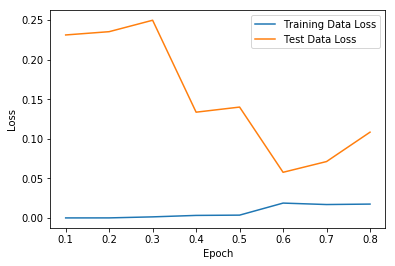

In [250]:
plt.plot(ratio,testLoss, label='Training Data Loss')
plt.plot(ratio,trainLoss,label='Test Data Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()